In [1]:
!pip install transformers --upgrade

In [2]:
import pandas as pd

# Initialize variables to store data
blocks = []
genes = []
conditions = []
data = []

# Read the file line by line
with open('qubic/filtered_melanoma_data.tsv.blocks', 'r') as file:
    current_block = None
    current_genes = []
    current_conditions = []
    current_data = []

    for line in file:
        line = line.strip()

        # Skip comment lines
        if line.startswith('#'):
            continue

        # Check for a new block
        if line.startswith('BC'):
            if current_block is not None:
                # Save the previous block's data
                blocks.append(current_block)
                genes.append(current_genes)
                conditions.append(current_conditions)
                data.append(current_data)

            # Start a new block
            current_block = line
            current_genes = []
            current_conditions = []
            current_data = []

        # Extract genes
        elif line.startswith('Genes'):
            current_genes = line.split(':')[1].strip().split()

        # Extract conditions
        elif line.startswith('Conds'):
            current_conditions = line.split(':')[1].strip().split()

        # Extract data (numeric values)
        elif line and not line.startswith('BC'):
            current_data.append(line.split())

    # Save the last block's data
    if current_block is not None:
        blocks.append(current_block)
        genes.append(current_genes)
        conditions.append(current_conditions)
        data.append(current_data)

# Print the extracted data for inspection
print("Blocks:", blocks)
print("Genes:", genes)
print("Conditions:", conditions)
print("Data:", data)

Blocks: ['BC000\tS=936\tEnrichment:2.69\tRow=36\tCol=26\tCore_Row=36\tCore_Col=26', 'BC001\tS=702\tEnrichment:2.71\tRow=26\tCol=27\tCore_Row=26\tCore_Col=27', 'BC002\tS=816\tEnrichment:2.72\tRow=24\tCol=34\tCore_Row=23\tCore_Col=34', 'BC003\tS=672\tEnrichment:2.77\tRow=21\tCol=32\tCore_Row=21\tCore_Col=32', 'BC004\tS=660\tEnrichment:2.68\tRow=33\tCol=20\tCore_Row=33\tCore_Col=20', 'BC005\tS=648\tEnrichment:2.67\tRow=36\tCol=18\tCore_Row=36\tCore_Col=18', 'BC006\tS=936\tEnrichment:2.05\tRow=18\tCol=52\tCore_Row=18\tCore_Col=52', 'BC007\tS=608\tEnrichment:2.67\tRow=38\tCol=16\tCore_Row=38\tCore_Col=16', 'BC008\tS=464\tEnrichment:2.70\tRow=29\tCol=16\tCore_Row=28\tCore_Col=16', 'BC009\tS=615\tEnrichment:2.11\tRow=41\tCol=15\tCore_Row=41\tCore_Col=15', 'BC010\tS=345\tEnrichment:2.17\tRow=15\tCol=23\tCore_Row=14\tCore_Col=23', 'BC011\tS=540\tEnrichment:2.10\tRow=36\tCol=15\tCore_Row=36\tCore_Col=15', 'BC012\tS=345\tEnrichment:2.70\tRow=23\tCol=15\tCore_Row=22\tCore_Col=15', 'BC013\tS=448\tE

Truncating or padding the data to match the number of conditions.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


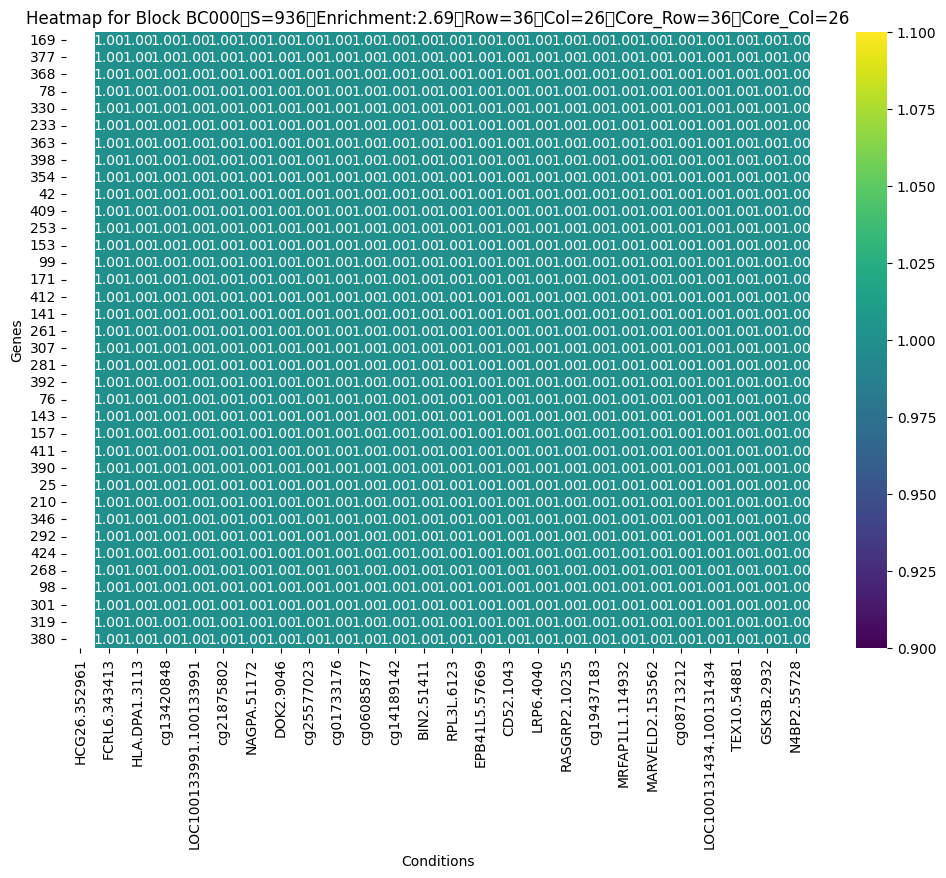

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Create a heatmap for the first block
block_index = 0  # Change this to visualize a different block

# Convert the data to a DataFrame
block_data = pd.DataFrame(data[block_index])

# Check the number of columns in the data
num_columns = len(block_data.columns)

# Check the number of conditions
num_conditions = len(conditions[block_index])

# If there's a mismatch, fix it
if num_columns != num_conditions:
    print(f"Warning: Mismatch in columns. Data has {num_columns} columns, but conditions has {num_conditions}.")
    print("Truncating or padding the data to match the number of conditions.")

    # Truncate or pad the data to match the number of conditions
    if num_columns > num_conditions:
        block_data = block_data.iloc[:, :num_conditions]  # Truncate extra columns
    else:
        # Pad missing columns with NaN
        for _ in range(num_conditions - num_columns):
            block_data[num_columns + _] = None

# Set the column names to the conditions
block_data.columns = conditions[block_index]

# Set the row names to the genes
block_data.index = genes[block_index]

# Convert the DataFrame to numeric (if necessary)
block_data = block_data.apply(pd.to_numeric, errors='coerce')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(block_data, cmap='viridis', annot=True, fmt=".2f")
plt.title(f'Heatmap for Block {blocks[block_index]}')
plt.xlabel('Conditions')
plt.ylabel('Genes')
plt.show()

In [4]:
# Print dimensions of each block
for i, block in enumerate(blocks):
    num_genes = len(genes[i])
    num_conditions = len(conditions[i])
    print(f"Block {block}: {num_genes} genes x {num_conditions} conditions")

Block BC000	S=936	Enrichment:2.69	Row=36	Col=26	Core_Row=36	Core_Col=26: 36 genes x 26 conditions
Block BC001	S=702	Enrichment:2.71	Row=26	Col=27	Core_Row=26	Core_Col=27: 26 genes x 27 conditions
Block BC002	S=816	Enrichment:2.72	Row=24	Col=34	Core_Row=23	Core_Col=34: 24 genes x 34 conditions
Block BC003	S=672	Enrichment:2.77	Row=21	Col=32	Core_Row=21	Core_Col=32: 21 genes x 32 conditions
Block BC004	S=660	Enrichment:2.68	Row=33	Col=20	Core_Row=33	Core_Col=20: 33 genes x 20 conditions
Block BC005	S=648	Enrichment:2.67	Row=36	Col=18	Core_Row=36	Core_Col=18: 36 genes x 18 conditions
Block BC006	S=936	Enrichment:2.05	Row=18	Col=52	Core_Row=18	Core_Col=52: 18 genes x 52 conditions
Block BC007	S=608	Enrichment:2.67	Row=38	Col=16	Core_Row=38	Core_Col=16: 38 genes x 16 conditions
Block BC008	S=464	Enrichment:2.70	Row=29	Col=16	Core_Row=28	Core_Col=16: 29 genes x 16 conditions
Block BC009	S=615	Enrichment:2.11	Row=41	Col=15	Core_Row=41	Core_Col=15: 41 genes x 15 conditions
Block BC010	S=345	En

In [5]:
multi_omic_df = pd.read_csv('filtered_melanoma_data.tsv', sep="\t", on_bad_lines="skip")
# Extract the first row and assign it as column names
#multi_omic_df.columns = multi_omic_df.iloc[0]
#multi_omic_df = multi_omic_df[1:]
# Reset index
multi_omic_df.reset_index(drop=True, inplace=True)
print(multi_omic_df.head())

# Clean column names in the multi-omic DataFrame
multi_omic_df.columns = [col.strip() for col in multi_omic_df.columns]

# Clean gene and condition names in the blocks
genes = [[gene.strip() for gene in sublist] for sublist in genes]
conditions = [[cond.strip() for cond in sublist] for sublist in conditions]

# Initialize a list to store the DataFrames for each block
block_dataframes = []

# Iterate through each block
for i in range(len(blocks)):
    # Extract genes and conditions for the current block
    current_genes = [int(gene) for gene in genes[i] if int(gene) in multi_omic_df.index]
    current_conditions = [cond for cond in conditions[i] if cond in multi_omic_df.columns]
    print(current_genes)

    # Include the 'Death' column in the conditions
    if 'Death' in multi_omic_df.columns and 'Death' not in current_conditions:
        current_conditions.append('Death')

    # Skip the block if no valid genes or conditions are found
    if not current_genes or not current_conditions:
        print(f"Skipping block {i} due to missing genes or conditions.")
        continue

    filtered_column = multi_omic_df[current_conditions]
    filtered_df = filtered_column.loc[current_genes]

    # Append the filtered DataFrame to the list
    block_dataframes.append(filtered_df)

   Unnamed: 0  SGK196.84197  ANKRD17.26057  HAPLN3.145864  ELK4.2005  \
0           0      0.582227      -0.412998      -0.129177  -0.512170   
1           1      0.667168      -0.412998      -0.129177   0.448254   
2           2     -0.230658      -0.412998      -0.129177   0.355258   
3           3     -0.323879      -0.412998      -0.129177   0.490101   
4           4      0.920702      -0.412998      -0.129177  -0.201193   

   HLA.L.3139  PSME2.5721  PTPN14.5784  HLA.DQB1.3119  TNFRSF18.8784  ...  \
0    0.672690    0.458261     1.039369      -0.195482       0.614772  ...   
1    0.401882   -2.263335     0.792993      -0.645524       0.224009  ...   
2   -1.689892   -1.148801     0.021340      -0.288819       0.029178  ...   
3    0.758547   -1.273691    -1.407285       1.293817       0.747605  ...   
4   -1.689892   -0.535881     0.820425       0.106827       0.029716  ...   

   KIAA0040.9674  FCER1A.2205  REEP4.80346  TCERG1L.256536  cg10868817  \
0      -1.339351    -1.421838 

In [6]:
# Print the first few rows of each DataFrame
for i, df in enumerate(block_dataframes):
    print(f"Block {i}:")
    print(df.head())
    print("\n")
    df.to_csv(f"qubic/blocks/Block {i}.csv")

Block 0:
     HCG26.352961  FCRL6.343413  HLA.DPA1.3113  cg13420848  \
169      0.129402      0.063081       0.209775   -0.370640   
377     -0.372379      0.814116      -0.365187   -0.273650   
368      0.737026      1.042408       0.783862   -0.089282   
78       0.871511      0.977074       1.957783   -1.594524   
330      0.557517      1.036382       0.722556    1.159733   

     LOC100133991.100133991  cg21875802  NAGPA.51172  DOK2.9046  cg25577023  \
169                0.998560    1.360643     2.021796  -0.194696   -0.650762   
377                1.532250    1.171804     1.674363  -1.174358    0.375567   
368                0.868061    1.072587     1.938086   0.518517   -0.765307   
78                 0.922370    1.257030     1.932911  -0.818433   -0.539635   
330                0.921941    1.286443     1.782082  -0.126264    0.208848   

     cg01733176  ...  RASGRP2.10235  cg19437183  MRFAP1L1.114932  \
169    1.348871  ...       2.134356    0.061804         1.207567   
377    

In [7]:
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

def train_and_evaluate_models(model_name, embeddings, y):
    classification_models = [
        (
            "SVM",
            SVC(random_state=42, probability=True),
            {
                "C": [1e-3, 1e-2, 1e-1, 1, 10],
                "kernel": ["linear", "rbf"],
                "gamma": ["scale", "auto"],
            },
        ),
        (
            "RF",
            RandomForestClassifier(random_state=42, n_jobs=-1),
            {
                "n_estimators": [50, 100, 200],
                "max_depth": [None, 10, 20, 30],
                "min_samples_split": [2, 5, 10],
                "min_samples_leaf": [1, 2, 4],
            },
        ),
        (
            "XGB",
            XGBClassifier(random_state=42, n_jobs=-1),
            {
                "n_estimators": [50, 100, 200],
                "max_depth": [3, 6, 9],
                "learning_rate": [0.01, 0.1, 0.2],
                "subsample": [0.8, 1.0],
                "colsample_bytree": [0.8, 1.0],
            },
        ),
        (
            "LGBM",
            LGBMClassifier(random_state=42, n_jobs=-1),
            {
                "n_estimators": [50, 100, 200],
                "max_depth": [3, 6, 9],
                "learning_rate": [0.01, 0.1, 0.2],
                "subsample": [0.8, 1.0],
                "colsample_bytree": [0.8, 1.0],
            },
        ),
        (
            "KNN",
            KNeighborsClassifier(n_jobs=-1),
            {
                "n_neighbors": [3, 5, 7],
                "weights": ["uniform", "distance"],
                "algorithm": ["ball_tree", "kd_tree", "brute"],
            },
        ),
        (
            "ADA",
            AdaBoostClassifier(random_state=42),
            {
                "n_estimators": [50, 100, 200],
                "learning_rate": [0.01, 0.1, 1.0],
                "algorithm": ["SAMME", "SAMME.R"],
            },
        ),
    ]

    X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.2, random_state=1121, stratify=y)
    results = []

    for name, model, param_grid in classification_models:
        print(f"Training {name} with GridSearchCV...")
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
        start_time = time.time()
        grid_search.fit(X_train, y_train)
        training_time = time.time() - start_time

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        cm = confusion_matrix(y_test, y_pred)

        print(f"Results for {name}:")
        print(f"Training Time: {training_time:.2f} seconds")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"ROC-AUC Score: {roc_auc:.4f}")

        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Alive", "Dead"], yticklabels=["Alive", "Dead"])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix for {name}")
        plt.show()

        results.append({
            "accuracy": accuracy,
            "roc_auc": roc_auc,
            "training_time": training_time,
            "f1": f1,
            "classification": name,
        })

    return results

In [8]:
import pandas as pd
import os
import numpy as np
import torch
from tqdm import tqdm
from transformers import BertTokenizer, BertModel, GPT2Tokenizer, GPT2Model
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Step 1: Load and Combine All Blocks
def load_and_combine_blocks(block_range, base_path=""):
    blocks = []
    for i in block_range:
        file_path = os.path.join(base_path, f"Block {i}.csv")
        if os.path.exists(file_path):
            print(f"Loading {file_path}...")
            block = pd.read_csv(file_path)
            blocks.append(block)
        else:
            print(f"File not found: {file_path}")

    if not blocks:
        raise ValueError("No files found to concatenate. Check the directory and file names.")

    combined_data = pd.concat(blocks, ignore_index=True)
    return combined_data

# Load blocks 0 to 48
block_range = range(123)
try:
    combined_data = load_and_combine_blocks(block_range, "./qubic/blocks/")
except ValueError as e:
    print(e)
    exit()

# Step 2: Preprocess the Data
print("Missing values in 'Death' column:", combined_data["Death"].isnull().sum())

# Remove rows with missing target values
combined_data = combined_data.dropna(subset=["Death"])

# Separate features and target
X = combined_data.drop(columns=["Death"])
y = combined_data["Death"]

# Step 3: Convert Gene Data to Text
def convert_to_text(row, genes):
    return ", ".join([f"{gene}: {row[gene]}" for gene in genes])

genes = X.columns
patient_texts = X.apply(lambda row: convert_to_text(row, genes), axis=1)

# Gérer les cas où les textes sont manquants
patient_texts = patient_texts.fillna("")
patient_texts = patient_texts.astype(str)  # Conversion en string

# Step 4: Generate Embeddings Using Different Models
def generate_embeddings(texts, model_name="biobert"):
    if model_name == "biobert":
        tokenizer = BertTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
        model = BertModel.from_pretrained("dmis-lab/biobert-v1.1")
    elif model_name == "scbert":
        tokenizer = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
        model = BertModel.from_pretrained("allenai/scibert_scivocab_uncased")
    elif model_name == "biogpt":
        tokenizer = GPT2Tokenizer.from_pretrained("microsoft/biogpt")
        model = GPT2Model.from_pretrained("microsoft/biogpt")
        if tokenizer.pad_token is None:
            tokenizer.pad_token = tokenizer.eos_token
    else:
        raise ValueError("Unsupported model name. Choose from 'biobert', 'scbert', or 'biogpt'.")

    embeddings = []

    for idx, text in enumerate(tqdm(texts, desc=f"Generating embeddings with {model_name}", unit="sample")):
        if not isinstance(text, str) or text.strip() == "":
            print(f"⚠️ Skipping invalid text at index {idx}")
            embeddings.append(np.zeros(768))  # Placeholder vector
            continue

        try:
            inputs = tokenizer(
                str(text),  # Forcer la conversion en string
                return_tensors="pt",
                truncation=True,
                padding=True,  # Assure un padding uniforme
                max_length=512,
            )

            with torch.no_grad():
                outputs = model(**inputs)

            embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
            embeddings.append(embedding)

        except Exception as e:
            print(f"❌ Erreur lors de la tokenisation à l'index {idx}: {e}")
            embeddings.append(np.zeros(768))  # Placeholder pour éviter de casser le pipeline

    return np.array(embeddings)

Loading ./qubic/blocks/Block 0.csv...
Loading ./qubic/blocks/Block 1.csv...
Loading ./qubic/blocks/Block 2.csv...
Loading ./qubic/blocks/Block 3.csv...
Loading ./qubic/blocks/Block 4.csv...
Loading ./qubic/blocks/Block 5.csv...
Loading ./qubic/blocks/Block 6.csv...
Loading ./qubic/blocks/Block 7.csv...
Loading ./qubic/blocks/Block 8.csv...
Loading ./qubic/blocks/Block 9.csv...
Loading ./qubic/blocks/Block 10.csv...
Loading ./qubic/blocks/Block 11.csv...
Loading ./qubic/blocks/Block 12.csv...
Loading ./qubic/blocks/Block 13.csv...
Loading ./qubic/blocks/Block 14.csv...
Loading ./qubic/blocks/Block 15.csv...
Loading ./qubic/blocks/Block 16.csv...
Loading ./qubic/blocks/Block 17.csv...
Loading ./qubic/blocks/Block 18.csv...
Loading ./qubic/blocks/Block 19.csv...
Loading ./qubic/blocks/Block 20.csv...
Loading ./qubic/blocks/Block 21.csv...
Loading ./qubic/blocks/Block 22.csv...
Loading ./qubic/blocks/Block 23.csv...
Loading ./qubic/blocks/Block 24.csv...
Loading ./qubic/blocks/Block 25.csv


 MODEL biogpt

Generating embeddings using biogpt...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/927k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/696k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/595 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BioGptTokenizer'. 
The class this function is called from is 'GPT2Tokenizer'.
You are using a model of type biogpt to instantiate a model of type gpt2. This is not supported for all configurations of models and can yield errors.


pytorch_model.bin:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

Some weights of GPT2Model were not initialized from the model checkpoint at microsoft/biogpt and are newly initialized: ['h.0.attn.c_attn.bias', 'h.0.attn.c_attn.weight', 'h.0.attn.c_proj.bias', 'h.0.attn.c_proj.weight', 'h.0.ln_1.bias', 'h.0.ln_1.weight', 'h.0.ln_2.bias', 'h.0.ln_2.weight', 'h.0.mlp.c_fc.bias', 'h.0.mlp.c_fc.weight', 'h.0.mlp.c_proj.bias', 'h.0.mlp.c_proj.weight', 'h.1.attn.c_attn.bias', 'h.1.attn.c_attn.weight', 'h.1.attn.c_proj.bias', 'h.1.attn.c_proj.weight', 'h.1.ln_1.bias', 'h.1.ln_1.weight', 'h.1.ln_2.bias', 'h.1.ln_2.weight', 'h.1.mlp.c_fc.bias', 'h.1.mlp.c_fc.weight', 'h.1.mlp.c_proj.bias', 'h.1.mlp.c_proj.weight', 'h.10.attn.c_attn.bias', 'h.10.attn.c_attn.weight', 'h.10.attn.c_proj.bias', 'h.10.attn.c_proj.weight', 'h.10.ln_1.bias', 'h.10.ln_1.weight', 'h.10.ln_2.bias', 'h.10.ln_2.weight', 'h.10.mlp.c_fc.bias', 'h.10.mlp.c_fc.weight', 'h.10.mlp.c_proj.bias', 'h.10.mlp.c_proj.weight', 'h.11.attn.c_attn.bias', 'h.11.attn.c_attn.weight', 'h.11.attn.c_proj.bias'

❌ Erreur lors de la tokenisation à l'index 0: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   0%|          | 4/4089 [00:00<10:56,  6.22sample/s]

❌ Erreur lors de la tokenisation à l'index 2: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   0%|          | 6/4089 [00:00<09:37,  7.07sample/s]

❌ Erreur lors de la tokenisation à l'index 4: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 5: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   0%|          | 8/4089 [00:01<09:23,  7.24sample/s]

❌ Erreur lors de la tokenisation à l'index 6: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 7: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   0%|          | 10/4089 [00:01<10:03,  6.76sample/s]

❌ Erreur lors de la tokenisation à l'index 8: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 9: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   0%|          | 12/4089 [00:01<09:27,  7.19sample/s]

❌ Erreur lors de la tokenisation à l'index 10: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 11: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   0%|          | 14/4089 [00:02<11:18,  6.01sample/s]

❌ Erreur lors de la tokenisation à l'index 12: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 13: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   0%|          | 16/4089 [00:02<11:17,  6.01sample/s]

❌ Erreur lors de la tokenisation à l'index 14: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 15: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   0%|          | 18/4089 [00:02<10:09,  6.68sample/s]

❌ Erreur lors de la tokenisation à l'index 16: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 17: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   0%|          | 20/4089 [00:03<10:07,  6.69sample/s]

❌ Erreur lors de la tokenisation à l'index 18: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 19: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 22/4089 [00:03<10:26,  6.50sample/s]

❌ Erreur lors de la tokenisation à l'index 20: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 21: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 24/4089 [00:03<10:26,  6.49sample/s]

❌ Erreur lors de la tokenisation à l'index 22: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 23: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 26/4089 [00:03<09:58,  6.79sample/s]

❌ Erreur lors de la tokenisation à l'index 24: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 25: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 28/4089 [00:04<09:45,  6.94sample/s]

❌ Erreur lors de la tokenisation à l'index 26: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 27: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 30/4089 [00:04<11:17,  6.00sample/s]

❌ Erreur lors de la tokenisation à l'index 28: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 29: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 31/4089 [00:04<10:57,  6.17sample/s]

❌ Erreur lors de la tokenisation à l'index 30: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 32/4089 [00:05<13:35,  4.97sample/s]

❌ Erreur lors de la tokenisation à l'index 31: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 33/4089 [00:05<17:52,  3.78sample/s]

❌ Erreur lors de la tokenisation à l'index 32: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 34/4089 [00:05<21:00,  3.22sample/s]

❌ Erreur lors de la tokenisation à l'index 33: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 35/4089 [00:06<21:20,  3.17sample/s]

❌ Erreur lors de la tokenisation à l'index 34: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 36/4089 [00:06<22:30,  3.00sample/s]

❌ Erreur lors de la tokenisation à l'index 35: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 37/4089 [00:07<24:12,  2.79sample/s]

❌ Erreur lors de la tokenisation à l'index 36: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 38/4089 [00:07<26:22,  2.56sample/s]

❌ Erreur lors de la tokenisation à l'index 37: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 39/4089 [00:07<26:40,  2.53sample/s]

❌ Erreur lors de la tokenisation à l'index 38: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 41/4089 [00:08<20:45,  3.25sample/s]

❌ Erreur lors de la tokenisation à l'index 39: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 40: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 43/4089 [00:08<15:19,  4.40sample/s]

❌ Erreur lors de la tokenisation à l'index 41: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 42: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 45/4089 [00:08<12:45,  5.29sample/s]

❌ Erreur lors de la tokenisation à l'index 43: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 44: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 47/4089 [00:09<11:20,  5.94sample/s]

❌ Erreur lors de la tokenisation à l'index 45: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 46: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 49/4089 [00:09<10:23,  6.48sample/s]

❌ Erreur lors de la tokenisation à l'index 47: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 48: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|          | 50/4089 [00:09<10:24,  6.46sample/s]

❌ Erreur lors de la tokenisation à l'index 49: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|▏         | 52/4089 [00:10<11:24,  5.90sample/s]

❌ Erreur lors de la tokenisation à l'index 50: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 51: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|▏         | 54/4089 [00:10<11:34,  5.81sample/s]

❌ Erreur lors de la tokenisation à l'index 52: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 53: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|▏         | 56/4089 [00:10<10:44,  6.26sample/s]

❌ Erreur lors de la tokenisation à l'index 54: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 55: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|▏         | 58/4089 [00:10<09:14,  7.27sample/s]

❌ Erreur lors de la tokenisation à l'index 56: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 57: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   1%|▏         | 60/4089 [00:11<08:16,  8.12sample/s]

❌ Erreur lors de la tokenisation à l'index 58: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 59: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 62/4089 [00:11<08:06,  8.27sample/s]

❌ Erreur lors de la tokenisation à l'index 60: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 61: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 64/4089 [00:11<07:49,  8.57sample/s]

❌ Erreur lors de la tokenisation à l'index 62: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 63: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 66/4089 [00:11<07:41,  8.72sample/s]

❌ Erreur lors de la tokenisation à l'index 64: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 65: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 68/4089 [00:12<07:32,  8.89sample/s]

❌ Erreur lors de la tokenisation à l'index 66: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 67: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 70/4089 [00:12<07:28,  8.96sample/s]

❌ Erreur lors de la tokenisation à l'index 68: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 69: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 72/4089 [00:12<07:35,  8.81sample/s]

❌ Erreur lors de la tokenisation à l'index 70: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 71: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 74/4089 [00:12<07:41,  8.70sample/s]

❌ Erreur lors de la tokenisation à l'index 72: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 73: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 76/4089 [00:13<07:28,  8.96sample/s]

❌ Erreur lors de la tokenisation à l'index 74: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 75: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 78/4089 [00:13<07:22,  9.07sample/s]

❌ Erreur lors de la tokenisation à l'index 76: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 77: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 80/4089 [00:13<07:35,  8.81sample/s]

❌ Erreur lors de la tokenisation à l'index 78: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 79: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 82/4089 [00:13<07:28,  8.93sample/s]

❌ Erreur lors de la tokenisation à l'index 80: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 81: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 84/4089 [00:13<07:35,  8.79sample/s]

❌ Erreur lors de la tokenisation à l'index 82: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 83: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 86/4089 [00:14<07:23,  9.03sample/s]

❌ Erreur lors de la tokenisation à l'index 84: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 85: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 88/4089 [00:14<07:21,  9.06sample/s]

❌ Erreur lors de la tokenisation à l'index 86: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 87: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 90/4089 [00:14<07:27,  8.94sample/s]

❌ Erreur lors de la tokenisation à l'index 88: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 89: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 92/4089 [00:14<07:34,  8.79sample/s]

❌ Erreur lors de la tokenisation à l'index 90: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 91: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 94/4089 [00:15<07:25,  8.97sample/s]

❌ Erreur lors de la tokenisation à l'index 92: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 93: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 96/4089 [00:15<07:23,  9.01sample/s]

❌ Erreur lors de la tokenisation à l'index 94: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 95: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 98/4089 [00:15<07:53,  8.43sample/s]

❌ Erreur lors de la tokenisation à l'index 96: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 97: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 100/4089 [00:15<07:36,  8.74sample/s]

❌ Erreur lors de la tokenisation à l'index 98: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 99: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   2%|▏         | 102/4089 [00:15<07:35,  8.76sample/s]

❌ Erreur lors de la tokenisation à l'index 100: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 101: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 104/4089 [00:16<07:25,  8.95sample/s]

❌ Erreur lors de la tokenisation à l'index 102: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 103: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 106/4089 [00:16<07:36,  8.73sample/s]

❌ Erreur lors de la tokenisation à l'index 104: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 105: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 108/4089 [00:16<07:29,  8.86sample/s]

❌ Erreur lors de la tokenisation à l'index 106: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 107: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 110/4089 [00:16<07:32,  8.80sample/s]

❌ Erreur lors de la tokenisation à l'index 108: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 109: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 112/4089 [00:17<07:22,  8.98sample/s]

❌ Erreur lors de la tokenisation à l'index 110: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 111: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 114/4089 [00:17<07:29,  8.85sample/s]

❌ Erreur lors de la tokenisation à l'index 112: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 113: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 116/4089 [00:17<07:30,  8.81sample/s]

❌ Erreur lors de la tokenisation à l'index 114: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 115: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 118/4089 [00:17<07:27,  8.88sample/s]

❌ Erreur lors de la tokenisation à l'index 116: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 117: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 120/4089 [00:17<07:29,  8.83sample/s]

❌ Erreur lors de la tokenisation à l'index 118: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 119: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 122/4089 [00:18<07:41,  8.59sample/s]

❌ Erreur lors de la tokenisation à l'index 120: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 121: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 124/4089 [00:18<10:33,  6.26sample/s]

❌ Erreur lors de la tokenisation à l'index 122: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 123: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 125/4089 [00:18<11:34,  5.71sample/s]

❌ Erreur lors de la tokenisation à l'index 124: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 125: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 127/4089 [00:19<12:19,  5.36sample/s]

❌ Erreur lors de la tokenisation à l'index 126: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 127: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 129/4089 [00:19<12:42,  5.19sample/s]


❌ Erreur lors de la tokenisation à l'index 128: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 129: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:   3%|▎         | 132/4089 [00:20<12:56,  5.10sample/s]

❌ Erreur lors de la tokenisation à l'index 130: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 131: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 134/4089 [00:20<12:35,  5.24sample/s]

❌ Erreur lors de la tokenisation à l'index 132: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 133: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 136/4089 [00:20<09:53,  6.66sample/s]

❌ Erreur lors de la tokenisation à l'index 134: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 135: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 138/4089 [00:21<08:46,  7.51sample/s]

❌ Erreur lors de la tokenisation à l'index 136: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 137: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 140/4089 [00:21<08:00,  8.22sample/s]

❌ Erreur lors de la tokenisation à l'index 138: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 139: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   3%|▎         | 142/4089 [00:21<07:47,  8.43sample/s]

❌ Erreur lors de la tokenisation à l'index 140: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 141: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▎         | 144/4089 [00:21<07:30,  8.75sample/s]

❌ Erreur lors de la tokenisation à l'index 142: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 143: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▎         | 146/4089 [00:21<07:23,  8.89sample/s]

❌ Erreur lors de la tokenisation à l'index 144: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 145: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▎         | 148/4089 [00:22<07:23,  8.88sample/s]

❌ Erreur lors de la tokenisation à l'index 146: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 147: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▎         | 150/4089 [00:22<07:47,  8.42sample/s]

❌ Erreur lors de la tokenisation à l'index 148: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 149: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▎         | 152/4089 [00:22<07:29,  8.76sample/s]

❌ Erreur lors de la tokenisation à l'index 150: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 151: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▍         | 154/4089 [00:22<07:28,  8.77sample/s]

❌ Erreur lors de la tokenisation à l'index 152: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 153: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▍         | 156/4089 [00:23<07:31,  8.72sample/s]

❌ Erreur lors de la tokenisation à l'index 154: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 155: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▍         | 158/4089 [00:23<07:20,  8.92sample/s]

❌ Erreur lors de la tokenisation à l'index 156: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 157: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▍         | 160/4089 [00:23<07:25,  8.82sample/s]

❌ Erreur lors de la tokenisation à l'index 158: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 159: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▍         | 162/4089 [00:23<07:22,  8.87sample/s]

❌ Erreur lors de la tokenisation à l'index 160: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 161: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▍         | 164/4089 [00:24<07:18,  8.95sample/s]

❌ Erreur lors de la tokenisation à l'index 162: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 163: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▍         | 166/4089 [00:24<07:27,  8.76sample/s]

❌ Erreur lors de la tokenisation à l'index 164: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 165: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▍         | 168/4089 [00:24<07:39,  8.54sample/s]

❌ Erreur lors de la tokenisation à l'index 166: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 167: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▍         | 170/4089 [00:24<07:27,  8.76sample/s]

❌ Erreur lors de la tokenisation à l'index 168: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 169: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▍         | 172/4089 [00:24<07:22,  8.84sample/s]

❌ Erreur lors de la tokenisation à l'index 170: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 171: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▍         | 174/4089 [00:25<08:11,  7.97sample/s]

❌ Erreur lors de la tokenisation à l'index 172: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 173: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▍         | 176/4089 [00:25<08:06,  8.04sample/s]

❌ Erreur lors de la tokenisation à l'index 174: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 175: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▍         | 178/4089 [00:25<07:45,  8.41sample/s]

❌ Erreur lors de la tokenisation à l'index 176: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 177: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▍         | 180/4089 [00:25<07:32,  8.63sample/s]

❌ Erreur lors de la tokenisation à l'index 178: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 179: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▍         | 182/4089 [00:26<07:37,  8.54sample/s]

❌ Erreur lors de la tokenisation à l'index 180: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 181: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   4%|▍         | 184/4089 [00:26<07:35,  8.57sample/s]

❌ Erreur lors de la tokenisation à l'index 182: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 183: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▍         | 186/4089 [00:26<07:30,  8.65sample/s]

❌ Erreur lors de la tokenisation à l'index 184: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 185: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▍         | 188/4089 [00:26<07:25,  8.76sample/s]

❌ Erreur lors de la tokenisation à l'index 186: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 187: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▍         | 190/4089 [00:27<07:19,  8.88sample/s]

❌ Erreur lors de la tokenisation à l'index 188: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 189: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▍         | 192/4089 [00:27<07:29,  8.68sample/s]

❌ Erreur lors de la tokenisation à l'index 190: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 191: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▍         | 194/4089 [00:27<07:32,  8.61sample/s]

❌ Erreur lors de la tokenisation à l'index 192: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 193: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▍         | 196/4089 [00:27<07:25,  8.73sample/s]

❌ Erreur lors de la tokenisation à l'index 194: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 195: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▍         | 198/4089 [00:27<07:15,  8.93sample/s]

❌ Erreur lors de la tokenisation à l'index 196: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 197: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▍         | 200/4089 [00:28<07:23,  8.77sample/s]

❌ Erreur lors de la tokenisation à l'index 198: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 199: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▍         | 202/4089 [00:28<07:28,  8.67sample/s]

❌ Erreur lors de la tokenisation à l'index 200: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 201: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▍         | 204/4089 [00:28<07:31,  8.61sample/s]

❌ Erreur lors de la tokenisation à l'index 202: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 203: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▌         | 206/4089 [00:28<07:30,  8.62sample/s]

❌ Erreur lors de la tokenisation à l'index 204: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 205: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▌         | 208/4089 [00:29<07:19,  8.84sample/s]

❌ Erreur lors de la tokenisation à l'index 206: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 207: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▌         | 210/4089 [00:29<07:21,  8.78sample/s]

❌ Erreur lors de la tokenisation à l'index 208: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 209: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▌         | 212/4089 [00:29<07:28,  8.65sample/s]

❌ Erreur lors de la tokenisation à l'index 210: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 211: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▌         | 214/4089 [00:29<07:20,  8.81sample/s]

❌ Erreur lors de la tokenisation à l'index 212: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 213: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▌         | 216/4089 [00:30<07:16,  8.88sample/s]

❌ Erreur lors de la tokenisation à l'index 214: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 215: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▌         | 218/4089 [00:30<07:25,  8.69sample/s]

❌ Erreur lors de la tokenisation à l'index 216: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 217: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▌         | 220/4089 [00:30<07:27,  8.64sample/s]

❌ Erreur lors de la tokenisation à l'index 218: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 219: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▌         | 221/4089 [00:30<08:32,  7.55sample/s]

❌ Erreur lors de la tokenisation à l'index 220: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 221: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   5%|▌         | 223/4089 [00:31<10:53,  5.91sample/s]

❌ Erreur lors de la tokenisation à l'index 222: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 223: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▌         | 226/4089 [00:31<12:09,  5.29sample/s]

❌ Erreur lors de la tokenisation à l'index 224: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 225: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▌         | 228/4089 [00:32<12:19,  5.22sample/s]

❌ Erreur lors de la tokenisation à l'index 226: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 227: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▌         | 230/4089 [00:32<12:29,  5.15sample/s]

❌ Erreur lors de la tokenisation à l'index 228: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 229: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▌         | 231/4089 [00:32<12:39,  5.08sample/s]

❌ Erreur lors de la tokenisation à l'index 230: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▌         | 233/4089 [00:33<11:19,  5.68sample/s]

❌ Erreur lors de la tokenisation à l'index 231: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 232: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▌         | 235/4089 [00:33<09:13,  6.97sample/s]

❌ Erreur lors de la tokenisation à l'index 233: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 234: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▌         | 237/4089 [00:33<08:31,  7.53sample/s]

❌ Erreur lors de la tokenisation à l'index 235: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 236: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▌         | 239/4089 [00:33<07:46,  8.25sample/s]

❌ Erreur lors de la tokenisation à l'index 237: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 238: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▌         | 241/4089 [00:33<07:30,  8.53sample/s]

❌ Erreur lors de la tokenisation à l'index 239: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 240: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▌         | 243/4089 [00:34<07:21,  8.71sample/s]

❌ Erreur lors de la tokenisation à l'index 241: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 242: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▌         | 245/4089 [00:34<07:37,  8.40sample/s]

❌ Erreur lors de la tokenisation à l'index 243: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 244: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▌         | 247/4089 [00:34<07:26,  8.61sample/s]

❌ Erreur lors de la tokenisation à l'index 245: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 246: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▌         | 249/4089 [00:34<07:25,  8.61sample/s]

❌ Erreur lors de la tokenisation à l'index 247: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 248: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▌         | 251/4089 [00:35<07:19,  8.72sample/s]

❌ Erreur lors de la tokenisation à l'index 249: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 250: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▌         | 253/4089 [00:35<07:16,  8.79sample/s]

❌ Erreur lors de la tokenisation à l'index 251: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 252: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▌         | 255/4089 [00:35<07:28,  8.55sample/s]

❌ Erreur lors de la tokenisation à l'index 253: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 254: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▋         | 257/4089 [00:35<07:21,  8.68sample/s]

❌ Erreur lors de la tokenisation à l'index 255: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 256: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▋         | 259/4089 [00:36<07:20,  8.70sample/s]

❌ Erreur lors de la tokenisation à l'index 257: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 258: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▋         | 261/4089 [00:36<07:14,  8.81sample/s]

❌ Erreur lors de la tokenisation à l'index 259: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 260: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▋         | 263/4089 [00:36<07:35,  8.40sample/s]

❌ Erreur lors de la tokenisation à l'index 261: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 262: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   6%|▋         | 265/4089 [00:36<07:21,  8.65sample/s]

❌ Erreur lors de la tokenisation à l'index 263: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 264: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 267/4089 [00:36<07:15,  8.77sample/s]

❌ Erreur lors de la tokenisation à l'index 265: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 266: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 269/4089 [00:37<07:11,  8.85sample/s]

❌ Erreur lors de la tokenisation à l'index 267: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 268: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 271/4089 [00:37<07:19,  8.69sample/s]

❌ Erreur lors de la tokenisation à l'index 269: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 270: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 273/4089 [00:37<07:22,  8.63sample/s]

❌ Erreur lors de la tokenisation à l'index 271: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 272: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 275/4089 [00:37<07:18,  8.70sample/s]

❌ Erreur lors de la tokenisation à l'index 273: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 274: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 277/4089 [00:38<07:12,  8.82sample/s]

❌ Erreur lors de la tokenisation à l'index 275: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 276: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 279/4089 [00:38<07:08,  8.89sample/s]

❌ Erreur lors de la tokenisation à l'index 277: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 278: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 281/4089 [00:38<07:31,  8.44sample/s]

❌ Erreur lors de la tokenisation à l'index 279: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 280: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 283/4089 [00:38<07:28,  8.48sample/s]

❌ Erreur lors de la tokenisation à l'index 281: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 282: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 285/4089 [00:39<07:21,  8.61sample/s]

❌ Erreur lors de la tokenisation à l'index 283: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 284: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 287/4089 [00:39<07:14,  8.76sample/s]

❌ Erreur lors de la tokenisation à l'index 285: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 286: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 289/4089 [00:39<07:45,  8.17sample/s]

❌ Erreur lors de la tokenisation à l'index 287: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 288: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 291/4089 [00:39<07:26,  8.50sample/s]

❌ Erreur lors de la tokenisation à l'index 289: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 290: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 293/4089 [00:39<07:17,  8.67sample/s]

❌ Erreur lors de la tokenisation à l'index 291: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 292: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 295/4089 [00:40<07:14,  8.73sample/s]

❌ Erreur lors de la tokenisation à l'index 293: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 294: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 297/4089 [00:40<07:26,  8.48sample/s]

❌ Erreur lors de la tokenisation à l'index 295: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 296: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 299/4089 [00:40<07:22,  8.57sample/s]

❌ Erreur lors de la tokenisation à l'index 297: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 298: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 301/4089 [00:40<07:19,  8.61sample/s]

❌ Erreur lors de la tokenisation à l'index 299: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 300: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 303/4089 [00:41<07:17,  8.66sample/s]

❌ Erreur lors de la tokenisation à l'index 301: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 302: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   7%|▋         | 305/4089 [00:41<07:11,  8.77sample/s]

❌ Erreur lors de la tokenisation à l'index 303: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 304: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 307/4089 [00:41<07:37,  8.26sample/s]

❌ Erreur lors de la tokenisation à l'index 305: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 306: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 309/4089 [00:41<07:23,  8.52sample/s]

❌ Erreur lors de la tokenisation à l'index 307: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 308: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 311/4089 [00:42<07:14,  8.70sample/s]

❌ Erreur lors de la tokenisation à l'index 309: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 310: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 313/4089 [00:42<07:09,  8.78sample/s]

❌ Erreur lors de la tokenisation à l'index 311: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 312: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 315/4089 [00:42<07:20,  8.56sample/s]

❌ Erreur lors de la tokenisation à l'index 313: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 314: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 317/4089 [00:42<07:25,  8.47sample/s]

❌ Erreur lors de la tokenisation à l'index 315: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 316: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 319/4089 [00:43<08:36,  7.30sample/s]

❌ Erreur lors de la tokenisation à l'index 317: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 318: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 320/4089 [00:43<09:56,  6.31sample/s]

❌ Erreur lors de la tokenisation à l'index 319: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 320: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 323/4089 [00:43<11:39,  5.39sample/s]

❌ Erreur lors de la tokenisation à l'index 321: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 322: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 325/4089 [00:44<11:46,  5.33sample/s]

❌ Erreur lors de la tokenisation à l'index 323: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 324: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 326/4089 [00:44<12:08,  5.16sample/s]

❌ Erreur lors de la tokenisation à l'index 325: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 327/4089 [00:44<12:42,  4.93sample/s]

❌ Erreur lors de la tokenisation à l'index 326: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 327: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 330/4089 [00:45<12:27,  5.03sample/s]

❌ Erreur lors de la tokenisation à l'index 328: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 329: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 332/4089 [00:45<09:48,  6.39sample/s]

❌ Erreur lors de la tokenisation à l'index 330: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 331: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 334/4089 [00:45<09:02,  6.92sample/s]

❌ Erreur lors de la tokenisation à l'index 332: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 333: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 336/4089 [00:46<08:10,  7.66sample/s]

❌ Erreur lors de la tokenisation à l'index 334: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 335: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 338/4089 [00:46<07:40,  8.15sample/s]

❌ Erreur lors de la tokenisation à l'index 336: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 337: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 340/4089 [00:46<07:38,  8.18sample/s]

❌ Erreur lors de la tokenisation à l'index 338: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 339: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 342/4089 [00:46<07:34,  8.25sample/s]

❌ Erreur lors de la tokenisation à l'index 340: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 341: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 344/4089 [00:46<07:26,  8.40sample/s]

❌ Erreur lors de la tokenisation à l'index 342: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 343: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   8%|▊         | 346/4089 [00:47<07:14,  8.62sample/s]

❌ Erreur lors de la tokenisation à l'index 344: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 345: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▊         | 348/4089 [00:47<07:26,  8.38sample/s]

❌ Erreur lors de la tokenisation à l'index 346: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 347: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▊         | 350/4089 [00:47<07:19,  8.51sample/s]

❌ Erreur lors de la tokenisation à l'index 348: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 349: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▊         | 352/4089 [00:47<07:29,  8.31sample/s]

❌ Erreur lors de la tokenisation à l'index 350: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 351: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▊         | 354/4089 [00:48<07:17,  8.54sample/s]

❌ Erreur lors de la tokenisation à l'index 352: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 353: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▊         | 356/4089 [00:48<07:13,  8.60sample/s]

❌ Erreur lors de la tokenisation à l'index 354: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 355: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▉         | 358/4089 [00:48<07:14,  8.59sample/s]

❌ Erreur lors de la tokenisation à l'index 356: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 357: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▉         | 360/4089 [00:48<07:23,  8.41sample/s]

❌ Erreur lors de la tokenisation à l'index 358: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 359: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▉         | 362/4089 [00:49<07:23,  8.39sample/s]

❌ Erreur lors de la tokenisation à l'index 360: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 361: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▉         | 364/4089 [00:49<07:15,  8.55sample/s]

❌ Erreur lors de la tokenisation à l'index 362: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 363: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▉         | 366/4089 [00:49<07:25,  8.36sample/s]

❌ Erreur lors de la tokenisation à l'index 364: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 365: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▉         | 368/4089 [00:49<07:32,  8.22sample/s]

❌ Erreur lors de la tokenisation à l'index 366: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 367: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▉         | 370/4089 [00:50<07:20,  8.43sample/s]

❌ Erreur lors de la tokenisation à l'index 368: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 369: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▉         | 372/4089 [00:50<07:18,  8.48sample/s]

❌ Erreur lors de la tokenisation à l'index 370: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 371: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▉         | 374/4089 [00:50<07:23,  8.39sample/s]

❌ Erreur lors de la tokenisation à l'index 372: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 373: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▉         | 376/4089 [00:50<07:17,  8.49sample/s]

❌ Erreur lors de la tokenisation à l'index 374: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 375: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▉         | 378/4089 [00:50<07:20,  8.42sample/s]

❌ Erreur lors de la tokenisation à l'index 376: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 377: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▉         | 380/4089 [00:51<07:24,  8.34sample/s]

❌ Erreur lors de la tokenisation à l'index 378: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 379: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▉         | 382/4089 [00:51<07:32,  8.20sample/s]

❌ Erreur lors de la tokenisation à l'index 380: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 381: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▉         | 384/4089 [00:51<07:21,  8.40sample/s]

❌ Erreur lors de la tokenisation à l'index 382: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 383: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▉         | 386/4089 [00:51<07:29,  8.25sample/s]

❌ Erreur lors de la tokenisation à l'index 384: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 385: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:   9%|▉         | 388/4089 [00:52<07:17,  8.46sample/s]

❌ Erreur lors de la tokenisation à l'index 386: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 387: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|▉         | 390/4089 [00:52<07:21,  8.38sample/s]

❌ Erreur lors de la tokenisation à l'index 388: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 389: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|▉         | 392/4089 [00:52<07:09,  8.61sample/s]

❌ Erreur lors de la tokenisation à l'index 390: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 391: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|▉         | 394/4089 [00:52<07:20,  8.39sample/s]

❌ Erreur lors de la tokenisation à l'index 392: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 393: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|▉         | 396/4089 [00:53<07:13,  8.53sample/s]

❌ Erreur lors de la tokenisation à l'index 394: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 395: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|▉         | 398/4089 [00:53<07:15,  8.47sample/s]

❌ Erreur lors de la tokenisation à l'index 396: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 397: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|▉         | 400/4089 [00:53<07:17,  8.43sample/s]

❌ Erreur lors de la tokenisation à l'index 398: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 399: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|▉         | 402/4089 [00:53<07:08,  8.60sample/s]

❌ Erreur lors de la tokenisation à l'index 400: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 401: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|▉         | 404/4089 [00:54<07:15,  8.46sample/s]

❌ Erreur lors de la tokenisation à l'index 402: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 403: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|▉         | 406/4089 [00:54<07:08,  8.60sample/s]

❌ Erreur lors de la tokenisation à l'index 404: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 405: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|▉         | 408/4089 [00:54<07:20,  8.35sample/s]

❌ Erreur lors de la tokenisation à l'index 406: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 407: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|█         | 410/4089 [00:54<07:13,  8.49sample/s]

❌ Erreur lors de la tokenisation à l'index 408: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 409: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|█         | 412/4089 [00:55<07:20,  8.35sample/s]

❌ Erreur lors de la tokenisation à l'index 410: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 411: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|█         | 414/4089 [00:55<07:48,  7.84sample/s]

❌ Erreur lors de la tokenisation à l'index 412: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 413: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|█         | 416/4089 [00:55<10:06,  6.06sample/s]

❌ Erreur lors de la tokenisation à l'index 414: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 415: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|█         | 417/4089 [00:55<10:41,  5.72sample/s]

❌ Erreur lors de la tokenisation à l'index 416: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|█         | 419/4089 [00:56<11:38,  5.26sample/s]

❌ Erreur lors de la tokenisation à l'index 417: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 418: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|█         | 421/4089 [00:56<11:43,  5.21sample/s]

❌ Erreur lors de la tokenisation à l'index 419: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 420: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|█         | 422/4089 [00:56<11:56,  5.11sample/s]

❌ Erreur lors de la tokenisation à l'index 421: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|█         | 424/4089 [00:57<12:18,  4.96sample/s]

❌ Erreur lors de la tokenisation à l'index 422: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 423: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|█         | 425/4089 [00:57<12:22,  4.94sample/s]

❌ Erreur lors de la tokenisation à l'index 424: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|█         | 427/4089 [00:57<11:30,  5.30sample/s]

❌ Erreur lors de la tokenisation à l'index 425: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 426: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  10%|█         | 429/4089 [00:58<09:28,  6.44sample/s]

❌ Erreur lors de la tokenisation à l'index 427: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 428: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█         | 431/4089 [00:58<08:22,  7.28sample/s]

❌ Erreur lors de la tokenisation à l'index 429: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 430: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█         | 433/4089 [00:58<07:39,  7.95sample/s]

❌ Erreur lors de la tokenisation à l'index 431: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 432: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█         | 435/4089 [00:58<07:25,  8.20sample/s]

❌ Erreur lors de la tokenisation à l'index 433: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 434: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█         | 437/4089 [00:59<07:43,  7.87sample/s]

❌ Erreur lors de la tokenisation à l'index 435: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 436: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█         | 439/4089 [00:59<07:24,  8.21sample/s]

❌ Erreur lors de la tokenisation à l'index 437: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 438: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█         | 441/4089 [00:59<07:22,  8.25sample/s]

❌ Erreur lors de la tokenisation à l'index 439: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 440: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█         | 443/4089 [00:59<07:12,  8.44sample/s]

❌ Erreur lors de la tokenisation à l'index 441: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 442: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█         | 445/4089 [01:00<07:06,  8.55sample/s]

❌ Erreur lors de la tokenisation à l'index 443: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 444: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█         | 447/4089 [01:00<07:22,  8.23sample/s]

❌ Erreur lors de la tokenisation à l'index 445: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 446: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█         | 449/4089 [01:00<07:22,  8.22sample/s]

❌ Erreur lors de la tokenisation à l'index 447: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 448: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█         | 451/4089 [01:00<07:13,  8.40sample/s]

❌ Erreur lors de la tokenisation à l'index 449: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 450: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█         | 453/4089 [01:01<07:05,  8.54sample/s]

❌ Erreur lors de la tokenisation à l'index 451: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 452: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█         | 455/4089 [01:01<07:08,  8.47sample/s]

❌ Erreur lors de la tokenisation à l'index 453: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 454: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█         | 457/4089 [01:01<07:24,  8.17sample/s]

❌ Erreur lors de la tokenisation à l'index 455: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 456: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█         | 459/4089 [01:01<07:13,  8.37sample/s]

❌ Erreur lors de la tokenisation à l'index 457: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 458: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█▏        | 461/4089 [01:01<07:04,  8.54sample/s]

❌ Erreur lors de la tokenisation à l'index 459: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 460: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█▏        | 463/4089 [01:02<07:07,  8.47sample/s]

❌ Erreur lors de la tokenisation à l'index 461: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 462: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█▏        | 465/4089 [01:02<07:28,  8.08sample/s]

❌ Erreur lors de la tokenisation à l'index 463: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 464: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█▏        | 467/4089 [01:02<07:10,  8.41sample/s]

❌ Erreur lors de la tokenisation à l'index 465: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 466: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  11%|█▏        | 469/4089 [01:02<07:08,  8.46sample/s]

❌ Erreur lors de la tokenisation à l'index 467: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 468: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 471/4089 [01:03<07:02,  8.56sample/s]

❌ Erreur lors de la tokenisation à l'index 469: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 470: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 473/4089 [01:03<07:23,  8.15sample/s]

❌ Erreur lors de la tokenisation à l'index 471: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 472: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 475/4089 [01:03<07:08,  8.44sample/s]

❌ Erreur lors de la tokenisation à l'index 473: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 474: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 477/4089 [01:03<07:14,  8.31sample/s]

❌ Erreur lors de la tokenisation à l'index 475: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 476: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 479/4089 [01:04<07:15,  8.28sample/s]

❌ Erreur lors de la tokenisation à l'index 477: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 478: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 481/4089 [01:04<07:38,  7.88sample/s]

❌ Erreur lors de la tokenisation à l'index 479: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 480: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 483/4089 [01:04<07:26,  8.08sample/s]

❌ Erreur lors de la tokenisation à l'index 481: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 482: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 485/4089 [01:04<07:24,  8.11sample/s]

❌ Erreur lors de la tokenisation à l'index 483: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 484: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 487/4089 [01:05<07:20,  8.18sample/s]

❌ Erreur lors de la tokenisation à l'index 485: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 486: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 489/4089 [01:05<07:21,  8.16sample/s]

❌ Erreur lors de la tokenisation à l'index 487: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 488: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 491/4089 [01:05<07:22,  8.13sample/s]

❌ Erreur lors de la tokenisation à l'index 489: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 490: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 493/4089 [01:05<07:10,  8.35sample/s]

❌ Erreur lors de la tokenisation à l'index 491: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 492: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 495/4089 [01:06<07:03,  8.49sample/s]

❌ Erreur lors de la tokenisation à l'index 493: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 494: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 497/4089 [01:06<06:57,  8.60sample/s]

❌ Erreur lors de la tokenisation à l'index 495: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 496: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 499/4089 [01:06<07:12,  8.29sample/s]

❌ Erreur lors de la tokenisation à l'index 497: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 498: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 501/4089 [01:06<07:04,  8.45sample/s]

❌ Erreur lors de la tokenisation à l'index 499: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 500: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 503/4089 [01:07<07:02,  8.48sample/s]

❌ Erreur lors de la tokenisation à l'index 501: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 502: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 505/4089 [01:07<07:20,  8.13sample/s]

❌ Erreur lors de la tokenisation à l'index 503: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 504: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 507/4089 [01:07<07:29,  7.97sample/s]

❌ Erreur lors de la tokenisation à l'index 505: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 506: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 509/4089 [01:07<07:18,  8.17sample/s]

❌ Erreur lors de la tokenisation à l'index 507: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 508: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  12%|█▏        | 510/4089 [01:08<08:44,  6.83sample/s]


❌ Erreur lors de la tokenisation à l'index 509: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 510: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  13%|█▎        | 512/4089 [01:08<10:38,  5.60sample/s]

❌ Erreur lors de la tokenisation à l'index 511: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 513/4089 [01:08<11:20,  5.26sample/s]

❌ Erreur lors de la tokenisation à l'index 512: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 514/4089 [01:08<11:53,  5.01sample/s]


❌ Erreur lors de la tokenisation à l'index 513: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 514: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  13%|█▎        | 516/4089 [01:09<12:01,  4.95sample/s]

❌ Erreur lors de la tokenisation à l'index 515: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 517/4089 [01:09<12:07,  4.91sample/s]

❌ Erreur lors de la tokenisation à l'index 516: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 519/4089 [01:09<12:08,  4.90sample/s]

❌ Erreur lors de la tokenisation à l'index 517: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 518: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 521/4089 [01:10<11:48,  5.04sample/s]

❌ Erreur lors de la tokenisation à l'index 519: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 520: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 523/4089 [01:10<09:26,  6.30sample/s]

❌ Erreur lors de la tokenisation à l'index 521: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 522: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 525/4089 [01:10<08:27,  7.03sample/s]

❌ Erreur lors de la tokenisation à l'index 523: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 524: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 527/4089 [01:11<07:42,  7.70sample/s]

❌ Erreur lors de la tokenisation à l'index 525: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 526: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 529/4089 [01:11<07:21,  8.06sample/s]

❌ Erreur lors de la tokenisation à l'index 527: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 528: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 531/4089 [01:11<07:25,  7.99sample/s]

❌ Erreur lors de la tokenisation à l'index 529: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 530: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 533/4089 [01:11<07:21,  8.05sample/s]

❌ Erreur lors de la tokenisation à l'index 531: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 532: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 535/4089 [01:11<07:08,  8.30sample/s]

❌ Erreur lors de la tokenisation à l'index 533: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 534: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 537/4089 [01:12<07:06,  8.33sample/s]

❌ Erreur lors de la tokenisation à l'index 535: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 536: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 539/4089 [01:12<07:11,  8.23sample/s]

❌ Erreur lors de la tokenisation à l'index 537: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 538: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 541/4089 [01:12<07:18,  8.10sample/s]

❌ Erreur lors de la tokenisation à l'index 539: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 540: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 543/4089 [01:12<07:11,  8.22sample/s]

❌ Erreur lors de la tokenisation à l'index 541: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 542: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 545/4089 [01:13<07:07,  8.30sample/s]

❌ Erreur lors de la tokenisation à l'index 543: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 544: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 547/4089 [01:13<07:13,  8.17sample/s]

❌ Erreur lors de la tokenisation à l'index 545: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 546: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 549/4089 [01:13<07:01,  8.39sample/s]

❌ Erreur lors de la tokenisation à l'index 547: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 548: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  13%|█▎        | 551/4089 [01:13<07:09,  8.24sample/s]

❌ Erreur lors de la tokenisation à l'index 549: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 550: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▎        | 553/4089 [01:14<07:05,  8.32sample/s]

❌ Erreur lors de la tokenisation à l'index 551: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 552: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▎        | 555/4089 [01:14<07:21,  8.00sample/s]

❌ Erreur lors de la tokenisation à l'index 553: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 554: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▎        | 557/4089 [01:14<07:10,  8.21sample/s]

❌ Erreur lors de la tokenisation à l'index 555: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 556: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▎        | 559/4089 [01:14<07:12,  8.16sample/s]

❌ Erreur lors de la tokenisation à l'index 557: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 558: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▎        | 561/4089 [01:15<07:10,  8.20sample/s]

❌ Erreur lors de la tokenisation à l'index 559: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 560: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▍        | 563/4089 [01:15<07:18,  8.04sample/s]

❌ Erreur lors de la tokenisation à l'index 561: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 562: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▍        | 565/4089 [01:15<07:05,  8.28sample/s]

❌ Erreur lors de la tokenisation à l'index 563: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 564: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▍        | 567/4089 [01:15<07:11,  8.16sample/s]

❌ Erreur lors de la tokenisation à l'index 565: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 566: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▍        | 569/4089 [01:16<07:07,  8.23sample/s]

❌ Erreur lors de la tokenisation à l'index 567: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 568: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▍        | 571/4089 [01:16<07:10,  8.17sample/s]

❌ Erreur lors de la tokenisation à l'index 569: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 570: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▍        | 573/4089 [01:16<07:06,  8.24sample/s]

❌ Erreur lors de la tokenisation à l'index 571: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 572: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▍        | 575/4089 [01:16<07:16,  8.06sample/s]

❌ Erreur lors de la tokenisation à l'index 573: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 574: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▍        | 577/4089 [01:17<07:07,  8.22sample/s]

❌ Erreur lors de la tokenisation à l'index 575: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 576: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▍        | 579/4089 [01:17<07:01,  8.33sample/s]

❌ Erreur lors de la tokenisation à l'index 577: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 578: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▍        | 581/4089 [01:17<07:11,  8.13sample/s]

❌ Erreur lors de la tokenisation à l'index 579: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 580: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▍        | 583/4089 [01:17<07:15,  8.05sample/s]

❌ Erreur lors de la tokenisation à l'index 581: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 582: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▍        | 585/4089 [01:18<07:02,  8.30sample/s]

❌ Erreur lors de la tokenisation à l'index 583: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 584: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▍        | 587/4089 [01:18<06:55,  8.42sample/s]

❌ Erreur lors de la tokenisation à l'index 585: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 586: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▍        | 589/4089 [01:18<06:59,  8.33sample/s]

❌ Erreur lors de la tokenisation à l'index 587: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 588: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  14%|█▍        | 591/4089 [01:18<07:01,  8.29sample/s]

❌ Erreur lors de la tokenisation à l'index 589: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 590: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▍        | 593/4089 [01:19<07:07,  8.17sample/s]

❌ Erreur lors de la tokenisation à l'index 591: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 592: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▍        | 595/4089 [01:19<07:04,  8.23sample/s]

❌ Erreur lors de la tokenisation à l'index 593: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 594: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▍        | 597/4089 [01:19<07:21,  7.90sample/s]

❌ Erreur lors de la tokenisation à l'index 595: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 596: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▍        | 599/4089 [01:19<07:08,  8.15sample/s]

❌ Erreur lors de la tokenisation à l'index 597: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 598: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▍        | 601/4089 [01:20<07:15,  8.01sample/s]

❌ Erreur lors de la tokenisation à l'index 599: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 600: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▍        | 603/4089 [01:20<07:46,  7.47sample/s]

❌ Erreur lors de la tokenisation à l'index 601: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 602: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▍        | 604/4089 [01:20<09:16,  6.26sample/s]

❌ Erreur lors de la tokenisation à l'index 603: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 604: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▍        | 607/4089 [01:21<10:58,  5.29sample/s]

❌ Erreur lors de la tokenisation à l'index 605: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 606: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▍        | 608/4089 [01:21<11:11,  5.18sample/s]

❌ Erreur lors de la tokenisation à l'index 607: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▍        | 609/4089 [01:21<11:33,  5.02sample/s]

❌ Erreur lors de la tokenisation à l'index 608: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▍        | 610/4089 [01:21<11:47,  4.92sample/s]

❌ Erreur lors de la tokenisation à l'index 609: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▍        | 611/4089 [01:22<12:01,  4.82sample/s]

❌ Erreur lors de la tokenisation à l'index 610: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▍        | 612/4089 [01:22<12:08,  4.77sample/s]

❌ Erreur lors de la tokenisation à l'index 611: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▍        | 613/4089 [01:22<12:44,  4.54sample/s]

❌ Erreur lors de la tokenisation à l'index 612: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▌        | 615/4089 [01:22<11:39,  4.96sample/s]

❌ Erreur lors de la tokenisation à l'index 613: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 614: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▌        | 617/4089 [01:23<09:24,  6.15sample/s]

❌ Erreur lors de la tokenisation à l'index 615: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 616: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▌        | 619/4089 [01:23<08:15,  7.00sample/s]

❌ Erreur lors de la tokenisation à l'index 617: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 618: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▌        | 621/4089 [01:23<07:35,  7.61sample/s]

❌ Erreur lors de la tokenisation à l'index 619: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 620: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▌        | 623/4089 [01:23<07:10,  8.06sample/s]

❌ Erreur lors de la tokenisation à l'index 621: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 622: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▌        | 625/4089 [01:24<07:16,  7.94sample/s]

❌ Erreur lors de la tokenisation à l'index 623: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 624: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▌        | 627/4089 [01:24<07:05,  8.14sample/s]

❌ Erreur lors de la tokenisation à l'index 625: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 626: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▌        | 629/4089 [01:24<07:03,  8.17sample/s]

❌ Erreur lors de la tokenisation à l'index 627: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 628: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▌        | 631/4089 [01:24<06:58,  8.27sample/s]

❌ Erreur lors de la tokenisation à l'index 629: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 630: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  15%|█▌        | 633/4089 [01:25<07:07,  8.09sample/s]

❌ Erreur lors de la tokenisation à l'index 631: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 632: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▌        | 635/4089 [01:25<06:59,  8.24sample/s]

❌ Erreur lors de la tokenisation à l'index 633: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 634: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▌        | 637/4089 [01:25<07:46,  7.40sample/s]

❌ Erreur lors de la tokenisation à l'index 635: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 636: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▌        | 639/4089 [01:25<07:18,  7.88sample/s]

❌ Erreur lors de la tokenisation à l'index 637: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 638: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▌        | 641/4089 [01:26<07:11,  7.98sample/s]

❌ Erreur lors de la tokenisation à l'index 639: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 640: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▌        | 643/4089 [01:26<07:08,  8.03sample/s]

❌ Erreur lors de la tokenisation à l'index 641: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 642: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▌        | 645/4089 [01:26<07:11,  7.97sample/s]

❌ Erreur lors de la tokenisation à l'index 643: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 644: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▌        | 647/4089 [01:26<07:02,  8.15sample/s]

❌ Erreur lors de la tokenisation à l'index 645: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 646: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▌        | 649/4089 [01:27<07:05,  8.08sample/s]

❌ Erreur lors de la tokenisation à l'index 647: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 648: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▌        | 651/4089 [01:27<07:00,  8.18sample/s]

❌ Erreur lors de la tokenisation à l'index 649: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 650: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▌        | 653/4089 [01:27<07:01,  8.16sample/s]

❌ Erreur lors de la tokenisation à l'index 651: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 652: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▌        | 655/4089 [01:27<06:54,  8.29sample/s]

❌ Erreur lors de la tokenisation à l'index 653: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 654: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▌        | 657/4089 [01:28<06:53,  8.30sample/s]

❌ Erreur lors de la tokenisation à l'index 655: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 656: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▌        | 659/4089 [01:28<07:02,  8.11sample/s]

❌ Erreur lors de la tokenisation à l'index 657: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 658: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▌        | 661/4089 [01:28<07:05,  8.06sample/s]

❌ Erreur lors de la tokenisation à l'index 659: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 660: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▌        | 663/4089 [01:28<06:55,  8.24sample/s]

❌ Erreur lors de la tokenisation à l'index 661: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 662: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▋        | 665/4089 [01:29<06:56,  8.22sample/s]

❌ Erreur lors de la tokenisation à l'index 663: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 664: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▋        | 667/4089 [01:29<07:19,  7.78sample/s]

❌ Erreur lors de la tokenisation à l'index 665: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 666: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▋        | 669/4089 [01:29<07:13,  7.89sample/s]

❌ Erreur lors de la tokenisation à l'index 667: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 668: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▋        | 671/4089 [01:29<07:13,  7.88sample/s]

❌ Erreur lors de la tokenisation à l'index 669: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 670: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  16%|█▋        | 673/4089 [01:30<07:02,  8.08sample/s]

❌ Erreur lors de la tokenisation à l'index 671: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 672: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 675/4089 [01:30<07:07,  7.99sample/s]

❌ Erreur lors de la tokenisation à l'index 673: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 674: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 677/4089 [01:30<07:07,  7.97sample/s]

❌ Erreur lors de la tokenisation à l'index 675: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 676: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 679/4089 [01:30<07:01,  8.09sample/s]

❌ Erreur lors de la tokenisation à l'index 677: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 678: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 681/4089 [01:31<06:57,  8.16sample/s]

❌ Erreur lors de la tokenisation à l'index 679: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 680: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 683/4089 [01:31<07:08,  7.94sample/s]

❌ Erreur lors de la tokenisation à l'index 681: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 682: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 685/4089 [01:31<07:07,  7.96sample/s]

❌ Erreur lors de la tokenisation à l'index 683: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 684: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 687/4089 [01:31<07:02,  8.04sample/s]

❌ Erreur lors de la tokenisation à l'index 685: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 686: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 689/4089 [01:32<06:57,  8.15sample/s]

❌ Erreur lors de la tokenisation à l'index 687: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 688: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 691/4089 [01:32<07:11,  7.87sample/s]

❌ Erreur lors de la tokenisation à l'index 689: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 690: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 693/4089 [01:32<07:05,  7.99sample/s]

❌ Erreur lors de la tokenisation à l'index 691: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 692: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 695/4089 [01:32<07:30,  7.53sample/s]

❌ Erreur lors de la tokenisation à l'index 693: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 694: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 696/4089 [01:33<08:38,  6.54sample/s]

❌ Erreur lors de la tokenisation à l'index 695: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 697/4089 [01:33<09:36,  5.88sample/s]

❌ Erreur lors de la tokenisation à l'index 696: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 698/4089 [01:33<10:54,  5.18sample/s]


❌ Erreur lors de la tokenisation à l'index 697: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 698: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  17%|█▋        | 701/4089 [01:34<11:09,  5.06sample/s]

❌ Erreur lors de la tokenisation à l'index 699: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 700: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 702/4089 [01:34<11:31,  4.90sample/s]

❌ Erreur lors de la tokenisation à l'index 701: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 703/4089 [01:34<11:33,  4.88sample/s]

❌ Erreur lors de la tokenisation à l'index 702: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 704/4089 [01:34<11:44,  4.81sample/s]

❌ Erreur lors de la tokenisation à l'index 703: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 705/4089 [01:35<11:45,  4.79sample/s]

❌ Erreur lors de la tokenisation à l'index 704: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 707/4089 [01:35<11:19,  4.97sample/s]

❌ Erreur lors de la tokenisation à l'index 705: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 706: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 709/4089 [01:35<09:07,  6.18sample/s]

❌ Erreur lors de la tokenisation à l'index 707: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 708: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 711/4089 [01:35<07:54,  7.12sample/s]

❌ Erreur lors de la tokenisation à l'index 709: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 710: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 713/4089 [01:36<07:18,  7.70sample/s]

❌ Erreur lors de la tokenisation à l'index 711: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 712: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  17%|█▋        | 715/4089 [01:36<07:04,  7.95sample/s]

❌ Erreur lors de la tokenisation à l'index 713: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 714: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 717/4089 [01:36<07:06,  7.90sample/s]

❌ Erreur lors de la tokenisation à l'index 715: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 716: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 719/4089 [01:36<07:00,  8.01sample/s]

❌ Erreur lors de la tokenisation à l'index 717: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 718: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 721/4089 [01:37<06:51,  8.18sample/s]

❌ Erreur lors de la tokenisation à l'index 719: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 720: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 723/4089 [01:37<06:53,  8.14sample/s]

❌ Erreur lors de la tokenisation à l'index 721: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 722: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 725/4089 [01:37<07:01,  7.98sample/s]

❌ Erreur lors de la tokenisation à l'index 723: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 724: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 727/4089 [01:37<06:55,  8.10sample/s]

❌ Erreur lors de la tokenisation à l'index 725: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 726: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 729/4089 [01:38<06:48,  8.23sample/s]

❌ Erreur lors de la tokenisation à l'index 727: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 728: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 731/4089 [01:38<06:49,  8.20sample/s]

❌ Erreur lors de la tokenisation à l'index 729: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 730: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 733/4089 [01:38<07:03,  7.92sample/s]

❌ Erreur lors de la tokenisation à l'index 731: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 732: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 735/4089 [01:38<06:59,  8.00sample/s]

❌ Erreur lors de la tokenisation à l'index 733: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 734: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 737/4089 [01:39<06:46,  8.24sample/s]

❌ Erreur lors de la tokenisation à l'index 735: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 736: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 739/4089 [01:39<06:46,  8.25sample/s]

❌ Erreur lors de la tokenisation à l'index 737: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 738: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 741/4089 [01:39<07:00,  7.97sample/s]

❌ Erreur lors de la tokenisation à l'index 739: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 740: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 743/4089 [01:39<06:50,  8.15sample/s]

❌ Erreur lors de la tokenisation à l'index 741: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 742: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 745/4089 [01:40<06:59,  7.98sample/s]

❌ Erreur lors de la tokenisation à l'index 743: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 744: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 747/4089 [01:40<06:51,  8.13sample/s]

❌ Erreur lors de la tokenisation à l'index 745: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 746: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 749/4089 [01:40<07:05,  7.86sample/s]

❌ Erreur lors de la tokenisation à l'index 747: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 748: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 751/4089 [01:40<07:15,  7.66sample/s]

❌ Erreur lors de la tokenisation à l'index 749: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 750: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 753/4089 [01:41<07:29,  7.42sample/s]

❌ Erreur lors de la tokenisation à l'index 751: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 752: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  18%|█▊        | 755/4089 [01:41<07:23,  7.52sample/s]

❌ Erreur lors de la tokenisation à l'index 753: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 754: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▊        | 757/4089 [01:41<07:13,  7.68sample/s]

❌ Erreur lors de la tokenisation à l'index 755: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 756: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▊        | 759/4089 [01:41<07:00,  7.92sample/s]

❌ Erreur lors de la tokenisation à l'index 757: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 758: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▊        | 761/4089 [01:42<06:55,  8.02sample/s]

❌ Erreur lors de la tokenisation à l'index 759: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 760: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▊        | 763/4089 [01:42<07:05,  7.82sample/s]

❌ Erreur lors de la tokenisation à l'index 761: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 762: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▊        | 765/4089 [01:42<07:04,  7.84sample/s]

❌ Erreur lors de la tokenisation à l'index 763: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 764: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 767/4089 [01:42<06:54,  8.01sample/s]

❌ Erreur lors de la tokenisation à l'index 765: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 766: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 769/4089 [01:43<07:05,  7.81sample/s]

❌ Erreur lors de la tokenisation à l'index 767: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 768: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 771/4089 [01:43<07:04,  7.81sample/s]

❌ Erreur lors de la tokenisation à l'index 769: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 770: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 773/4089 [01:43<07:07,  7.76sample/s]

❌ Erreur lors de la tokenisation à l'index 771: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 772: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 775/4089 [01:43<06:52,  8.04sample/s]

❌ Erreur lors de la tokenisation à l'index 773: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 774: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 777/4089 [01:44<06:47,  8.13sample/s]

❌ Erreur lors de la tokenisation à l'index 775: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 776: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 779/4089 [01:44<06:55,  7.97sample/s]

❌ Erreur lors de la tokenisation à l'index 777: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 778: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 781/4089 [01:44<06:57,  7.93sample/s]

❌ Erreur lors de la tokenisation à l'index 779: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 780: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 783/4089 [01:44<06:53,  7.99sample/s]

❌ Erreur lors de la tokenisation à l'index 781: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 782: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 785/4089 [01:45<06:59,  7.88sample/s]

❌ Erreur lors de la tokenisation à l'index 783: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 784: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 786/4089 [01:45<07:02,  7.81sample/s]

❌ Erreur lors de la tokenisation à l'index 785: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 787/4089 [01:45<08:28,  6.50sample/s]

❌ Erreur lors de la tokenisation à l'index 786: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 788/4089 [01:45<09:31,  5.77sample/s]

❌ Erreur lors de la tokenisation à l'index 787: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 789/4089 [01:45<10:08,  5.42sample/s]

❌ Erreur lors de la tokenisation à l'index 788: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 790/4089 [01:46<10:56,  5.02sample/s]

❌ Erreur lors de la tokenisation à l'index 789: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 791/4089 [01:46<11:10,  4.92sample/s]

❌ Erreur lors de la tokenisation à l'index 790: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 791: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 794/4089 [01:47<10:58,  5.00sample/s]

❌ Erreur lors de la tokenisation à l'index 792: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 793: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 795/4089 [01:47<11:11,  4.91sample/s]

❌ Erreur lors de la tokenisation à l'index 794: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 795: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  19%|█▉        | 797/4089 [01:47<11:22,  4.82sample/s]

❌ Erreur lors de la tokenisation à l'index 796: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|█▉        | 799/4089 [01:48<10:41,  5.13sample/s]

❌ Erreur lors de la tokenisation à l'index 797: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 798: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|█▉        | 801/4089 [01:48<08:37,  6.35sample/s]

❌ Erreur lors de la tokenisation à l'index 799: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 800: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|█▉        | 803/4089 [01:48<07:42,  7.10sample/s]

❌ Erreur lors de la tokenisation à l'index 801: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 802: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|█▉        | 805/4089 [01:48<07:07,  7.69sample/s]

❌ Erreur lors de la tokenisation à l'index 803: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 804: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|█▉        | 807/4089 [01:49<07:00,  7.80sample/s]

❌ Erreur lors de la tokenisation à l'index 805: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 806: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|█▉        | 809/4089 [01:49<06:51,  7.98sample/s]

❌ Erreur lors de la tokenisation à l'index 807: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 808: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|█▉        | 811/4089 [01:49<06:57,  7.86sample/s]

❌ Erreur lors de la tokenisation à l'index 809: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 810: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|█▉        | 813/4089 [01:49<06:48,  8.02sample/s]

❌ Erreur lors de la tokenisation à l'index 811: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 812: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|█▉        | 815/4089 [01:50<06:51,  7.96sample/s]

❌ Erreur lors de la tokenisation à l'index 813: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 814: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|█▉        | 817/4089 [01:50<06:55,  7.87sample/s]

❌ Erreur lors de la tokenisation à l'index 815: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 816: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|██        | 819/4089 [01:50<07:01,  7.76sample/s]

❌ Erreur lors de la tokenisation à l'index 817: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 818: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|██        | 821/4089 [01:50<06:46,  8.03sample/s]

❌ Erreur lors de la tokenisation à l'index 819: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 820: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|██        | 823/4089 [01:51<06:50,  7.95sample/s]

❌ Erreur lors de la tokenisation à l'index 821: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 822: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|██        | 825/4089 [01:51<06:44,  8.06sample/s]

❌ Erreur lors de la tokenisation à l'index 823: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 824: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|██        | 827/4089 [01:51<06:53,  7.89sample/s]

❌ Erreur lors de la tokenisation à l'index 825: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 826: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|██        | 829/4089 [01:51<06:46,  8.02sample/s]

❌ Erreur lors de la tokenisation à l'index 827: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 828: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|██        | 831/4089 [01:52<06:52,  7.90sample/s]

❌ Erreur lors de la tokenisation à l'index 829: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 830: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|██        | 833/4089 [01:52<06:51,  7.92sample/s]

❌ Erreur lors de la tokenisation à l'index 831: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 832: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|██        | 835/4089 [01:52<06:56,  7.82sample/s]

❌ Erreur lors de la tokenisation à l'index 833: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 834: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  20%|██        | 837/4089 [01:52<06:50,  7.92sample/s]

❌ Erreur lors de la tokenisation à l'index 835: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 836: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██        | 839/4089 [01:53<06:54,  7.83sample/s]

❌ Erreur lors de la tokenisation à l'index 837: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 838: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██        | 841/4089 [01:53<06:47,  7.97sample/s]

❌ Erreur lors de la tokenisation à l'index 839: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 840: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██        | 843/4089 [01:53<06:49,  7.92sample/s]

❌ Erreur lors de la tokenisation à l'index 841: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 842: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██        | 845/4089 [01:53<06:43,  8.04sample/s]

❌ Erreur lors de la tokenisation à l'index 843: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 844: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██        | 847/4089 [01:54<06:49,  7.93sample/s]

❌ Erreur lors de la tokenisation à l'index 845: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 846: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██        | 849/4089 [01:54<06:47,  7.95sample/s]

❌ Erreur lors de la tokenisation à l'index 847: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 848: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██        | 851/4089 [01:54<06:47,  7.96sample/s]

❌ Erreur lors de la tokenisation à l'index 849: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 850: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██        | 853/4089 [01:54<06:42,  8.03sample/s]

❌ Erreur lors de la tokenisation à l'index 851: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 852: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██        | 855/4089 [01:55<06:54,  7.80sample/s]

❌ Erreur lors de la tokenisation à l'index 853: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 854: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██        | 857/4089 [01:55<07:02,  7.65sample/s]

❌ Erreur lors de la tokenisation à l'index 855: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 856: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██        | 859/4089 [01:55<07:18,  7.36sample/s]

❌ Erreur lors de la tokenisation à l'index 857: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 858: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██        | 861/4089 [01:55<07:09,  7.51sample/s]

❌ Erreur lors de la tokenisation à l'index 859: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 860: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██        | 863/4089 [01:56<07:01,  7.66sample/s]

❌ Erreur lors de la tokenisation à l'index 861: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 862: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██        | 865/4089 [01:56<07:03,  7.61sample/s]

❌ Erreur lors de la tokenisation à l'index 863: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 864: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██        | 867/4089 [01:56<06:47,  7.91sample/s]

❌ Erreur lors de la tokenisation à l'index 865: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 866: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██▏       | 869/4089 [01:56<06:40,  8.04sample/s]

❌ Erreur lors de la tokenisation à l'index 867: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 868: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██▏       | 871/4089 [01:57<06:50,  7.85sample/s]

❌ Erreur lors de la tokenisation à l'index 869: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 870: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██▏       | 873/4089 [01:57<06:58,  7.68sample/s]

❌ Erreur lors de la tokenisation à l'index 871: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 872: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██▏       | 875/4089 [01:57<06:49,  7.85sample/s]

❌ Erreur lors de la tokenisation à l'index 873: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 874: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██▏       | 877/4089 [01:57<06:40,  8.02sample/s]

❌ Erreur lors de la tokenisation à l'index 875: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 876: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██▏       | 878/4089 [01:58<08:09,  6.56sample/s]

❌ Erreur lors de la tokenisation à l'index 877: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  21%|██▏       | 879/4089 [01:58<09:06,  5.87sample/s]

❌ Erreur lors de la tokenisation à l'index 878: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 880/4089 [01:58<09:46,  5.47sample/s]


❌ Erreur lors de la tokenisation à l'index 879: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 880: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  22%|██▏       | 882/4089 [01:59<10:18,  5.19sample/s]

❌ Erreur lors de la tokenisation à l'index 881: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 883/4089 [01:59<10:31,  5.07sample/s]

❌ Erreur lors de la tokenisation à l'index 882: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 884/4089 [01:59<10:44,  4.97sample/s]

❌ Erreur lors de la tokenisation à l'index 883: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 884: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 886/4089 [01:59<10:39,  5.01sample/s]

❌ Erreur lors de la tokenisation à l'index 885: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 887/4089 [02:00<10:55,  4.88sample/s]

❌ Erreur lors de la tokenisation à l'index 886: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 888/4089 [02:00<11:07,  4.79sample/s]

❌ Erreur lors de la tokenisation à l'index 887: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 889/4089 [02:00<11:24,  4.67sample/s]

❌ Erreur lors de la tokenisation à l'index 888: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 889: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 892/4089 [02:00<09:04,  5.87sample/s]

❌ Erreur lors de la tokenisation à l'index 890: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 891: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 894/4089 [02:01<07:58,  6.67sample/s]

❌ Erreur lors de la tokenisation à l'index 892: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 893: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 896/4089 [02:01<07:28,  7.12sample/s]

❌ Erreur lors de la tokenisation à l'index 894: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 895: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 898/4089 [02:01<06:59,  7.61sample/s]

❌ Erreur lors de la tokenisation à l'index 896: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 897: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 900/4089 [02:01<06:45,  7.85sample/s]

❌ Erreur lors de la tokenisation à l'index 898: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 899: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 902/4089 [02:02<06:43,  7.89sample/s]

❌ Erreur lors de la tokenisation à l'index 900: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 901: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 904/4089 [02:02<07:03,  7.52sample/s]

❌ Erreur lors de la tokenisation à l'index 902: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 903: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 906/4089 [02:02<06:47,  7.81sample/s]

❌ Erreur lors de la tokenisation à l'index 904: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 905: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 908/4089 [02:03<06:42,  7.90sample/s]

❌ Erreur lors de la tokenisation à l'index 906: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 907: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 910/4089 [02:03<06:38,  7.99sample/s]

❌ Erreur lors de la tokenisation à l'index 908: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 909: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 912/4089 [02:03<06:53,  7.68sample/s]

❌ Erreur lors de la tokenisation à l'index 910: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 911: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 914/4089 [02:03<06:41,  7.90sample/s]

❌ Erreur lors de la tokenisation à l'index 912: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 913: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 916/4089 [02:04<06:40,  7.93sample/s]

❌ Erreur lors de la tokenisation à l'index 914: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 915: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 918/4089 [02:04<06:38,  7.95sample/s]

❌ Erreur lors de la tokenisation à l'index 916: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 917: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  22%|██▏       | 920/4089 [02:04<06:53,  7.66sample/s]

❌ Erreur lors de la tokenisation à l'index 918: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 919: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 922/4089 [02:04<06:43,  7.84sample/s]

❌ Erreur lors de la tokenisation à l'index 920: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 921: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 924/4089 [02:05<06:38,  7.93sample/s]

❌ Erreur lors de la tokenisation à l'index 922: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 923: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 926/4089 [02:05<06:41,  7.88sample/s]

❌ Erreur lors de la tokenisation à l'index 924: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 925: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 928/4089 [02:05<06:50,  7.70sample/s]

❌ Erreur lors de la tokenisation à l'index 926: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 927: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 930/4089 [02:05<06:38,  7.93sample/s]

❌ Erreur lors de la tokenisation à l'index 928: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 929: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 932/4089 [02:06<06:37,  7.95sample/s]

❌ Erreur lors de la tokenisation à l'index 930: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 931: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 934/4089 [02:06<06:33,  8.02sample/s]

❌ Erreur lors de la tokenisation à l'index 932: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 933: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 936/4089 [02:06<06:51,  7.66sample/s]

❌ Erreur lors de la tokenisation à l'index 934: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 935: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 938/4089 [02:06<06:38,  7.91sample/s]

❌ Erreur lors de la tokenisation à l'index 936: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 937: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 940/4089 [02:07<06:33,  8.01sample/s]

❌ Erreur lors de la tokenisation à l'index 938: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 939: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 942/4089 [02:07<06:53,  7.60sample/s]

❌ Erreur lors de la tokenisation à l'index 940: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 941: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 944/4089 [02:07<06:52,  7.62sample/s]

❌ Erreur lors de la tokenisation à l'index 942: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 943: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 946/4089 [02:07<06:47,  7.72sample/s]

❌ Erreur lors de la tokenisation à l'index 944: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 945: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 948/4089 [02:08<06:37,  7.90sample/s]

❌ Erreur lors de la tokenisation à l'index 946: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 947: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 950/4089 [02:08<06:42,  7.80sample/s]

❌ Erreur lors de la tokenisation à l'index 948: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 949: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 952/4089 [02:08<06:50,  7.64sample/s]

❌ Erreur lors de la tokenisation à l'index 950: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 951: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 954/4089 [02:08<06:44,  7.74sample/s]

❌ Erreur lors de la tokenisation à l'index 952: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 953: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 956/4089 [02:09<06:39,  7.84sample/s]

❌ Erreur lors de la tokenisation à l'index 954: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 955: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 958/4089 [02:09<06:47,  7.69sample/s]

❌ Erreur lors de la tokenisation à l'index 956: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 957: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  23%|██▎       | 960/4089 [02:09<06:47,  7.68sample/s]

❌ Erreur lors de la tokenisation à l'index 958: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 959: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▎       | 962/4089 [02:09<06:41,  7.79sample/s]

❌ Erreur lors de la tokenisation à l'index 960: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 961: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▎       | 964/4089 [02:10<06:39,  7.82sample/s]

❌ Erreur lors de la tokenisation à l'index 962: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 963: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▎       | 966/4089 [02:10<06:42,  7.75sample/s]

❌ Erreur lors de la tokenisation à l'index 964: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 965: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▎       | 968/4089 [02:10<07:20,  7.09sample/s]

❌ Erreur lors de la tokenisation à l'index 966: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 967: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▎       | 969/4089 [02:11<08:22,  6.21sample/s]

❌ Erreur lors de la tokenisation à l'index 968: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 969: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▎       | 971/4089 [02:11<09:20,  5.56sample/s]


❌ Erreur lors de la tokenisation à l'index 970: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 971: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  24%|██▍       | 973/4089 [02:11<10:04,  5.16sample/s]

❌ Erreur lors de la tokenisation à l'index 972: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 973: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▍       | 975/4089 [02:12<10:26,  4.97sample/s]

❌ Erreur lors de la tokenisation à l'index 974: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▍       | 976/4089 [02:12<10:32,  4.92sample/s]

❌ Erreur lors de la tokenisation à l'index 975: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▍       | 977/4089 [02:12<10:59,  4.72sample/s]

❌ Erreur lors de la tokenisation à l'index 976: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▍       | 978/4089 [02:12<10:58,  4.72sample/s]

❌ Erreur lors de la tokenisation à l'index 977: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▍       | 979/4089 [02:13<11:24,  4.54sample/s]

❌ Erreur lors de la tokenisation à l'index 978: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▍       | 981/4089 [02:13<10:56,  4.74sample/s]

❌ Erreur lors de la tokenisation à l'index 979: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 980: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▍       | 983/4089 [02:13<08:47,  5.89sample/s]

❌ Erreur lors de la tokenisation à l'index 981: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 982: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▍       | 985/4089 [02:14<07:37,  6.78sample/s]

❌ Erreur lors de la tokenisation à l'index 983: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 984: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▍       | 987/4089 [02:14<07:01,  7.37sample/s]

❌ Erreur lors de la tokenisation à l'index 985: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 986: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▍       | 989/4089 [02:14<06:47,  7.61sample/s]

❌ Erreur lors de la tokenisation à l'index 987: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 988: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▍       | 991/4089 [02:14<06:43,  7.67sample/s]

❌ Erreur lors de la tokenisation à l'index 989: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 990: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▍       | 993/4089 [02:15<06:34,  7.84sample/s]

❌ Erreur lors de la tokenisation à l'index 991: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 992: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▍       | 995/4089 [02:15<06:31,  7.91sample/s]

❌ Erreur lors de la tokenisation à l'index 993: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 994: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▍       | 997/4089 [02:15<06:42,  7.68sample/s]

❌ Erreur lors de la tokenisation à l'index 995: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 996: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▍       | 999/4089 [02:15<06:43,  7.65sample/s]

❌ Erreur lors de la tokenisation à l'index 997: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 998: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  24%|██▍       | 1001/4089 [02:16<06:33,  7.85sample/s]

❌ Erreur lors de la tokenisation à l'index 999: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1000: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▍       | 1003/4089 [02:16<06:33,  7.83sample/s]

❌ Erreur lors de la tokenisation à l'index 1001: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1002: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▍       | 1005/4089 [02:16<06:33,  7.84sample/s]

❌ Erreur lors de la tokenisation à l'index 1003: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1004: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▍       | 1007/4089 [02:16<06:39,  7.72sample/s]

❌ Erreur lors de la tokenisation à l'index 1005: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1006: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▍       | 1009/4089 [02:17<06:31,  7.86sample/s]

❌ Erreur lors de la tokenisation à l'index 1007: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1008: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▍       | 1011/4089 [02:17<06:39,  7.71sample/s]

❌ Erreur lors de la tokenisation à l'index 1009: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1010: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▍       | 1013/4089 [02:17<06:33,  7.82sample/s]

❌ Erreur lors de la tokenisation à l'index 1011: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1012: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▍       | 1015/4089 [02:17<06:36,  7.75sample/s]

❌ Erreur lors de la tokenisation à l'index 1013: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1014: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▍       | 1017/4089 [02:18<06:31,  7.85sample/s]

❌ Erreur lors de la tokenisation à l'index 1015: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1016: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▍       | 1019/4089 [02:18<06:37,  7.73sample/s]

❌ Erreur lors de la tokenisation à l'index 1017: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1018: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▍       | 1021/4089 [02:18<06:28,  7.90sample/s]

❌ Erreur lors de la tokenisation à l'index 1019: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1020: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▌       | 1023/4089 [02:18<06:32,  7.82sample/s]

❌ Erreur lors de la tokenisation à l'index 1021: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1022: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▌       | 1025/4089 [02:19<06:27,  7.91sample/s]

❌ Erreur lors de la tokenisation à l'index 1023: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1024: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▌       | 1027/4089 [02:19<06:35,  7.75sample/s]

❌ Erreur lors de la tokenisation à l'index 1025: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1026: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▌       | 1029/4089 [02:19<06:31,  7.81sample/s]

❌ Erreur lors de la tokenisation à l'index 1027: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1028: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▌       | 1031/4089 [02:20<06:52,  7.41sample/s]

❌ Erreur lors de la tokenisation à l'index 1029: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1030: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▌       | 1033/4089 [02:20<06:40,  7.63sample/s]

❌ Erreur lors de la tokenisation à l'index 1031: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1032: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▌       | 1035/4089 [02:20<06:38,  7.66sample/s]

❌ Erreur lors de la tokenisation à l'index 1033: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1034: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▌       | 1037/4089 [02:20<06:44,  7.55sample/s]

❌ Erreur lors de la tokenisation à l'index 1035: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1036: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▌       | 1039/4089 [02:21<06:44,  7.54sample/s]

❌ Erreur lors de la tokenisation à l'index 1037: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1038: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  25%|██▌       | 1041/4089 [02:21<06:34,  7.73sample/s]

❌ Erreur lors de la tokenisation à l'index 1039: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1040: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1043/4089 [02:21<06:37,  7.66sample/s]

❌ Erreur lors de la tokenisation à l'index 1041: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1042: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1045/4089 [02:21<06:37,  7.66sample/s]

❌ Erreur lors de la tokenisation à l'index 1043: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1044: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1047/4089 [02:22<06:44,  7.53sample/s]

❌ Erreur lors de la tokenisation à l'index 1045: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1046: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1049/4089 [02:22<06:49,  7.43sample/s]

❌ Erreur lors de la tokenisation à l'index 1047: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1048: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1051/4089 [02:22<06:39,  7.61sample/s]

❌ Erreur lors de la tokenisation à l'index 1049: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1050: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1053/4089 [02:22<06:32,  7.74sample/s]

❌ Erreur lors de la tokenisation à l'index 1051: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1052: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1055/4089 [02:23<06:34,  7.69sample/s]

❌ Erreur lors de la tokenisation à l'index 1053: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1054: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1057/4089 [02:23<06:40,  7.58sample/s]

❌ Erreur lors de la tokenisation à l'index 1055: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1056: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1058/4089 [02:23<07:26,  6.78sample/s]

❌ Erreur lors de la tokenisation à l'index 1057: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1059/4089 [02:23<08:27,  5.97sample/s]

❌ Erreur lors de la tokenisation à l'index 1058: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1060/4089 [02:24<09:18,  5.43sample/s]


❌ Erreur lors de la tokenisation à l'index 1059: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1060: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  26%|██▌       | 1063/4089 [02:24<09:49,  5.13sample/s]

❌ Erreur lors de la tokenisation à l'index 1061: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1062: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1064/4089 [02:24<10:16,  4.91sample/s]

❌ Erreur lors de la tokenisation à l'index 1063: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1065/4089 [02:25<10:44,  4.69sample/s]

❌ Erreur lors de la tokenisation à l'index 1064: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1066/4089 [02:25<10:41,  4.71sample/s]

❌ Erreur lors de la tokenisation à l'index 1065: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1067/4089 [02:25<10:47,  4.67sample/s]

❌ Erreur lors de la tokenisation à l'index 1066: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1068/4089 [02:25<10:47,  4.67sample/s]

❌ Erreur lors de la tokenisation à l'index 1067: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1069/4089 [02:26<10:52,  4.63sample/s]

❌ Erreur lors de la tokenisation à l'index 1068: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1071/4089 [02:26<10:19,  4.87sample/s]

❌ Erreur lors de la tokenisation à l'index 1069: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1070: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▌       | 1073/4089 [02:26<08:20,  6.03sample/s]

❌ Erreur lors de la tokenisation à l'index 1071: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1072: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▋       | 1075/4089 [02:26<07:31,  6.68sample/s]

❌ Erreur lors de la tokenisation à l'index 1073: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1074: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▋       | 1077/4089 [02:27<07:08,  7.04sample/s]

❌ Erreur lors de la tokenisation à l'index 1075: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1076: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▋       | 1079/4089 [02:27<06:58,  7.18sample/s]

❌ Erreur lors de la tokenisation à l'index 1077: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1078: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▋       | 1081/4089 [02:27<06:46,  7.40sample/s]

❌ Erreur lors de la tokenisation à l'index 1079: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1080: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  26%|██▋       | 1083/4089 [02:27<06:40,  7.50sample/s]

❌ Erreur lors de la tokenisation à l'index 1081: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1082: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1085/4089 [02:28<06:42,  7.46sample/s]

❌ Erreur lors de la tokenisation à l'index 1083: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1084: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1087/4089 [02:28<06:39,  7.52sample/s]

❌ Erreur lors de la tokenisation à l'index 1085: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1086: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1089/4089 [02:28<06:28,  7.73sample/s]

❌ Erreur lors de la tokenisation à l'index 1087: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1088: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1091/4089 [02:29<06:25,  7.78sample/s]

❌ Erreur lors de la tokenisation à l'index 1089: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1090: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1093/4089 [02:29<06:37,  7.54sample/s]

❌ Erreur lors de la tokenisation à l'index 1091: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1092: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1095/4089 [02:29<06:41,  7.45sample/s]

❌ Erreur lors de la tokenisation à l'index 1093: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1094: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1097/4089 [02:29<06:41,  7.45sample/s]

❌ Erreur lors de la tokenisation à l'index 1095: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1096: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1099/4089 [02:30<06:37,  7.53sample/s]

❌ Erreur lors de la tokenisation à l'index 1097: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1098: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1101/4089 [02:30<06:42,  7.43sample/s]

❌ Erreur lors de la tokenisation à l'index 1099: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1100: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1103/4089 [02:30<06:32,  7.61sample/s]

❌ Erreur lors de la tokenisation à l'index 1101: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1102: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1105/4089 [02:30<06:27,  7.70sample/s]

❌ Erreur lors de la tokenisation à l'index 1103: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1104: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1107/4089 [02:31<06:37,  7.51sample/s]

❌ Erreur lors de la tokenisation à l'index 1105: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1106: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1109/4089 [02:31<06:52,  7.23sample/s]

❌ Erreur lors de la tokenisation à l'index 1107: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1108: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1111/4089 [02:31<06:46,  7.33sample/s]

❌ Erreur lors de la tokenisation à l'index 1109: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1110: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1113/4089 [02:32<06:41,  7.41sample/s]

❌ Erreur lors de la tokenisation à l'index 1111: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1112: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1115/4089 [02:32<06:39,  7.45sample/s]

❌ Erreur lors de la tokenisation à l'index 1113: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1114: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1117/4089 [02:32<06:40,  7.42sample/s]

❌ Erreur lors de la tokenisation à l'index 1115: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1116: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1119/4089 [02:32<06:30,  7.60sample/s]

❌ Erreur lors de la tokenisation à l'index 1117: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1118: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1121/4089 [02:33<06:31,  7.58sample/s]

❌ Erreur lors de la tokenisation à l'index 1119: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1120: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  27%|██▋       | 1123/4089 [02:33<06:38,  7.44sample/s]

❌ Erreur lors de la tokenisation à l'index 1121: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1122: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1125/4089 [02:33<06:41,  7.38sample/s]

❌ Erreur lors de la tokenisation à l'index 1123: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1124: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1127/4089 [02:33<06:43,  7.34sample/s]

❌ Erreur lors de la tokenisation à l'index 1125: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1126: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1129/4089 [02:34<06:32,  7.55sample/s]

❌ Erreur lors de la tokenisation à l'index 1127: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1128: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1131/4089 [02:34<06:46,  7.28sample/s]

❌ Erreur lors de la tokenisation à l'index 1129: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1130: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1133/4089 [02:34<06:30,  7.57sample/s]

❌ Erreur lors de la tokenisation à l'index 1131: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1132: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1135/4089 [02:34<06:24,  7.67sample/s]

❌ Erreur lors de la tokenisation à l'index 1133: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1134: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1137/4089 [02:35<06:22,  7.72sample/s]

❌ Erreur lors de la tokenisation à l'index 1135: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1136: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1139/4089 [02:35<06:45,  7.28sample/s]

❌ Erreur lors de la tokenisation à l'index 1137: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1138: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1141/4089 [02:35<06:30,  7.55sample/s]

❌ Erreur lors de la tokenisation à l'index 1139: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1140: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1143/4089 [02:36<06:25,  7.64sample/s]

❌ Erreur lors de la tokenisation à l'index 1141: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1142: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1145/4089 [02:36<06:19,  7.76sample/s]

❌ Erreur lors de la tokenisation à l'index 1143: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1144: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1146/4089 [02:36<07:29,  6.55sample/s]

❌ Erreur lors de la tokenisation à l'index 1145: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1146: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1148/4089 [02:36<08:50,  5.55sample/s]

❌ Erreur lors de la tokenisation à l'index 1147: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1148: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1150/4089 [02:37<09:28,  5.17sample/s]

❌ Erreur lors de la tokenisation à l'index 1149: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1151/4089 [02:37<09:58,  4.91sample/s]

❌ Erreur lors de la tokenisation à l'index 1150: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1151: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1153/4089 [02:37<10:01,  4.88sample/s]

❌ Erreur lors de la tokenisation à l'index 1152: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1153: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1155/4089 [02:38<10:12,  4.79sample/s]

❌ Erreur lors de la tokenisation à l'index 1154: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1156/4089 [02:38<10:24,  4.69sample/s]

❌ Erreur lors de la tokenisation à l'index 1155: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1156: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1159/4089 [02:39<09:16,  5.27sample/s]

❌ Erreur lors de la tokenisation à l'index 1157: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1158: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1161/4089 [02:39<07:51,  6.21sample/s]

❌ Erreur lors de la tokenisation à l'index 1159: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1160: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1163/4089 [02:39<07:11,  6.79sample/s]

❌ Erreur lors de la tokenisation à l'index 1161: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1162: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  28%|██▊       | 1165/4089 [02:39<06:38,  7.33sample/s]

❌ Erreur lors de la tokenisation à l'index 1163: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1164: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▊       | 1167/4089 [02:40<06:26,  7.55sample/s]

❌ Erreur lors de la tokenisation à l'index 1165: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1166: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▊       | 1169/4089 [02:40<06:39,  7.31sample/s]

❌ Erreur lors de la tokenisation à l'index 1167: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1168: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▊       | 1171/4089 [02:40<06:37,  7.34sample/s]

❌ Erreur lors de la tokenisation à l'index 1169: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1170: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▊       | 1173/4089 [02:41<06:25,  7.57sample/s]

❌ Erreur lors de la tokenisation à l'index 1171: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1172: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▊       | 1175/4089 [02:41<06:33,  7.41sample/s]

❌ Erreur lors de la tokenisation à l'index 1173: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1174: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▉       | 1177/4089 [02:41<06:30,  7.45sample/s]

❌ Erreur lors de la tokenisation à l'index 1175: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1176: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▉       | 1179/4089 [02:41<06:31,  7.44sample/s]

❌ Erreur lors de la tokenisation à l'index 1177: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1178: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▉       | 1181/4089 [02:42<06:23,  7.59sample/s]

❌ Erreur lors de la tokenisation à l'index 1179: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1180: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▉       | 1183/4089 [02:42<06:16,  7.71sample/s]

❌ Erreur lors de la tokenisation à l'index 1181: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1182: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▉       | 1185/4089 [02:42<06:24,  7.56sample/s]

❌ Erreur lors de la tokenisation à l'index 1183: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1184: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▉       | 1187/4089 [02:42<06:28,  7.47sample/s]

❌ Erreur lors de la tokenisation à l'index 1185: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1186: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▉       | 1189/4089 [02:43<06:25,  7.52sample/s]

❌ Erreur lors de la tokenisation à l'index 1187: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1188: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▉       | 1191/4089 [02:43<06:55,  6.98sample/s]

❌ Erreur lors de la tokenisation à l'index 1189: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1190: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▉       | 1193/4089 [02:43<06:40,  7.23sample/s]

❌ Erreur lors de la tokenisation à l'index 1191: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1192: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▉       | 1195/4089 [02:44<06:29,  7.43sample/s]

❌ Erreur lors de la tokenisation à l'index 1193: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1194: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▉       | 1197/4089 [02:44<06:24,  7.51sample/s]

❌ Erreur lors de la tokenisation à l'index 1195: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1196: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▉       | 1199/4089 [02:44<06:23,  7.53sample/s]

❌ Erreur lors de la tokenisation à l'index 1197: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1198: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▉       | 1201/4089 [02:44<06:28,  7.43sample/s]

❌ Erreur lors de la tokenisation à l'index 1199: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1200: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▉       | 1203/4089 [02:45<06:19,  7.61sample/s]

❌ Erreur lors de la tokenisation à l'index 1201: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1202: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  29%|██▉       | 1205/4089 [02:45<06:17,  7.64sample/s]

❌ Erreur lors de la tokenisation à l'index 1203: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1204: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|██▉       | 1207/4089 [02:45<06:17,  7.64sample/s]

❌ Erreur lors de la tokenisation à l'index 1205: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1206: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|██▉       | 1209/4089 [02:45<06:20,  7.57sample/s]

❌ Erreur lors de la tokenisation à l'index 1207: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1208: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|██▉       | 1211/4089 [02:46<06:19,  7.59sample/s]

❌ Erreur lors de la tokenisation à l'index 1209: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1210: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|██▉       | 1213/4089 [02:46<06:22,  7.52sample/s]

❌ Erreur lors de la tokenisation à l'index 1211: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1212: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|██▉       | 1215/4089 [02:46<06:21,  7.53sample/s]

❌ Erreur lors de la tokenisation à l'index 1213: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1214: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|██▉       | 1217/4089 [02:46<06:32,  7.33sample/s]

❌ Erreur lors de la tokenisation à l'index 1215: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1216: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|██▉       | 1219/4089 [02:47<06:27,  7.41sample/s]

❌ Erreur lors de la tokenisation à l'index 1217: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1218: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|██▉       | 1221/4089 [02:47<06:29,  7.36sample/s]

❌ Erreur lors de la tokenisation à l'index 1219: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1220: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|██▉       | 1223/4089 [02:47<06:17,  7.60sample/s]

❌ Erreur lors de la tokenisation à l'index 1221: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1222: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|██▉       | 1225/4089 [02:48<06:19,  7.54sample/s]

❌ Erreur lors de la tokenisation à l'index 1223: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1224: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|███       | 1227/4089 [02:48<06:15,  7.62sample/s]

❌ Erreur lors de la tokenisation à l'index 1225: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1226: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|███       | 1229/4089 [02:48<06:20,  7.52sample/s]

❌ Erreur lors de la tokenisation à l'index 1227: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1228: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|███       | 1231/4089 [02:48<06:12,  7.68sample/s]

❌ Erreur lors de la tokenisation à l'index 1229: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1230: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|███       | 1233/4089 [02:49<06:32,  7.29sample/s]

❌ Erreur lors de la tokenisation à l'index 1231: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1232: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|███       | 1234/4089 [02:49<07:37,  6.24sample/s]

❌ Erreur lors de la tokenisation à l'index 1233: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1234: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|███       | 1236/4089 [02:49<08:50,  5.38sample/s]

❌ Erreur lors de la tokenisation à l'index 1235: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|███       | 1237/4089 [02:49<09:36,  4.95sample/s]

❌ Erreur lors de la tokenisation à l'index 1236: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1237: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|███       | 1239/4089 [02:50<09:41,  4.90sample/s]

❌ Erreur lors de la tokenisation à l'index 1238: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1239: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|███       | 1241/4089 [02:50<09:51,  4.81sample/s]

❌ Erreur lors de la tokenisation à l'index 1240: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|███       | 1242/4089 [02:51<09:53,  4.79sample/s]

❌ Erreur lors de la tokenisation à l'index 1241: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|███       | 1243/4089 [02:51<10:12,  4.64sample/s]

❌ Erreur lors de la tokenisation à l'index 1242: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|███       | 1244/4089 [02:51<10:22,  4.57sample/s]

❌ Erreur lors de la tokenisation à l'index 1243: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  30%|███       | 1246/4089 [02:51<09:43,  4.88sample/s]

❌ Erreur lors de la tokenisation à l'index 1244: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1245: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███       | 1248/4089 [02:52<08:01,  5.90sample/s]

❌ Erreur lors de la tokenisation à l'index 1246: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1247: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███       | 1250/4089 [02:52<07:13,  6.55sample/s]

❌ Erreur lors de la tokenisation à l'index 1248: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1249: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███       | 1252/4089 [02:52<06:40,  7.08sample/s]

❌ Erreur lors de la tokenisation à l'index 1250: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1251: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███       | 1254/4089 [02:52<06:22,  7.42sample/s]

❌ Erreur lors de la tokenisation à l'index 1252: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1253: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███       | 1256/4089 [02:53<06:23,  7.39sample/s]

❌ Erreur lors de la tokenisation à l'index 1254: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1255: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███       | 1258/4089 [02:53<06:29,  7.26sample/s]

❌ Erreur lors de la tokenisation à l'index 1256: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1257: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███       | 1260/4089 [02:53<06:20,  7.44sample/s]

❌ Erreur lors de la tokenisation à l'index 1258: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1259: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███       | 1262/4089 [02:54<06:22,  7.39sample/s]

❌ Erreur lors de la tokenisation à l'index 1260: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1261: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███       | 1264/4089 [02:54<06:29,  7.25sample/s]

❌ Erreur lors de la tokenisation à l'index 1262: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1263: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███       | 1266/4089 [02:54<06:28,  7.26sample/s]

❌ Erreur lors de la tokenisation à l'index 1264: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1265: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███       | 1268/4089 [02:54<06:20,  7.41sample/s]

❌ Erreur lors de la tokenisation à l'index 1266: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1267: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███       | 1270/4089 [02:55<06:25,  7.31sample/s]

❌ Erreur lors de la tokenisation à l'index 1268: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1269: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███       | 1272/4089 [02:55<06:22,  7.36sample/s]

❌ Erreur lors de la tokenisation à l'index 1270: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1271: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███       | 1274/4089 [02:55<06:18,  7.43sample/s]

❌ Erreur lors de la tokenisation à l'index 1272: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1273: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███       | 1276/4089 [02:55<06:17,  7.44sample/s]

❌ Erreur lors de la tokenisation à l'index 1274: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1275: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███▏      | 1278/4089 [02:56<06:47,  6.89sample/s]

❌ Erreur lors de la tokenisation à l'index 1276: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1277: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███▏      | 1280/4089 [02:56<06:33,  7.15sample/s]

❌ Erreur lors de la tokenisation à l'index 1278: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1279: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███▏      | 1282/4089 [02:56<06:19,  7.41sample/s]

❌ Erreur lors de la tokenisation à l'index 1280: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1281: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███▏      | 1284/4089 [02:57<06:09,  7.59sample/s]

❌ Erreur lors de la tokenisation à l'index 1282: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1283: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███▏      | 1286/4089 [02:57<06:19,  7.38sample/s]

❌ Erreur lors de la tokenisation à l'index 1284: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1285: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  31%|███▏      | 1288/4089 [02:57<06:19,  7.37sample/s]

❌ Erreur lors de la tokenisation à l'index 1286: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1287: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1290/4089 [02:57<06:12,  7.52sample/s]

❌ Erreur lors de la tokenisation à l'index 1288: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1289: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1292/4089 [02:58<06:13,  7.50sample/s]

❌ Erreur lors de la tokenisation à l'index 1290: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1291: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1294/4089 [02:58<06:25,  7.25sample/s]

❌ Erreur lors de la tokenisation à l'index 1292: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1293: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1296/4089 [02:58<06:11,  7.52sample/s]

❌ Erreur lors de la tokenisation à l'index 1294: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1295: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1298/4089 [02:58<06:05,  7.65sample/s]

❌ Erreur lors de la tokenisation à l'index 1296: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1297: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1300/4089 [02:59<06:18,  7.36sample/s]

❌ Erreur lors de la tokenisation à l'index 1298: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1299: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1302/4089 [02:59<06:21,  7.30sample/s]

❌ Erreur lors de la tokenisation à l'index 1300: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1301: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1304/4089 [02:59<06:09,  7.53sample/s]

❌ Erreur lors de la tokenisation à l'index 1302: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1303: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1306/4089 [03:00<06:04,  7.63sample/s]

❌ Erreur lors de la tokenisation à l'index 1304: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1305: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1308/4089 [03:00<06:16,  7.38sample/s]

❌ Erreur lors de la tokenisation à l'index 1306: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1307: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1310/4089 [03:00<06:16,  7.38sample/s]

❌ Erreur lors de la tokenisation à l'index 1308: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1309: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1312/4089 [03:00<06:09,  7.51sample/s]

❌ Erreur lors de la tokenisation à l'index 1310: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1311: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1314/4089 [03:01<06:04,  7.62sample/s]

❌ Erreur lors de la tokenisation à l'index 1312: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1313: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1316/4089 [03:01<06:19,  7.31sample/s]

❌ Erreur lors de la tokenisation à l'index 1314: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1315: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1318/4089 [03:01<06:22,  7.25sample/s]

❌ Erreur lors de la tokenisation à l'index 1316: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1317: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1319/4089 [03:01<06:24,  7.21sample/s]

❌ Erreur lors de la tokenisation à l'index 1318: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1319: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1321/4089 [03:02<08:07,  5.67sample/s]

❌ Erreur lors de la tokenisation à l'index 1320: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1322/4089 [03:02<08:52,  5.20sample/s]

❌ Erreur lors de la tokenisation à l'index 1321: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1323/4089 [03:02<09:20,  4.94sample/s]

❌ Erreur lors de la tokenisation à l'index 1322: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1324/4089 [03:02<09:38,  4.78sample/s]

❌ Erreur lors de la tokenisation à l'index 1323: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1324: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1326/4089 [03:03<09:29,  4.85sample/s]

❌ Erreur lors de la tokenisation à l'index 1325: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1326: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  32%|███▏      | 1328/4089 [03:03<09:28,  4.85sample/s]

❌ Erreur lors de la tokenisation à l'index 1327: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1329/4089 [03:03<09:57,  4.62sample/s]


❌ Erreur lors de la tokenisation à l'index 1328: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1329: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  33%|███▎      | 1331/4089 [03:04<09:41,  4.74sample/s]

❌ Erreur lors de la tokenisation à l'index 1330: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1333/4089 [03:04<09:18,  4.94sample/s]

❌ Erreur lors de la tokenisation à l'index 1331: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1332: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1335/4089 [03:05<07:42,  5.95sample/s]

❌ Erreur lors de la tokenisation à l'index 1333: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1334: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1337/4089 [03:05<06:53,  6.66sample/s]

❌ Erreur lors de la tokenisation à l'index 1335: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1336: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1339/4089 [03:05<06:46,  6.76sample/s]

❌ Erreur lors de la tokenisation à l'index 1337: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1338: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1341/4089 [03:05<06:25,  7.13sample/s]

❌ Erreur lors de la tokenisation à l'index 1339: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1340: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1343/4089 [03:06<06:09,  7.42sample/s]

❌ Erreur lors de la tokenisation à l'index 1341: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1342: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1345/4089 [03:06<06:11,  7.39sample/s]

❌ Erreur lors de la tokenisation à l'index 1343: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1344: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1347/4089 [03:06<06:13,  7.34sample/s]

❌ Erreur lors de la tokenisation à l'index 1345: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1346: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1349/4089 [03:06<06:03,  7.55sample/s]

❌ Erreur lors de la tokenisation à l'index 1347: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1348: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1351/4089 [03:07<05:58,  7.63sample/s]

❌ Erreur lors de la tokenisation à l'index 1349: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1350: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1353/4089 [03:07<06:21,  7.17sample/s]

❌ Erreur lors de la tokenisation à l'index 1351: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1352: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1355/4089 [03:07<06:14,  7.30sample/s]

❌ Erreur lors de la tokenisation à l'index 1353: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1354: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1357/4089 [03:08<06:11,  7.35sample/s]

❌ Erreur lors de la tokenisation à l'index 1355: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1356: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1359/4089 [03:08<06:09,  7.39sample/s]

❌ Erreur lors de la tokenisation à l'index 1357: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1358: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1361/4089 [03:08<06:17,  7.22sample/s]

❌ Erreur lors de la tokenisation à l'index 1359: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1360: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1363/4089 [03:08<06:05,  7.47sample/s]

❌ Erreur lors de la tokenisation à l'index 1361: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1362: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1365/4089 [03:09<06:00,  7.55sample/s]

❌ Erreur lors de la tokenisation à l'index 1363: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1364: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1367/4089 [03:09<06:06,  7.42sample/s]

❌ Erreur lors de la tokenisation à l'index 1365: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1366: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  33%|███▎      | 1369/4089 [03:09<06:12,  7.30sample/s]

❌ Erreur lors de la tokenisation à l'index 1367: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1368: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▎      | 1371/4089 [03:09<06:09,  7.37sample/s]

❌ Erreur lors de la tokenisation à l'index 1369: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1370: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▎      | 1373/4089 [03:10<06:03,  7.48sample/s]

❌ Erreur lors de la tokenisation à l'index 1371: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1372: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▎      | 1375/4089 [03:10<06:08,  7.36sample/s]

❌ Erreur lors de la tokenisation à l'index 1373: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1374: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▎      | 1377/4089 [03:10<06:10,  7.32sample/s]

❌ Erreur lors de la tokenisation à l'index 1375: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1376: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▎      | 1379/4089 [03:11<06:01,  7.50sample/s]

❌ Erreur lors de la tokenisation à l'index 1377: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1378: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▍      | 1381/4089 [03:11<05:59,  7.53sample/s]

❌ Erreur lors de la tokenisation à l'index 1379: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1380: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▍      | 1383/4089 [03:11<06:04,  7.41sample/s]

❌ Erreur lors de la tokenisation à l'index 1381: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1382: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▍      | 1385/4089 [03:11<06:16,  7.17sample/s]

❌ Erreur lors de la tokenisation à l'index 1383: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1384: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▍      | 1387/4089 [03:12<06:05,  7.40sample/s]

❌ Erreur lors de la tokenisation à l'index 1385: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1386: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▍      | 1389/4089 [03:12<06:07,  7.35sample/s]

❌ Erreur lors de la tokenisation à l'index 1387: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1388: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▍      | 1391/4089 [03:12<06:02,  7.44sample/s]

❌ Erreur lors de la tokenisation à l'index 1389: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1390: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▍      | 1393/4089 [03:12<06:05,  7.37sample/s]

❌ Erreur lors de la tokenisation à l'index 1391: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1392: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▍      | 1395/4089 [03:13<06:00,  7.48sample/s]

❌ Erreur lors de la tokenisation à l'index 1393: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1394: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▍      | 1397/4089 [03:13<06:04,  7.39sample/s]

❌ Erreur lors de la tokenisation à l'index 1395: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1396: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▍      | 1399/4089 [03:13<06:16,  7.15sample/s]

❌ Erreur lors de la tokenisation à l'index 1397: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1398: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▍      | 1401/4089 [03:14<06:04,  7.38sample/s]

❌ Erreur lors de la tokenisation à l'index 1399: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1400: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▍      | 1403/4089 [03:14<06:02,  7.40sample/s]

❌ Erreur lors de la tokenisation à l'index 1401: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1402: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▍      | 1405/4089 [03:14<06:08,  7.28sample/s]

❌ Erreur lors de la tokenisation à l'index 1403: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1404: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▍      | 1406/4089 [03:14<06:28,  6.91sample/s]


❌ Erreur lors de la tokenisation à l'index 1405: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1406: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  34%|███▍      | 1408/4089 [03:15<08:21,  5.35sample/s]

❌ Erreur lors de la tokenisation à l'index 1407: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  34%|███▍      | 1409/4089 [03:15<08:40,  5.15sample/s]


❌ Erreur lors de la tokenisation à l'index 1408: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1409: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  35%|███▍      | 1411/4089 [03:15<08:53,  5.02sample/s]

❌ Erreur lors de la tokenisation à l'index 1410: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▍      | 1412/4089 [03:16<09:09,  4.87sample/s]

❌ Erreur lors de la tokenisation à l'index 1411: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▍      | 1413/4089 [03:16<09:09,  4.87sample/s]

❌ Erreur lors de la tokenisation à l'index 1412: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▍      | 1414/4089 [03:16<09:23,  4.75sample/s]

❌ Erreur lors de la tokenisation à l'index 1413: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▍      | 1415/4089 [03:16<09:32,  4.67sample/s]

❌ Erreur lors de la tokenisation à l'index 1414: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▍      | 1416/4089 [03:16<09:40,  4.60sample/s]

❌ Erreur lors de la tokenisation à l'index 1415: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▍      | 1417/4089 [03:17<09:37,  4.62sample/s]

❌ Erreur lors de la tokenisation à l'index 1416: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▍      | 1418/4089 [03:17<09:49,  4.53sample/s]

❌ Erreur lors de la tokenisation à l'index 1417: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▍      | 1420/4089 [03:17<08:39,  5.14sample/s]

❌ Erreur lors de la tokenisation à l'index 1418: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1419: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▍      | 1422/4089 [03:17<07:28,  5.95sample/s]

❌ Erreur lors de la tokenisation à l'index 1420: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1421: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▍      | 1424/4089 [03:18<06:48,  6.53sample/s]

❌ Erreur lors de la tokenisation à l'index 1422: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1423: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▍      | 1426/4089 [03:18<06:27,  6.88sample/s]

❌ Erreur lors de la tokenisation à l'index 1424: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1425: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▍      | 1428/4089 [03:18<06:14,  7.10sample/s]

❌ Erreur lors de la tokenisation à l'index 1426: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1427: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▍      | 1430/4089 [03:19<06:14,  7.10sample/s]

❌ Erreur lors de la tokenisation à l'index 1428: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1429: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▌      | 1432/4089 [03:19<06:16,  7.06sample/s]

❌ Erreur lors de la tokenisation à l'index 1430: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1431: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▌      | 1434/4089 [03:19<06:11,  7.14sample/s]

❌ Erreur lors de la tokenisation à l'index 1432: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1433: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▌      | 1436/4089 [03:19<06:05,  7.27sample/s]

❌ Erreur lors de la tokenisation à l'index 1434: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1435: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▌      | 1438/4089 [03:20<06:05,  7.25sample/s]

❌ Erreur lors de la tokenisation à l'index 1436: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1437: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▌      | 1440/4089 [03:20<06:08,  7.19sample/s]

❌ Erreur lors de la tokenisation à l'index 1438: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1439: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▌      | 1442/4089 [03:20<05:58,  7.38sample/s]

❌ Erreur lors de la tokenisation à l'index 1440: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1441: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▌      | 1444/4089 [03:21<06:04,  7.26sample/s]

❌ Erreur lors de la tokenisation à l'index 1442: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1443: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▌      | 1446/4089 [03:21<05:57,  7.40sample/s]

❌ Erreur lors de la tokenisation à l'index 1444: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1445: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▌      | 1448/4089 [03:21<06:02,  7.29sample/s]

❌ Erreur lors de la tokenisation à l'index 1446: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1447: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  35%|███▌      | 1450/4089 [03:21<05:57,  7.38sample/s]

❌ Erreur lors de la tokenisation à l'index 1448: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1449: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▌      | 1452/4089 [03:22<06:09,  7.14sample/s]

❌ Erreur lors de la tokenisation à l'index 1450: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1451: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▌      | 1454/4089 [03:22<06:16,  6.99sample/s]

❌ Erreur lors de la tokenisation à l'index 1452: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1453: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▌      | 1456/4089 [03:22<06:05,  7.21sample/s]

❌ Erreur lors de la tokenisation à l'index 1454: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1455: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▌      | 1458/4089 [03:22<05:57,  7.37sample/s]

❌ Erreur lors de la tokenisation à l'index 1456: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1457: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▌      | 1460/4089 [03:23<06:00,  7.29sample/s]

❌ Erreur lors de la tokenisation à l'index 1458: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1459: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▌      | 1462/4089 [03:23<06:04,  7.21sample/s]

❌ Erreur lors de la tokenisation à l'index 1460: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1461: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▌      | 1464/4089 [03:23<06:00,  7.28sample/s]

❌ Erreur lors de la tokenisation à l'index 1462: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1463: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▌      | 1466/4089 [03:24<06:05,  7.17sample/s]

❌ Erreur lors de la tokenisation à l'index 1464: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1465: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▌      | 1468/4089 [03:24<06:05,  7.18sample/s]

❌ Erreur lors de la tokenisation à l'index 1466: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1467: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▌      | 1470/4089 [03:24<05:59,  7.29sample/s]

❌ Erreur lors de la tokenisation à l'index 1468: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1469: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▌      | 1472/4089 [03:24<05:56,  7.35sample/s]

❌ Erreur lors de la tokenisation à l'index 1470: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1471: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▌      | 1474/4089 [03:25<06:01,  7.23sample/s]

❌ Erreur lors de la tokenisation à l'index 1472: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1473: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▌      | 1476/4089 [03:25<06:08,  7.09sample/s]

❌ Erreur lors de la tokenisation à l'index 1474: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1475: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▌      | 1478/4089 [03:25<06:00,  7.25sample/s]

❌ Erreur lors de la tokenisation à l'index 1476: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1477: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▌      | 1480/4089 [03:26<05:59,  7.27sample/s]

❌ Erreur lors de la tokenisation à l'index 1478: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1479: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▌      | 1482/4089 [03:26<06:30,  6.68sample/s]

❌ Erreur lors de la tokenisation à l'index 1480: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1481: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▋      | 1484/4089 [03:26<06:20,  6.84sample/s]

❌ Erreur lors de la tokenisation à l'index 1482: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1483: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▋      | 1486/4089 [03:26<06:11,  7.00sample/s]

❌ Erreur lors de la tokenisation à l'index 1484: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1485: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▋      | 1488/4089 [03:27<06:12,  6.99sample/s]

❌ Erreur lors de la tokenisation à l'index 1486: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1487: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▋      | 1490/4089 [03:27<06:09,  7.04sample/s]

❌ Erreur lors de la tokenisation à l'index 1488: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1489: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  36%|███▋      | 1491/4089 [03:27<06:59,  6.19sample/s]

❌ Erreur lors de la tokenisation à l'index 1490: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1491: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1493/4089 [03:28<08:11,  5.28sample/s]

❌ Erreur lors de la tokenisation à l'index 1492: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1494/4089 [03:28<08:45,  4.93sample/s]

❌ Erreur lors de la tokenisation à l'index 1493: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1494: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1496/4089 [03:28<09:01,  4.79sample/s]


❌ Erreur lors de la tokenisation à l'index 1495: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1496: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  37%|███▋      | 1498/4089 [03:29<08:50,  4.88sample/s]

❌ Erreur lors de la tokenisation à l'index 1497: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1499/4089 [03:29<08:56,  4.83sample/s]

❌ Erreur lors de la tokenisation à l'index 1498: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1500/4089 [03:29<09:04,  4.75sample/s]

❌ Erreur lors de la tokenisation à l'index 1499: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1501/4089 [03:29<09:14,  4.67sample/s]

❌ Erreur lors de la tokenisation à l'index 1500: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1502/4089 [03:30<09:10,  4.70sample/s]

❌ Erreur lors de la tokenisation à l'index 1501: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1503/4089 [03:30<09:23,  4.59sample/s]

❌ Erreur lors de la tokenisation à l'index 1502: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1505/4089 [03:30<08:21,  5.15sample/s]

❌ Erreur lors de la tokenisation à l'index 1503: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1504: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1507/4089 [03:30<06:59,  6.16sample/s]

❌ Erreur lors de la tokenisation à l'index 1505: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1506: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1509/4089 [03:31<06:26,  6.67sample/s]

❌ Erreur lors de la tokenisation à l'index 1507: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1508: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1511/4089 [03:31<06:23,  6.72sample/s]

❌ Erreur lors de la tokenisation à l'index 1509: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1510: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1513/4089 [03:31<06:06,  7.03sample/s]

❌ Erreur lors de la tokenisation à l'index 1511: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1512: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1515/4089 [03:32<05:56,  7.22sample/s]

❌ Erreur lors de la tokenisation à l'index 1513: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1514: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1517/4089 [03:32<05:58,  7.18sample/s]

❌ Erreur lors de la tokenisation à l'index 1515: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1516: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1519/4089 [03:32<06:04,  7.06sample/s]

❌ Erreur lors de la tokenisation à l'index 1517: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1518: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1521/4089 [03:32<05:54,  7.24sample/s]

❌ Erreur lors de la tokenisation à l'index 1519: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1520: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1523/4089 [03:33<05:48,  7.37sample/s]

❌ Erreur lors de la tokenisation à l'index 1521: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1522: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1525/4089 [03:33<05:54,  7.23sample/s]

❌ Erreur lors de la tokenisation à l'index 1523: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1524: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1527/4089 [03:33<05:53,  7.26sample/s]

❌ Erreur lors de la tokenisation à l'index 1525: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1526: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1529/4089 [03:34<05:50,  7.30sample/s]

❌ Erreur lors de la tokenisation à l'index 1527: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1528: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1531/4089 [03:34<05:49,  7.31sample/s]

❌ Erreur lors de la tokenisation à l'index 1529: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1530: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  37%|███▋      | 1533/4089 [03:34<05:59,  7.10sample/s]

❌ Erreur lors de la tokenisation à l'index 1531: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1532: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1535/4089 [03:34<05:52,  7.24sample/s]

❌ Erreur lors de la tokenisation à l'index 1533: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1534: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1537/4089 [03:35<05:50,  7.27sample/s]

❌ Erreur lors de la tokenisation à l'index 1535: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1536: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1539/4089 [03:35<05:54,  7.20sample/s]

❌ Erreur lors de la tokenisation à l'index 1537: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1538: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1541/4089 [03:35<05:56,  7.15sample/s]

❌ Erreur lors de la tokenisation à l'index 1539: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1540: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1543/4089 [03:35<05:48,  7.30sample/s]

❌ Erreur lors de la tokenisation à l'index 1541: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1542: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1545/4089 [03:36<05:48,  7.30sample/s]

❌ Erreur lors de la tokenisation à l'index 1543: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1544: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1547/4089 [03:36<05:49,  7.28sample/s]

❌ Erreur lors de la tokenisation à l'index 1545: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1546: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1549/4089 [03:36<05:49,  7.27sample/s]

❌ Erreur lors de la tokenisation à l'index 1547: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1548: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1551/4089 [03:37<05:45,  7.34sample/s]

❌ Erreur lors de la tokenisation à l'index 1549: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1550: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1553/4089 [03:37<05:42,  7.41sample/s]

❌ Erreur lors de la tokenisation à l'index 1551: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1552: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1555/4089 [03:37<05:51,  7.21sample/s]

❌ Erreur lors de la tokenisation à l'index 1553: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1554: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1557/4089 [03:37<05:50,  7.23sample/s]

❌ Erreur lors de la tokenisation à l'index 1555: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1556: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1559/4089 [03:38<05:45,  7.32sample/s]

❌ Erreur lors de la tokenisation à l'index 1557: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1558: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1561/4089 [03:38<05:51,  7.20sample/s]

❌ Erreur lors de la tokenisation à l'index 1559: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1560: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1563/4089 [03:38<05:55,  7.11sample/s]

❌ Erreur lors de la tokenisation à l'index 1561: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1562: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1565/4089 [03:39<05:47,  7.26sample/s]

❌ Erreur lors de la tokenisation à l'index 1563: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1564: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1567/4089 [03:39<05:45,  7.29sample/s]

❌ Erreur lors de la tokenisation à l'index 1565: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1566: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1569/4089 [03:39<05:45,  7.29sample/s]

❌ Erreur lors de la tokenisation à l'index 1567: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1568: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1571/4089 [03:39<05:50,  7.18sample/s]

❌ Erreur lors de la tokenisation à l'index 1569: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1570: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  38%|███▊      | 1573/4089 [03:40<05:48,  7.23sample/s]

❌ Erreur lors de la tokenisation à l'index 1571: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1572: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▊      | 1575/4089 [03:40<05:53,  7.11sample/s]

❌ Erreur lors de la tokenisation à l'index 1573: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1574: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▊      | 1576/4089 [03:40<06:17,  6.65sample/s]

❌ Erreur lors de la tokenisation à l'index 1575: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1576: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▊      | 1578/4089 [03:41<08:01,  5.22sample/s]

❌ Erreur lors de la tokenisation à l'index 1577: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▊      | 1579/4089 [03:41<08:32,  4.90sample/s]


❌ Erreur lors de la tokenisation à l'index 1578: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1579: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  39%|███▊      | 1581/4089 [03:41<08:22,  4.99sample/s]

❌ Erreur lors de la tokenisation à l'index 1580: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▊      | 1583/4089 [03:42<08:19,  5.01sample/s]

❌ Erreur lors de la tokenisation à l'index 1581: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1582: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▊      | 1584/4089 [03:42<08:13,  5.07sample/s]

❌ Erreur lors de la tokenisation à l'index 1583: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1585/4089 [03:42<08:36,  4.84sample/s]

❌ Erreur lors de la tokenisation à l'index 1584: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1586/4089 [03:42<08:45,  4.76sample/s]

❌ Erreur lors de la tokenisation à l'index 1585: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1587/4089 [03:42<08:54,  4.68sample/s]

❌ Erreur lors de la tokenisation à l'index 1586: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1588/4089 [03:43<08:57,  4.66sample/s]

❌ Erreur lors de la tokenisation à l'index 1587: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1589/4089 [03:43<09:10,  4.54sample/s]

❌ Erreur lors de la tokenisation à l'index 1588: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1591/4089 [03:43<08:24,  4.95sample/s]

❌ Erreur lors de la tokenisation à l'index 1589: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1590: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1593/4089 [03:44<07:10,  5.80sample/s]

❌ Erreur lors de la tokenisation à l'index 1591: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1592: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1595/4089 [03:44<06:31,  6.37sample/s]

❌ Erreur lors de la tokenisation à l'index 1593: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1594: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1597/4089 [03:44<06:07,  6.79sample/s]

❌ Erreur lors de la tokenisation à l'index 1595: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1596: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1599/4089 [03:44<06:00,  6.91sample/s]

❌ Erreur lors de la tokenisation à l'index 1597: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1598: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1601/4089 [03:45<05:48,  7.13sample/s]

❌ Erreur lors de la tokenisation à l'index 1599: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1600: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1603/4089 [03:45<05:50,  7.10sample/s]

❌ Erreur lors de la tokenisation à l'index 1601: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1602: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1605/4089 [03:45<05:41,  7.28sample/s]

❌ Erreur lors de la tokenisation à l'index 1603: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1604: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1607/4089 [03:45<05:47,  7.13sample/s]

❌ Erreur lors de la tokenisation à l'index 1605: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1606: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1609/4089 [03:46<05:44,  7.21sample/s]

❌ Erreur lors de la tokenisation à l'index 1607: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1608: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1611/4089 [03:46<05:46,  7.15sample/s]

❌ Erreur lors de la tokenisation à l'index 1609: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1610: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1613/4089 [03:46<05:45,  7.16sample/s]

❌ Erreur lors de la tokenisation à l'index 1611: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1612: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  39%|███▉      | 1615/4089 [03:47<05:46,  7.14sample/s]

❌ Erreur lors de la tokenisation à l'index 1613: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1614: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|███▉      | 1617/4089 [03:47<05:50,  7.05sample/s]

❌ Erreur lors de la tokenisation à l'index 1615: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1616: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|███▉      | 1619/4089 [03:47<05:46,  7.13sample/s]

❌ Erreur lors de la tokenisation à l'index 1617: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1618: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|███▉      | 1621/4089 [03:47<05:54,  6.96sample/s]

❌ Erreur lors de la tokenisation à l'index 1619: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1620: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|███▉      | 1623/4089 [03:48<05:47,  7.11sample/s]

❌ Erreur lors de la tokenisation à l'index 1621: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1622: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|███▉      | 1625/4089 [03:48<05:45,  7.14sample/s]

❌ Erreur lors de la tokenisation à l'index 1623: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1624: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|███▉      | 1627/4089 [03:48<05:38,  7.28sample/s]

❌ Erreur lors de la tokenisation à l'index 1625: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1626: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|███▉      | 1629/4089 [03:49<05:46,  7.10sample/s]

❌ Erreur lors de la tokenisation à l'index 1627: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1628: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|███▉      | 1631/4089 [03:49<05:43,  7.16sample/s]

❌ Erreur lors de la tokenisation à l'index 1629: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1630: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|███▉      | 1633/4089 [03:49<05:43,  7.14sample/s]

❌ Erreur lors de la tokenisation à l'index 1631: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1632: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|███▉      | 1635/4089 [03:49<05:43,  7.14sample/s]

❌ Erreur lors de la tokenisation à l'index 1633: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1634: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|████      | 1637/4089 [03:50<05:47,  7.05sample/s]

❌ Erreur lors de la tokenisation à l'index 1635: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1636: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|████      | 1639/4089 [03:50<05:45,  7.08sample/s]

❌ Erreur lors de la tokenisation à l'index 1637: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1638: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|████      | 1641/4089 [03:50<05:37,  7.24sample/s]

❌ Erreur lors de la tokenisation à l'index 1639: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1640: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|████      | 1643/4089 [03:51<05:45,  7.07sample/s]

❌ Erreur lors de la tokenisation à l'index 1641: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1642: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|████      | 1645/4089 [03:51<05:40,  7.18sample/s]

❌ Erreur lors de la tokenisation à l'index 1643: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1644: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|████      | 1647/4089 [03:51<05:39,  7.20sample/s]

❌ Erreur lors de la tokenisation à l'index 1645: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1646: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|████      | 1649/4089 [03:51<05:33,  7.33sample/s]

❌ Erreur lors de la tokenisation à l'index 1647: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1648: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|████      | 1651/4089 [03:52<05:43,  7.09sample/s]

❌ Erreur lors de la tokenisation à l'index 1649: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1650: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|████      | 1653/4089 [03:52<05:43,  7.09sample/s]

❌ Erreur lors de la tokenisation à l'index 1651: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1652: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  40%|████      | 1655/4089 [03:52<05:44,  7.07sample/s]

❌ Erreur lors de la tokenisation à l'index 1653: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1654: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1657/4089 [03:53<05:38,  7.19sample/s]

❌ Erreur lors de la tokenisation à l'index 1655: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1656: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1659/4089 [03:53<05:40,  7.13sample/s]

❌ Erreur lors de la tokenisation à l'index 1657: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1658: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1661/4089 [03:53<05:38,  7.17sample/s]

❌ Erreur lors de la tokenisation à l'index 1659: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1660: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1662/4089 [03:53<06:14,  6.48sample/s]

❌ Erreur lors de la tokenisation à l'index 1661: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1663/4089 [03:54<06:55,  5.84sample/s]

❌ Erreur lors de la tokenisation à l'index 1662: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1664/4089 [03:54<07:39,  5.28sample/s]

❌ Erreur lors de la tokenisation à l'index 1663: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1665/4089 [03:54<08:15,  4.89sample/s]

❌ Erreur lors de la tokenisation à l'index 1664: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1666/4089 [03:54<08:37,  4.68sample/s]

❌ Erreur lors de la tokenisation à l'index 1665: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1667/4089 [03:54<08:43,  4.62sample/s]

❌ Erreur lors de la tokenisation à l'index 1666: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1668/4089 [03:55<08:55,  4.52sample/s]

❌ Erreur lors de la tokenisation à l'index 1667: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1669/4089 [03:55<09:05,  4.44sample/s]

❌ Erreur lors de la tokenisation à l'index 1668: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1670/4089 [03:55<09:00,  4.48sample/s]

❌ Erreur lors de la tokenisation à l'index 1669: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1671/4089 [03:55<09:09,  4.40sample/s]

❌ Erreur lors de la tokenisation à l'index 1670: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1672/4089 [03:56<09:20,  4.31sample/s]

❌ Erreur lors de la tokenisation à l'index 1671: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1673/4089 [03:56<09:32,  4.22sample/s]

❌ Erreur lors de la tokenisation à l'index 1672: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1674/4089 [03:56<09:23,  4.29sample/s]

❌ Erreur lors de la tokenisation à l'index 1673: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1676/4089 [03:56<08:07,  4.95sample/s]

❌ Erreur lors de la tokenisation à l'index 1674: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1675: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1678/4089 [03:57<06:57,  5.77sample/s]

❌ Erreur lors de la tokenisation à l'index 1676: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1677: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1680/4089 [03:57<06:29,  6.18sample/s]

❌ Erreur lors de la tokenisation à l'index 1678: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1679: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1682/4089 [03:57<06:00,  6.68sample/s]

❌ Erreur lors de la tokenisation à l'index 1680: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1681: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1684/4089 [03:58<05:45,  6.95sample/s]

❌ Erreur lors de la tokenisation à l'index 1682: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1683: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████      | 1686/4089 [03:58<05:47,  6.92sample/s]

❌ Erreur lors de la tokenisation à l'index 1684: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1685: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████▏     | 1688/4089 [03:58<05:43,  7.00sample/s]

❌ Erreur lors de la tokenisation à l'index 1686: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1687: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████▏     | 1690/4089 [03:58<05:32,  7.21sample/s]

❌ Erreur lors de la tokenisation à l'index 1688: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1689: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████▏     | 1692/4089 [03:59<05:33,  7.19sample/s]

❌ Erreur lors de la tokenisation à l'index 1690: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1691: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████▏     | 1694/4089 [03:59<05:46,  6.90sample/s]

❌ Erreur lors de la tokenisation à l'index 1692: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1693: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  41%|████▏     | 1696/4089 [03:59<05:35,  7.13sample/s]

❌ Erreur lors de la tokenisation à l'index 1694: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1695: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1698/4089 [04:00<05:32,  7.20sample/s]

❌ Erreur lors de la tokenisation à l'index 1696: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1697: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1700/4089 [04:00<05:28,  7.28sample/s]

❌ Erreur lors de la tokenisation à l'index 1698: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1699: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1702/4089 [04:00<05:36,  7.09sample/s]

❌ Erreur lors de la tokenisation à l'index 1700: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1701: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1704/4089 [04:00<05:34,  7.14sample/s]

❌ Erreur lors de la tokenisation à l'index 1702: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1703: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1706/4089 [04:01<05:34,  7.12sample/s]

❌ Erreur lors de la tokenisation à l'index 1704: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1705: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1708/4089 [04:01<05:44,  6.90sample/s]

❌ Erreur lors de la tokenisation à l'index 1706: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1707: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1710/4089 [04:01<05:34,  7.12sample/s]

❌ Erreur lors de la tokenisation à l'index 1708: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1709: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1712/4089 [04:02<05:27,  7.27sample/s]

❌ Erreur lors de la tokenisation à l'index 1710: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1711: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1714/4089 [04:02<05:29,  7.22sample/s]

❌ Erreur lors de la tokenisation à l'index 1712: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1713: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1716/4089 [04:02<05:38,  7.01sample/s]

❌ Erreur lors de la tokenisation à l'index 1714: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1715: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1718/4089 [04:02<05:40,  6.97sample/s]

❌ Erreur lors de la tokenisation à l'index 1716: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1717: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1720/4089 [04:03<05:36,  7.04sample/s]

❌ Erreur lors de la tokenisation à l'index 1718: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1719: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1722/4089 [04:03<05:45,  6.84sample/s]

❌ Erreur lors de la tokenisation à l'index 1720: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1721: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1724/4089 [04:03<05:35,  7.04sample/s]

❌ Erreur lors de la tokenisation à l'index 1722: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1723: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1726/4089 [04:04<05:29,  7.17sample/s]

❌ Erreur lors de la tokenisation à l'index 1724: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1725: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1728/4089 [04:04<05:31,  7.12sample/s]

❌ Erreur lors de la tokenisation à l'index 1726: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1727: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1730/4089 [04:04<05:45,  6.84sample/s]

❌ Erreur lors de la tokenisation à l'index 1728: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1729: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1732/4089 [04:04<05:34,  7.05sample/s]

❌ Erreur lors de la tokenisation à l'index 1730: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1731: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1734/4089 [04:05<05:28,  7.17sample/s]

❌ Erreur lors de la tokenisation à l'index 1732: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1733: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  42%|████▏     | 1736/4089 [04:05<05:32,  7.08sample/s]

❌ Erreur lors de la tokenisation à l'index 1734: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1735: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1738/4089 [04:05<05:32,  7.07sample/s]

❌ Erreur lors de la tokenisation à l'index 1736: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1737: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1740/4089 [04:06<05:25,  7.21sample/s]

❌ Erreur lors de la tokenisation à l'index 1738: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1739: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1742/4089 [04:06<05:27,  7.16sample/s]

❌ Erreur lors de la tokenisation à l'index 1740: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1741: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1744/4089 [04:06<05:38,  6.93sample/s]

❌ Erreur lors de la tokenisation à l'index 1742: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1743: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1745/4089 [04:06<05:51,  6.66sample/s]

❌ Erreur lors de la tokenisation à l'index 1744: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1745: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1747/4089 [04:07<07:10,  5.44sample/s]


❌ Erreur lors de la tokenisation à l'index 1746: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1747: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  43%|████▎     | 1749/4089 [04:07<07:48,  5.00sample/s]

❌ Erreur lors de la tokenisation à l'index 1748: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1749: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1751/4089 [04:08<07:53,  4.93sample/s]

❌ Erreur lors de la tokenisation à l'index 1750: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1752/4089 [04:08<08:00,  4.86sample/s]

❌ Erreur lors de la tokenisation à l'index 1751: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1753/4089 [04:08<08:10,  4.76sample/s]

❌ Erreur lors de la tokenisation à l'index 1752: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1754/4089 [04:08<08:12,  4.74sample/s]

❌ Erreur lors de la tokenisation à l'index 1753: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1755/4089 [04:08<08:11,  4.75sample/s]

❌ Erreur lors de la tokenisation à l'index 1754: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1756/4089 [04:09<08:18,  4.68sample/s]

❌ Erreur lors de la tokenisation à l'index 1755: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1757/4089 [04:09<08:28,  4.58sample/s]

❌ Erreur lors de la tokenisation à l'index 1756: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1758/4089 [04:09<08:27,  4.60sample/s]

❌ Erreur lors de la tokenisation à l'index 1757: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1760/4089 [04:09<08:02,  4.83sample/s]

❌ Erreur lors de la tokenisation à l'index 1758: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1759: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1762/4089 [04:10<06:44,  5.76sample/s]

❌ Erreur lors de la tokenisation à l'index 1760: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1761: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1764/4089 [04:10<06:09,  6.28sample/s]

❌ Erreur lors de la tokenisation à l'index 1762: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1763: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1766/4089 [04:10<05:50,  6.64sample/s]

❌ Erreur lors de la tokenisation à l'index 1764: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1765: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1768/4089 [04:11<05:36,  6.90sample/s]

❌ Erreur lors de la tokenisation à l'index 1766: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1767: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1770/4089 [04:11<05:39,  6.83sample/s]

❌ Erreur lors de la tokenisation à l'index 1768: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1769: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1772/4089 [04:11<05:31,  6.99sample/s]

❌ Erreur lors de la tokenisation à l'index 1770: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1771: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1774/4089 [04:11<05:31,  6.98sample/s]

❌ Erreur lors de la tokenisation à l'index 1772: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1773: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1776/4089 [04:12<05:29,  7.03sample/s]

❌ Erreur lors de la tokenisation à l'index 1774: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1775: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  43%|████▎     | 1778/4089 [04:12<05:30,  7.00sample/s]

❌ Erreur lors de la tokenisation à l'index 1776: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1777: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▎     | 1780/4089 [04:12<05:34,  6.90sample/s]

❌ Erreur lors de la tokenisation à l'index 1778: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1779: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▎     | 1782/4089 [04:13<05:43,  6.71sample/s]

❌ Erreur lors de la tokenisation à l'index 1780: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1781: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▎     | 1784/4089 [04:13<05:42,  6.73sample/s]

❌ Erreur lors de la tokenisation à l'index 1782: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1783: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▎     | 1786/4089 [04:13<05:27,  7.03sample/s]

❌ Erreur lors de la tokenisation à l'index 1784: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1785: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▎     | 1788/4089 [04:14<05:30,  6.96sample/s]

❌ Erreur lors de la tokenisation à l'index 1786: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1787: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▍     | 1790/4089 [04:14<05:28,  7.01sample/s]

❌ Erreur lors de la tokenisation à l'index 1788: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1789: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▍     | 1792/4089 [04:14<05:29,  6.97sample/s]

❌ Erreur lors de la tokenisation à l'index 1790: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1791: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▍     | 1794/4089 [04:14<05:31,  6.91sample/s]

❌ Erreur lors de la tokenisation à l'index 1792: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1793: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▍     | 1796/4089 [04:15<05:24,  7.07sample/s]

❌ Erreur lors de la tokenisation à l'index 1794: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1795: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▍     | 1798/4089 [04:15<05:27,  6.99sample/s]

❌ Erreur lors de la tokenisation à l'index 1796: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1797: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▍     | 1800/4089 [04:15<05:21,  7.11sample/s]

❌ Erreur lors de la tokenisation à l'index 1798: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1799: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▍     | 1802/4089 [04:16<05:28,  6.97sample/s]

❌ Erreur lors de la tokenisation à l'index 1800: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1801: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▍     | 1804/4089 [04:16<05:25,  7.02sample/s]

❌ Erreur lors de la tokenisation à l'index 1802: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1803: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▍     | 1806/4089 [04:16<05:27,  6.97sample/s]

❌ Erreur lors de la tokenisation à l'index 1804: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1805: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▍     | 1808/4089 [04:16<05:24,  7.02sample/s]

❌ Erreur lors de la tokenisation à l'index 1806: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1807: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▍     | 1810/4089 [04:17<05:24,  7.01sample/s]

❌ Erreur lors de la tokenisation à l'index 1808: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1809: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▍     | 1812/4089 [04:17<05:26,  6.96sample/s]

❌ Erreur lors de la tokenisation à l'index 1810: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1811: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▍     | 1814/4089 [04:17<05:21,  7.07sample/s]

❌ Erreur lors de la tokenisation à l'index 1812: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1813: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▍     | 1816/4089 [04:18<05:26,  6.96sample/s]

❌ Erreur lors de la tokenisation à l'index 1814: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1815: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  44%|████▍     | 1818/4089 [04:18<05:28,  6.92sample/s]

❌ Erreur lors de la tokenisation à l'index 1816: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1817: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▍     | 1820/4089 [04:18<05:25,  6.97sample/s]

❌ Erreur lors de la tokenisation à l'index 1818: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1819: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▍     | 1822/4089 [04:18<05:20,  7.08sample/s]

❌ Erreur lors de la tokenisation à l'index 1820: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1821: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▍     | 1824/4089 [04:19<05:20,  7.07sample/s]

❌ Erreur lors de la tokenisation à l'index 1822: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1823: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▍     | 1826/4089 [04:19<05:24,  6.98sample/s]

❌ Erreur lors de la tokenisation à l'index 1824: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1825: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▍     | 1828/4089 [04:19<05:17,  7.13sample/s]

❌ Erreur lors de la tokenisation à l'index 1826: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1827: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▍     | 1829/4089 [04:19<05:19,  7.08sample/s]

❌ Erreur lors de la tokenisation à l'index 1828: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▍     | 1830/4089 [04:20<06:05,  6.17sample/s]

❌ Erreur lors de la tokenisation à l'index 1829: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▍     | 1831/4089 [04:20<06:43,  5.60sample/s]

❌ Erreur lors de la tokenisation à l'index 1830: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▍     | 1832/4089 [04:20<07:20,  5.13sample/s]


❌ Erreur lors de la tokenisation à l'index 1831: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1832: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  45%|████▍     | 1834/4089 [04:20<07:36,  4.94sample/s]

❌ Erreur lors de la tokenisation à l'index 1833: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▍     | 1835/4089 [04:21<07:42,  4.87sample/s]

❌ Erreur lors de la tokenisation à l'index 1834: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▍     | 1836/4089 [04:21<07:45,  4.84sample/s]

❌ Erreur lors de la tokenisation à l'index 1835: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▍     | 1837/4089 [04:21<07:48,  4.81sample/s]

❌ Erreur lors de la tokenisation à l'index 1836: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▍     | 1839/4089 [04:22<07:40,  4.88sample/s]

❌ Erreur lors de la tokenisation à l'index 1837: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1838: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▍     | 1840/4089 [04:22<08:07,  4.61sample/s]

❌ Erreur lors de la tokenisation à l'index 1839: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▌     | 1841/4089 [04:22<08:04,  4.64sample/s]

❌ Erreur lors de la tokenisation à l'index 1840: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▌     | 1842/4089 [04:22<08:05,  4.63sample/s]

❌ Erreur lors de la tokenisation à l'index 1841: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▌     | 1843/4089 [04:22<08:04,  4.64sample/s]

❌ Erreur lors de la tokenisation à l'index 1842: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▌     | 1845/4089 [04:23<07:32,  4.96sample/s]

❌ Erreur lors de la tokenisation à l'index 1843: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1844: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▌     | 1847/4089 [04:23<06:31,  5.72sample/s]

❌ Erreur lors de la tokenisation à l'index 1845: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1846: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▌     | 1849/4089 [04:23<05:49,  6.40sample/s]

❌ Erreur lors de la tokenisation à l'index 1847: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1848: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▌     | 1851/4089 [04:24<05:28,  6.81sample/s]

❌ Erreur lors de la tokenisation à l'index 1849: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1850: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▌     | 1853/4089 [04:24<05:33,  6.70sample/s]

❌ Erreur lors de la tokenisation à l'index 1851: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1852: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▌     | 1855/4089 [04:24<05:33,  6.70sample/s]

❌ Erreur lors de la tokenisation à l'index 1853: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1854: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▌     | 1857/4089 [04:25<05:20,  6.95sample/s]

❌ Erreur lors de la tokenisation à l'index 1855: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1856: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  45%|████▌     | 1859/4089 [04:25<05:29,  6.77sample/s]

❌ Erreur lors de la tokenisation à l'index 1857: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1858: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▌     | 1861/4089 [04:25<05:32,  6.69sample/s]

❌ Erreur lors de la tokenisation à l'index 1859: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1860: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▌     | 1863/4089 [04:25<05:23,  6.89sample/s]

❌ Erreur lors de la tokenisation à l'index 1861: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1862: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▌     | 1865/4089 [04:26<05:23,  6.87sample/s]

❌ Erreur lors de la tokenisation à l'index 1863: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1864: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▌     | 1867/4089 [04:26<05:58,  6.20sample/s]

❌ Erreur lors de la tokenisation à l'index 1865: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1866: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▌     | 1869/4089 [04:26<05:39,  6.53sample/s]

❌ Erreur lors de la tokenisation à l'index 1867: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1868: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▌     | 1871/4089 [04:27<05:28,  6.75sample/s]

❌ Erreur lors de la tokenisation à l'index 1869: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1870: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▌     | 1873/4089 [04:27<05:43,  6.44sample/s]

❌ Erreur lors de la tokenisation à l'index 1871: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1872: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▌     | 1875/4089 [04:27<05:34,  6.63sample/s]

❌ Erreur lors de la tokenisation à l'index 1873: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1874: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▌     | 1877/4089 [04:28<05:30,  6.70sample/s]

❌ Erreur lors de la tokenisation à l'index 1875: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1876: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▌     | 1879/4089 [04:28<05:34,  6.60sample/s]

❌ Erreur lors de la tokenisation à l'index 1877: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1878: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▌     | 1881/4089 [04:28<05:28,  6.72sample/s]

❌ Erreur lors de la tokenisation à l'index 1879: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1880: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▌     | 1883/4089 [04:28<05:17,  6.94sample/s]

❌ Erreur lors de la tokenisation à l'index 1881: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1882: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▌     | 1885/4089 [04:29<05:14,  7.00sample/s]

❌ Erreur lors de la tokenisation à l'index 1883: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1884: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▌     | 1887/4089 [04:29<05:25,  6.76sample/s]

❌ Erreur lors de la tokenisation à l'index 1885: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1886: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▌     | 1889/4089 [04:29<05:16,  6.95sample/s]

❌ Erreur lors de la tokenisation à l'index 1887: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1888: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▌     | 1891/4089 [04:30<05:14,  6.99sample/s]

❌ Erreur lors de la tokenisation à l'index 1889: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1890: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▋     | 1893/4089 [04:30<05:18,  6.90sample/s]

❌ Erreur lors de la tokenisation à l'index 1891: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1892: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▋     | 1895/4089 [04:30<05:17,  6.90sample/s]

❌ Erreur lors de la tokenisation à l'index 1893: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1894: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▋     | 1897/4089 [04:31<05:12,  7.01sample/s]

❌ Erreur lors de la tokenisation à l'index 1895: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1896: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▋     | 1899/4089 [04:31<05:16,  6.91sample/s]

❌ Erreur lors de la tokenisation à l'index 1897: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1898: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  46%|████▋     | 1901/4089 [04:31<05:23,  6.76sample/s]

❌ Erreur lors de la tokenisation à l'index 1899: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1900: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1903/4089 [04:31<05:17,  6.89sample/s]

❌ Erreur lors de la tokenisation à l'index 1901: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1902: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1905/4089 [04:32<05:13,  6.97sample/s]

❌ Erreur lors de la tokenisation à l'index 1903: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1904: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1907/4089 [04:32<05:20,  6.80sample/s]

❌ Erreur lors de la tokenisation à l'index 1905: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1906: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1909/4089 [04:32<05:21,  6.78sample/s]

❌ Erreur lors de la tokenisation à l'index 1907: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1908: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1911/4089 [04:33<05:15,  6.90sample/s]

❌ Erreur lors de la tokenisation à l'index 1909: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1910: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1912/4089 [04:33<05:54,  6.15sample/s]

❌ Erreur lors de la tokenisation à l'index 1911: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1913/4089 [04:33<06:35,  5.51sample/s]

❌ Erreur lors de la tokenisation à l'index 1912: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1914/4089 [04:33<07:18,  4.96sample/s]

❌ Erreur lors de la tokenisation à l'index 1913: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1915/4089 [04:33<07:36,  4.76sample/s]

❌ Erreur lors de la tokenisation à l'index 1914: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1916/4089 [04:34<07:41,  4.70sample/s]

❌ Erreur lors de la tokenisation à l'index 1915: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1916: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1918/4089 [04:34<07:29,  4.83sample/s]

❌ Erreur lors de la tokenisation à l'index 1917: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1920/4089 [04:35<07:19,  4.94sample/s]

❌ Erreur lors de la tokenisation à l'index 1918: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1919: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1921/4089 [04:35<07:27,  4.84sample/s]

❌ Erreur lors de la tokenisation à l'index 1920: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1922/4089 [04:35<07:33,  4.78sample/s]

❌ Erreur lors de la tokenisation à l'index 1921: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1923/4089 [04:35<07:39,  4.72sample/s]

❌ Erreur lors de la tokenisation à l'index 1922: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1924/4089 [04:35<07:49,  4.61sample/s]

❌ Erreur lors de la tokenisation à l'index 1923: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1925/4089 [04:36<07:51,  4.59sample/s]

❌ Erreur lors de la tokenisation à l'index 1924: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1927/4089 [04:36<07:20,  4.91sample/s]

❌ Erreur lors de la tokenisation à l'index 1925: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1926: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1929/4089 [04:36<06:11,  5.82sample/s]

❌ Erreur lors de la tokenisation à l'index 1927: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1928: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1931/4089 [04:37<05:40,  6.33sample/s]

❌ Erreur lors de la tokenisation à l'index 1929: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1930: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1933/4089 [04:37<05:25,  6.62sample/s]

❌ Erreur lors de la tokenisation à l'index 1931: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1932: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1935/4089 [04:37<05:14,  6.85sample/s]

❌ Erreur lors de la tokenisation à l'index 1933: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1934: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1937/4089 [04:37<05:17,  6.79sample/s]

❌ Erreur lors de la tokenisation à l'index 1935: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1936: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1939/4089 [04:38<05:13,  6.86sample/s]

❌ Erreur lors de la tokenisation à l'index 1937: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1938: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  47%|████▋     | 1941/4089 [04:38<05:13,  6.86sample/s]

❌ Erreur lors de la tokenisation à l'index 1939: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1940: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1943/4089 [04:38<05:07,  6.98sample/s]

❌ Erreur lors de la tokenisation à l'index 1941: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1942: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1945/4089 [04:39<05:12,  6.86sample/s]

❌ Erreur lors de la tokenisation à l'index 1943: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1944: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1947/4089 [04:39<05:12,  6.86sample/s]

❌ Erreur lors de la tokenisation à l'index 1945: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1946: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1949/4089 [04:39<05:09,  6.91sample/s]

❌ Erreur lors de la tokenisation à l'index 1947: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1948: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1951/4089 [04:40<05:12,  6.83sample/s]

❌ Erreur lors de la tokenisation à l'index 1949: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1950: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1953/4089 [04:40<05:08,  6.93sample/s]

❌ Erreur lors de la tokenisation à l'index 1951: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1952: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1955/4089 [04:40<05:08,  6.91sample/s]

❌ Erreur lors de la tokenisation à l'index 1953: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1954: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1957/4089 [04:40<05:05,  6.97sample/s]

❌ Erreur lors de la tokenisation à l'index 1955: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1956: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1959/4089 [04:41<05:10,  6.85sample/s]

❌ Erreur lors de la tokenisation à l'index 1957: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1958: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1961/4089 [04:41<05:14,  6.77sample/s]

❌ Erreur lors de la tokenisation à l'index 1959: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1960: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1963/4089 [04:41<05:08,  6.89sample/s]

❌ Erreur lors de la tokenisation à l'index 1961: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1962: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1965/4089 [04:42<05:12,  6.80sample/s]

❌ Erreur lors de la tokenisation à l'index 1963: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1964: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1967/4089 [04:42<05:07,  6.91sample/s]

❌ Erreur lors de la tokenisation à l'index 1965: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1966: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1969/4089 [04:42<05:09,  6.85sample/s]

❌ Erreur lors de la tokenisation à l'index 1967: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1968: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1971/4089 [04:42<05:08,  6.87sample/s]

❌ Erreur lors de la tokenisation à l'index 1969: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1970: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1973/4089 [04:43<05:11,  6.78sample/s]

❌ Erreur lors de la tokenisation à l'index 1971: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1972: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1975/4089 [04:43<05:17,  6.67sample/s]

❌ Erreur lors de la tokenisation à l'index 1973: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1974: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1977/4089 [04:43<05:09,  6.83sample/s]

❌ Erreur lors de la tokenisation à l'index 1975: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1976: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1979/4089 [04:44<05:26,  6.46sample/s]

❌ Erreur lors de la tokenisation à l'index 1977: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1978: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1981/4089 [04:44<05:19,  6.61sample/s]

❌ Erreur lors de la tokenisation à l'index 1979: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1980: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  48%|████▊     | 1983/4089 [04:44<05:08,  6.82sample/s]

❌ Erreur lors de la tokenisation à l'index 1981: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1982: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▊     | 1985/4089 [04:45<05:02,  6.95sample/s]

❌ Erreur lors de la tokenisation à l'index 1983: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1984: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▊     | 1987/4089 [04:45<05:03,  6.92sample/s]

❌ Erreur lors de la tokenisation à l'index 1985: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1986: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▊     | 1989/4089 [04:45<05:04,  6.90sample/s]

❌ Erreur lors de la tokenisation à l'index 1987: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1988: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▊     | 1991/4089 [04:45<05:00,  6.97sample/s]

❌ Erreur lors de la tokenisation à l'index 1989: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1990: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▊     | 1993/4089 [04:46<05:09,  6.77sample/s]

❌ Erreur lors de la tokenisation à l'index 1991: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1992: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 1994/4089 [04:46<05:09,  6.77sample/s]

❌ Erreur lors de la tokenisation à l'index 1993: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 1995/4089 [04:46<05:59,  5.83sample/s]

❌ Erreur lors de la tokenisation à l'index 1994: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 1996/4089 [04:46<06:23,  5.46sample/s]

❌ Erreur lors de la tokenisation à l'index 1995: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 1997/4089 [04:46<06:37,  5.26sample/s]

❌ Erreur lors de la tokenisation à l'index 1996: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 1998/4089 [04:47<06:59,  4.99sample/s]

❌ Erreur lors de la tokenisation à l'index 1997: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 2000/4089 [04:47<07:12,  4.83sample/s]

❌ Erreur lors de la tokenisation à l'index 1998: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 1999: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 2002/4089 [04:48<07:07,  4.88sample/s]

❌ Erreur lors de la tokenisation à l'index 2000: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2001: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 2003/4089 [04:48<07:09,  4.86sample/s]


❌ Erreur lors de la tokenisation à l'index 2002: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2003: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  49%|████▉     | 2005/4089 [04:48<07:18,  4.75sample/s]

❌ Erreur lors de la tokenisation à l'index 2004: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 2006/4089 [04:48<07:22,  4.71sample/s]

❌ Erreur lors de la tokenisation à l'index 2005: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 2007/4089 [04:49<07:21,  4.72sample/s]

❌ Erreur lors de la tokenisation à l'index 2006: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 2008/4089 [04:49<07:31,  4.61sample/s]

❌ Erreur lors de la tokenisation à l'index 2007: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 2009/4089 [04:49<07:30,  4.62sample/s]

❌ Erreur lors de la tokenisation à l'index 2008: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 2011/4089 [04:49<06:46,  5.12sample/s]

❌ Erreur lors de la tokenisation à l'index 2009: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2010: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 2013/4089 [04:50<05:50,  5.92sample/s]

❌ Erreur lors de la tokenisation à l'index 2011: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2012: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 2015/4089 [04:50<05:32,  6.24sample/s]

❌ Erreur lors de la tokenisation à l'index 2013: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2014: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 2017/4089 [04:50<05:14,  6.58sample/s]

❌ Erreur lors de la tokenisation à l'index 2015: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2016: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 2019/4089 [04:51<05:06,  6.76sample/s]

❌ Erreur lors de la tokenisation à l'index 2017: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2018: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 2021/4089 [04:51<05:13,  6.59sample/s]

❌ Erreur lors de la tokenisation à l'index 2019: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2020: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  49%|████▉     | 2023/4089 [04:51<05:07,  6.73sample/s]

❌ Erreur lors de la tokenisation à l'index 2021: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2022: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|████▉     | 2025/4089 [04:51<05:00,  6.86sample/s]

❌ Erreur lors de la tokenisation à l'index 2023: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2024: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|████▉     | 2027/4089 [04:52<05:02,  6.82sample/s]

❌ Erreur lors de la tokenisation à l'index 2025: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2026: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|████▉     | 2029/4089 [04:52<05:12,  6.59sample/s]

❌ Erreur lors de la tokenisation à l'index 2027: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2028: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|████▉     | 2031/4089 [04:52<05:02,  6.80sample/s]

❌ Erreur lors de la tokenisation à l'index 2029: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2030: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|████▉     | 2033/4089 [04:53<04:56,  6.93sample/s]

❌ Erreur lors de la tokenisation à l'index 2031: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2032: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|████▉     | 2035/4089 [04:53<05:10,  6.62sample/s]

❌ Erreur lors de la tokenisation à l'index 2033: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2034: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|████▉     | 2037/4089 [04:53<05:06,  6.69sample/s]

❌ Erreur lors de la tokenisation à l'index 2035: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2036: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|████▉     | 2039/4089 [04:54<05:14,  6.52sample/s]

❌ Erreur lors de la tokenisation à l'index 2037: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2038: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|████▉     | 2041/4089 [04:54<05:09,  6.62sample/s]

❌ Erreur lors de la tokenisation à l'index 2039: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2040: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|████▉     | 2043/4089 [04:54<05:07,  6.65sample/s]

❌ Erreur lors de la tokenisation à l'index 2041: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2042: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|█████     | 2045/4089 [04:54<04:59,  6.82sample/s]

❌ Erreur lors de la tokenisation à l'index 2043: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2044: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|█████     | 2047/4089 [04:55<04:58,  6.84sample/s]

❌ Erreur lors de la tokenisation à l'index 2045: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2046: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|█████     | 2049/4089 [04:55<05:11,  6.55sample/s]

❌ Erreur lors de la tokenisation à l'index 2047: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2048: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|█████     | 2051/4089 [04:55<05:06,  6.65sample/s]

❌ Erreur lors de la tokenisation à l'index 2049: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2050: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|█████     | 2053/4089 [04:56<04:58,  6.81sample/s]

❌ Erreur lors de la tokenisation à l'index 2051: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2052: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|█████     | 2055/4089 [04:56<05:01,  6.75sample/s]

❌ Erreur lors de la tokenisation à l'index 2053: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2054: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|█████     | 2057/4089 [04:56<05:18,  6.39sample/s]

❌ Erreur lors de la tokenisation à l'index 2055: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2056: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|█████     | 2059/4089 [04:57<05:02,  6.72sample/s]

❌ Erreur lors de la tokenisation à l'index 2057: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2058: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|█████     | 2061/4089 [04:57<05:02,  6.70sample/s]

❌ Erreur lors de la tokenisation à l'index 2059: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2060: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  50%|█████     | 2063/4089 [04:57<05:02,  6.70sample/s]

❌ Erreur lors de la tokenisation à l'index 2061: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2062: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2065/4089 [04:58<04:54,  6.88sample/s]

❌ Erreur lors de la tokenisation à l'index 2063: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2064: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2067/4089 [04:58<04:52,  6.90sample/s]

❌ Erreur lors de la tokenisation à l'index 2065: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2066: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2069/4089 [04:58<04:53,  6.89sample/s]

❌ Erreur lors de la tokenisation à l'index 2067: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2068: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2071/4089 [04:58<04:56,  6.81sample/s]

❌ Erreur lors de la tokenisation à l'index 2069: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2070: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2073/4089 [04:59<04:50,  6.93sample/s]

❌ Erreur lors de la tokenisation à l'index 2071: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2072: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2075/4089 [04:59<04:59,  6.72sample/s]

❌ Erreur lors de la tokenisation à l'index 2073: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2074: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2077/4089 [04:59<05:12,  6.44sample/s]

❌ Erreur lors de la tokenisation à l'index 2075: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2076: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2078/4089 [05:00<05:43,  5.86sample/s]

❌ Erreur lors de la tokenisation à l'index 2077: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2079/4089 [05:00<06:21,  5.27sample/s]

❌ Erreur lors de la tokenisation à l'index 2078: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2080/4089 [05:00<06:35,  5.08sample/s]

❌ Erreur lors de la tokenisation à l'index 2079: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2081/4089 [05:00<06:45,  4.95sample/s]

❌ Erreur lors de la tokenisation à l'index 2080: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2082/4089 [05:00<07:02,  4.75sample/s]

❌ Erreur lors de la tokenisation à l'index 2081: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2083/4089 [05:01<07:15,  4.61sample/s]


❌ Erreur lors de la tokenisation à l'index 2082: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2083: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  51%|█████     | 2086/4089 [05:01<06:48,  4.90sample/s]

❌ Erreur lors de la tokenisation à l'index 2084: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2085: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2087/4089 [05:01<07:04,  4.72sample/s]

❌ Erreur lors de la tokenisation à l'index 2086: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2088/4089 [05:02<07:16,  4.59sample/s]

❌ Erreur lors de la tokenisation à l'index 2087: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2089/4089 [05:02<07:19,  4.55sample/s]

❌ Erreur lors de la tokenisation à l'index 2088: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2090/4089 [05:02<07:19,  4.55sample/s]

❌ Erreur lors de la tokenisation à l'index 2089: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2092/4089 [05:03<07:12,  4.61sample/s]

❌ Erreur lors de la tokenisation à l'index 2090: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2091: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████     | 2094/4089 [05:03<06:01,  5.52sample/s]

❌ Erreur lors de la tokenisation à l'index 2092: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2093: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████▏    | 2096/4089 [05:03<05:28,  6.06sample/s]

❌ Erreur lors de la tokenisation à l'index 2094: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2095: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████▏    | 2098/4089 [05:03<05:13,  6.35sample/s]

❌ Erreur lors de la tokenisation à l'index 2096: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2097: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████▏    | 2100/4089 [05:04<05:07,  6.48sample/s]

❌ Erreur lors de la tokenisation à l'index 2098: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2099: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████▏    | 2102/4089 [05:04<05:01,  6.60sample/s]

❌ Erreur lors de la tokenisation à l'index 2100: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2101: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  51%|█████▏    | 2104/4089 [05:04<04:53,  6.76sample/s]

❌ Erreur lors de la tokenisation à l'index 2102: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2103: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2106/4089 [05:05<04:51,  6.80sample/s]

❌ Erreur lors de la tokenisation à l'index 2104: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2105: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2108/4089 [05:05<04:54,  6.72sample/s]

❌ Erreur lors de la tokenisation à l'index 2106: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2107: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2110/4089 [05:05<04:49,  6.84sample/s]

❌ Erreur lors de la tokenisation à l'index 2108: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2109: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2112/4089 [05:06<04:52,  6.75sample/s]

❌ Erreur lors de la tokenisation à l'index 2110: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2111: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2114/4089 [05:06<04:52,  6.75sample/s]

❌ Erreur lors de la tokenisation à l'index 2112: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2113: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2116/4089 [05:06<04:54,  6.69sample/s]

❌ Erreur lors de la tokenisation à l'index 2114: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2115: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2118/4089 [05:06<04:50,  6.79sample/s]

❌ Erreur lors de la tokenisation à l'index 2116: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2117: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2120/4089 [05:07<04:52,  6.74sample/s]

❌ Erreur lors de la tokenisation à l'index 2118: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2119: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2122/4089 [05:07<04:53,  6.71sample/s]

❌ Erreur lors de la tokenisation à l'index 2120: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2121: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2124/4089 [05:07<04:57,  6.61sample/s]

❌ Erreur lors de la tokenisation à l'index 2122: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2123: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2126/4089 [05:08<04:53,  6.69sample/s]

❌ Erreur lors de la tokenisation à l'index 2124: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2125: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2128/4089 [05:08<04:53,  6.67sample/s]

❌ Erreur lors de la tokenisation à l'index 2126: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2127: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2130/4089 [05:08<04:48,  6.79sample/s]

❌ Erreur lors de la tokenisation à l'index 2128: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2129: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2132/4089 [05:09<04:43,  6.89sample/s]

❌ Erreur lors de la tokenisation à l'index 2130: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2131: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2134/4089 [05:09<04:47,  6.80sample/s]

❌ Erreur lors de la tokenisation à l'index 2132: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2133: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2136/4089 [05:09<04:47,  6.80sample/s]

❌ Erreur lors de la tokenisation à l'index 2134: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2135: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2138/4089 [05:09<04:41,  6.92sample/s]

❌ Erreur lors de la tokenisation à l'index 2136: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2137: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2140/4089 [05:10<04:50,  6.72sample/s]

❌ Erreur lors de la tokenisation à l'index 2138: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2139: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2142/4089 [05:10<04:52,  6.66sample/s]

❌ Erreur lors de la tokenisation à l'index 2140: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2141: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2144/4089 [05:10<04:44,  6.83sample/s]

❌ Erreur lors de la tokenisation à l'index 2142: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2143: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  52%|█████▏    | 2146/4089 [05:11<04:40,  6.93sample/s]

❌ Erreur lors de la tokenisation à l'index 2144: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2145: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2148/4089 [05:11<04:51,  6.66sample/s]

❌ Erreur lors de la tokenisation à l'index 2146: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2147: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2150/4089 [05:11<04:44,  6.81sample/s]

❌ Erreur lors de la tokenisation à l'index 2148: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2149: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2152/4089 [05:12<04:44,  6.82sample/s]

❌ Erreur lors de la tokenisation à l'index 2150: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2151: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2154/4089 [05:12<04:49,  6.67sample/s]

❌ Erreur lors de la tokenisation à l'index 2152: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2153: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2156/4089 [05:12<04:49,  6.68sample/s]

❌ Erreur lors de la tokenisation à l'index 2154: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2155: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2158/4089 [05:12<04:42,  6.84sample/s]

❌ Erreur lors de la tokenisation à l'index 2156: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2157: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2159/4089 [05:13<05:01,  6.40sample/s]

❌ Erreur lors de la tokenisation à l'index 2158: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2160/4089 [05:13<05:34,  5.77sample/s]

❌ Erreur lors de la tokenisation à l'index 2159: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2161/4089 [05:13<06:04,  5.29sample/s]

❌ Erreur lors de la tokenisation à l'index 2160: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2162/4089 [05:13<06:28,  4.96sample/s]

❌ Erreur lors de la tokenisation à l'index 2161: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2163/4089 [05:13<06:39,  4.83sample/s]

❌ Erreur lors de la tokenisation à l'index 2162: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2164/4089 [05:14<06:52,  4.66sample/s]

❌ Erreur lors de la tokenisation à l'index 2163: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2165/4089 [05:14<07:02,  4.55sample/s]

❌ Erreur lors de la tokenisation à l'index 2164: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2165: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2167/4089 [05:14<06:39,  4.81sample/s]

❌ Erreur lors de la tokenisation à l'index 2166: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2168/4089 [05:15<06:44,  4.75sample/s]

❌ Erreur lors de la tokenisation à l'index 2167: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2169/4089 [05:15<06:56,  4.61sample/s]

❌ Erreur lors de la tokenisation à l'index 2168: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2170/4089 [05:15<07:06,  4.50sample/s]

❌ Erreur lors de la tokenisation à l'index 2169: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2171/4089 [05:15<07:18,  4.37sample/s]

❌ Erreur lors de la tokenisation à l'index 2170: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2172/4089 [05:15<07:15,  4.41sample/s]

❌ Erreur lors de la tokenisation à l'index 2171: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2173/4089 [05:16<07:08,  4.47sample/s]

❌ Erreur lors de la tokenisation à l'index 2172: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2175/4089 [05:16<06:51,  4.65sample/s]

❌ Erreur lors de la tokenisation à l'index 2173: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2174: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2177/4089 [05:16<05:45,  5.53sample/s]

❌ Erreur lors de la tokenisation à l'index 2175: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2176: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2179/4089 [05:17<05:14,  6.08sample/s]

❌ Erreur lors de la tokenisation à l'index 2177: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2178: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2181/4089 [05:17<05:06,  6.23sample/s]

❌ Erreur lors de la tokenisation à l'index 2179: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2180: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2183/4089 [05:17<04:51,  6.54sample/s]

❌ Erreur lors de la tokenisation à l'index 2181: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2182: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2185/4089 [05:18<04:46,  6.65sample/s]

❌ Erreur lors de la tokenisation à l'index 2183: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2184: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  53%|█████▎    | 2187/4089 [05:18<04:45,  6.66sample/s]

❌ Erreur lors de la tokenisation à l'index 2185: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2186: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▎    | 2189/4089 [05:18<04:45,  6.66sample/s]

❌ Erreur lors de la tokenisation à l'index 2187: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2188: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▎    | 2191/4089 [05:19<04:40,  6.77sample/s]

❌ Erreur lors de la tokenisation à l'index 2189: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2190: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▎    | 2193/4089 [05:19<04:39,  6.78sample/s]

❌ Erreur lors de la tokenisation à l'index 2191: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2192: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▎    | 2195/4089 [05:19<04:52,  6.48sample/s]

❌ Erreur lors de la tokenisation à l'index 2193: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2194: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▎    | 2197/4089 [05:19<04:42,  6.70sample/s]

❌ Erreur lors de la tokenisation à l'index 2195: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2196: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▍    | 2199/4089 [05:20<04:42,  6.69sample/s]

❌ Erreur lors de la tokenisation à l'index 2197: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2198: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▍    | 2201/4089 [05:20<04:43,  6.66sample/s]

❌ Erreur lors de la tokenisation à l'index 2199: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2200: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▍    | 2203/4089 [05:20<04:44,  6.62sample/s]

❌ Erreur lors de la tokenisation à l'index 2201: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2202: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▍    | 2205/4089 [05:21<04:38,  6.75sample/s]

❌ Erreur lors de la tokenisation à l'index 2203: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2204: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▍    | 2207/4089 [05:21<04:42,  6.67sample/s]

❌ Erreur lors de la tokenisation à l'index 2205: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2206: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▍    | 2209/4089 [05:21<04:47,  6.55sample/s]

❌ Erreur lors de la tokenisation à l'index 2207: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2208: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▍    | 2211/4089 [05:22<04:39,  6.72sample/s]

❌ Erreur lors de la tokenisation à l'index 2209: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2210: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▍    | 2213/4089 [05:22<04:48,  6.51sample/s]

❌ Erreur lors de la tokenisation à l'index 2211: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2212: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▍    | 2215/4089 [05:22<04:44,  6.60sample/s]

❌ Erreur lors de la tokenisation à l'index 2213: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2214: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▍    | 2217/4089 [05:22<04:42,  6.62sample/s]

❌ Erreur lors de la tokenisation à l'index 2215: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2216: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▍    | 2219/4089 [05:23<04:40,  6.66sample/s]

❌ Erreur lors de la tokenisation à l'index 2217: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2218: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▍    | 2221/4089 [05:23<04:39,  6.68sample/s]

❌ Erreur lors de la tokenisation à l'index 2219: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2220: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▍    | 2223/4089 [05:23<04:41,  6.62sample/s]

❌ Erreur lors de la tokenisation à l'index 2221: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2222: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▍    | 2225/4089 [05:24<04:35,  6.78sample/s]

❌ Erreur lors de la tokenisation à l'index 2223: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2224: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  54%|█████▍    | 2227/4089 [05:24<04:38,  6.70sample/s]

❌ Erreur lors de la tokenisation à l'index 2225: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2226: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▍    | 2229/4089 [05:24<04:52,  6.36sample/s]

❌ Erreur lors de la tokenisation à l'index 2227: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2228: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▍    | 2231/4089 [05:25<04:44,  6.52sample/s]

❌ Erreur lors de la tokenisation à l'index 2229: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2230: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▍    | 2233/4089 [05:25<04:44,  6.53sample/s]

❌ Erreur lors de la tokenisation à l'index 2231: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2232: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▍    | 2235/4089 [05:25<04:36,  6.71sample/s]

❌ Erreur lors de la tokenisation à l'index 2233: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2234: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▍    | 2237/4089 [05:26<04:38,  6.65sample/s]

❌ Erreur lors de la tokenisation à l'index 2235: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2236: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▍    | 2239/4089 [05:26<04:32,  6.80sample/s]

❌ Erreur lors de la tokenisation à l'index 2237: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2238: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▍    | 2241/4089 [05:26<04:57,  6.21sample/s]

❌ Erreur lors de la tokenisation à l'index 2239: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2240: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▍    | 2242/4089 [05:26<05:36,  5.48sample/s]

❌ Erreur lors de la tokenisation à l'index 2241: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▍    | 2243/4089 [05:27<06:00,  5.13sample/s]

❌ Erreur lors de la tokenisation à l'index 2242: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▍    | 2245/4089 [05:27<06:07,  5.02sample/s]

❌ Erreur lors de la tokenisation à l'index 2243: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2244: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▍    | 2246/4089 [05:27<06:07,  5.01sample/s]

❌ Erreur lors de la tokenisation à l'index 2245: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▍    | 2247/4089 [05:27<06:20,  4.84sample/s]

❌ Erreur lors de la tokenisation à l'index 2246: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▍    | 2248/4089 [05:28<06:28,  4.73sample/s]

❌ Erreur lors de la tokenisation à l'index 2247: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▌    | 2249/4089 [05:28<06:32,  4.69sample/s]

❌ Erreur lors de la tokenisation à l'index 2248: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▌    | 2250/4089 [05:28<06:34,  4.66sample/s]

❌ Erreur lors de la tokenisation à l'index 2249: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▌    | 2251/4089 [05:28<06:39,  4.60sample/s]

❌ Erreur lors de la tokenisation à l'index 2250: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▌    | 2252/4089 [05:29<06:44,  4.55sample/s]

❌ Erreur lors de la tokenisation à l'index 2251: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▌    | 2253/4089 [05:29<07:00,  4.36sample/s]

❌ Erreur lors de la tokenisation à l'index 2252: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▌    | 2254/4089 [05:29<07:07,  4.29sample/s]

❌ Erreur lors de la tokenisation à l'index 2253: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▌    | 2255/4089 [05:29<07:06,  4.30sample/s]

❌ Erreur lors de la tokenisation à l'index 2254: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▌    | 2256/4089 [05:30<07:07,  4.28sample/s]

❌ Erreur lors de la tokenisation à l'index 2255: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▌    | 2258/4089 [05:30<06:22,  4.79sample/s]

❌ Erreur lors de la tokenisation à l'index 2256: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2257: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▌    | 2260/4089 [05:30<05:30,  5.53sample/s]

❌ Erreur lors de la tokenisation à l'index 2258: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2259: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▌    | 2262/4089 [05:31<05:03,  6.02sample/s]

❌ Erreur lors de la tokenisation à l'index 2260: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2261: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▌    | 2264/4089 [05:31<04:48,  6.33sample/s]

❌ Erreur lors de la tokenisation à l'index 2262: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2263: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▌    | 2266/4089 [05:31<04:40,  6.49sample/s]

❌ Erreur lors de la tokenisation à l'index 2264: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2265: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  55%|█████▌    | 2268/4089 [05:31<04:36,  6.58sample/s]

❌ Erreur lors de la tokenisation à l'index 2266: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2267: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▌    | 2270/4089 [05:32<04:42,  6.43sample/s]

❌ Erreur lors de la tokenisation à l'index 2268: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2269: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▌    | 2272/4089 [05:32<04:40,  6.48sample/s]

❌ Erreur lors de la tokenisation à l'index 2270: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2271: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▌    | 2274/4089 [05:32<04:34,  6.62sample/s]

❌ Erreur lors de la tokenisation à l'index 2272: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2273: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▌    | 2276/4089 [05:33<04:33,  6.64sample/s]

❌ Erreur lors de la tokenisation à l'index 2274: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2275: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▌    | 2278/4089 [05:33<04:42,  6.41sample/s]

❌ Erreur lors de la tokenisation à l'index 2276: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2277: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▌    | 2280/4089 [05:33<04:35,  6.57sample/s]

❌ Erreur lors de la tokenisation à l'index 2278: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2279: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▌    | 2282/4089 [05:34<04:32,  6.63sample/s]

❌ Erreur lors de la tokenisation à l'index 2280: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2281: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▌    | 2284/4089 [05:34<04:39,  6.45sample/s]

❌ Erreur lors de la tokenisation à l'index 2282: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2283: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▌    | 2286/4089 [05:34<04:34,  6.57sample/s]

❌ Erreur lors de la tokenisation à l'index 2284: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2285: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▌    | 2288/4089 [05:35<04:38,  6.46sample/s]

❌ Erreur lors de la tokenisation à l'index 2286: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2287: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▌    | 2290/4089 [05:35<04:38,  6.45sample/s]

❌ Erreur lors de la tokenisation à l'index 2288: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2289: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▌    | 2292/4089 [05:35<04:36,  6.50sample/s]

❌ Erreur lors de la tokenisation à l'index 2290: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2291: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▌    | 2294/4089 [05:35<04:29,  6.66sample/s]

❌ Erreur lors de la tokenisation à l'index 2292: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2293: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▌    | 2296/4089 [05:36<04:28,  6.69sample/s]

❌ Erreur lors de la tokenisation à l'index 2294: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2295: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▌    | 2298/4089 [05:36<04:33,  6.56sample/s]

❌ Erreur lors de la tokenisation à l'index 2296: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2297: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▌    | 2300/4089 [05:36<04:28,  6.65sample/s]

❌ Erreur lors de la tokenisation à l'index 2298: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2299: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▋    | 2302/4089 [05:37<04:27,  6.67sample/s]

❌ Erreur lors de la tokenisation à l'index 2300: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2301: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▋    | 2304/4089 [05:37<04:35,  6.49sample/s]

❌ Erreur lors de la tokenisation à l'index 2302: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2303: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▋    | 2306/4089 [05:37<04:32,  6.55sample/s]

❌ Erreur lors de la tokenisation à l'index 2304: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2305: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▋    | 2308/4089 [05:38<04:28,  6.64sample/s]

❌ Erreur lors de la tokenisation à l'index 2306: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2307: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  56%|█████▋    | 2310/4089 [05:38<04:34,  6.48sample/s]

❌ Erreur lors de la tokenisation à l'index 2308: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2309: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2312/4089 [05:38<04:31,  6.53sample/s]

❌ Erreur lors de la tokenisation à l'index 2310: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2311: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2314/4089 [05:38<04:28,  6.61sample/s]

❌ Erreur lors de la tokenisation à l'index 2312: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2313: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2316/4089 [05:39<04:26,  6.65sample/s]

❌ Erreur lors de la tokenisation à l'index 2314: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2315: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2318/4089 [05:39<04:30,  6.54sample/s]

❌ Erreur lors de la tokenisation à l'index 2316: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2317: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2320/4089 [05:39<04:24,  6.69sample/s]

❌ Erreur lors de la tokenisation à l'index 2318: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2319: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2322/4089 [05:40<04:21,  6.76sample/s]

❌ Erreur lors de la tokenisation à l'index 2320: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2321: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2323/4089 [05:40<04:51,  6.05sample/s]

❌ Erreur lors de la tokenisation à l'index 2322: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2324/4089 [05:40<05:29,  5.35sample/s]

❌ Erreur lors de la tokenisation à l'index 2323: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2325/4089 [05:40<05:48,  5.07sample/s]

❌ Erreur lors de la tokenisation à l'index 2324: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2326/4089 [05:41<06:06,  4.81sample/s]

❌ Erreur lors de la tokenisation à l'index 2325: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2327/4089 [05:41<06:16,  4.68sample/s]

❌ Erreur lors de la tokenisation à l'index 2326: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2328/4089 [05:41<06:25,  4.57sample/s]

❌ Erreur lors de la tokenisation à l'index 2327: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2329/4089 [05:41<06:32,  4.48sample/s]

❌ Erreur lors de la tokenisation à l'index 2328: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2330/4089 [05:42<06:36,  4.44sample/s]

❌ Erreur lors de la tokenisation à l'index 2329: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2331/4089 [05:42<06:45,  4.34sample/s]

❌ Erreur lors de la tokenisation à l'index 2330: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2331: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2333/4089 [05:42<06:34,  4.45sample/s]

❌ Erreur lors de la tokenisation à l'index 2332: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2334/4089 [05:42<06:34,  4.45sample/s]

❌ Erreur lors de la tokenisation à l'index 2333: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2335/4089 [05:43<06:35,  4.44sample/s]

❌ Erreur lors de la tokenisation à l'index 2334: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2336/4089 [05:43<06:42,  4.36sample/s]

❌ Erreur lors de la tokenisation à l'index 2335: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2337/4089 [05:43<06:37,  4.41sample/s]

❌ Erreur lors de la tokenisation à l'index 2336: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2339/4089 [05:43<05:54,  4.93sample/s]

❌ Erreur lors de la tokenisation à l'index 2337: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2338: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2341/4089 [05:44<05:07,  5.69sample/s]

❌ Erreur lors de la tokenisation à l'index 2339: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2340: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2343/4089 [05:44<04:45,  6.12sample/s]

❌ Erreur lors de la tokenisation à l'index 2341: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2342: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2345/4089 [05:44<04:36,  6.31sample/s]

❌ Erreur lors de la tokenisation à l'index 2343: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2344: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2347/4089 [05:45<04:43,  6.14sample/s]

❌ Erreur lors de la tokenisation à l'index 2345: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2346: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2349/4089 [05:45<04:36,  6.29sample/s]

❌ Erreur lors de la tokenisation à l'index 2347: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2348: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  57%|█████▋    | 2351/4089 [05:45<04:31,  6.40sample/s]

❌ Erreur lors de la tokenisation à l'index 2349: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2350: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2353/4089 [05:46<04:26,  6.53sample/s]

❌ Erreur lors de la tokenisation à l'index 2351: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2352: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2355/4089 [05:46<04:26,  6.52sample/s]

❌ Erreur lors de la tokenisation à l'index 2353: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2354: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2357/4089 [05:46<04:21,  6.62sample/s]

❌ Erreur lors de la tokenisation à l'index 2355: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2356: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2359/4089 [05:47<04:27,  6.47sample/s]

❌ Erreur lors de la tokenisation à l'index 2357: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2358: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2361/4089 [05:47<04:33,  6.31sample/s]

❌ Erreur lors de la tokenisation à l'index 2359: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2360: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2363/4089 [05:47<04:25,  6.51sample/s]

❌ Erreur lors de la tokenisation à l'index 2361: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2362: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2365/4089 [05:48<04:26,  6.47sample/s]

❌ Erreur lors de la tokenisation à l'index 2363: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2364: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2367/4089 [05:48<04:21,  6.59sample/s]

❌ Erreur lors de la tokenisation à l'index 2365: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2366: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2369/4089 [05:48<04:23,  6.53sample/s]

❌ Erreur lors de la tokenisation à l'index 2367: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2368: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2371/4089 [05:48<04:23,  6.52sample/s]

❌ Erreur lors de la tokenisation à l'index 2369: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2370: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2373/4089 [05:49<04:19,  6.60sample/s]

❌ Erreur lors de la tokenisation à l'index 2371: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2372: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2375/4089 [05:49<04:20,  6.58sample/s]

❌ Erreur lors de la tokenisation à l'index 2373: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2374: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2377/4089 [05:49<04:19,  6.61sample/s]

❌ Erreur lors de la tokenisation à l'index 2375: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2376: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2379/4089 [05:50<04:27,  6.40sample/s]

❌ Erreur lors de la tokenisation à l'index 2377: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2378: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2381/4089 [05:50<04:24,  6.45sample/s]

❌ Erreur lors de la tokenisation à l'index 2379: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2380: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2383/4089 [05:50<04:20,  6.56sample/s]

❌ Erreur lors de la tokenisation à l'index 2381: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2382: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2385/4089 [05:51<04:21,  6.53sample/s]

❌ Erreur lors de la tokenisation à l'index 2383: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2384: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2387/4089 [05:51<04:21,  6.50sample/s]

❌ Erreur lors de la tokenisation à l'index 2385: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2386: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2389/4089 [05:51<04:16,  6.62sample/s]

❌ Erreur lors de la tokenisation à l'index 2387: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2388: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  58%|█████▊    | 2391/4089 [05:52<04:21,  6.49sample/s]

❌ Erreur lors de la tokenisation à l'index 2389: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2390: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▊    | 2393/4089 [05:52<04:17,  6.58sample/s]

❌ Erreur lors de la tokenisation à l'index 2391: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2392: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▊    | 2395/4089 [05:52<04:19,  6.52sample/s]

❌ Erreur lors de la tokenisation à l'index 2393: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2394: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▊    | 2397/4089 [05:52<04:13,  6.67sample/s]

❌ Erreur lors de la tokenisation à l'index 2395: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2396: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▊    | 2399/4089 [05:53<04:18,  6.55sample/s]

❌ Erreur lors de la tokenisation à l'index 2397: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2398: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▊    | 2401/4089 [05:53<04:17,  6.56sample/s]

❌ Erreur lors de la tokenisation à l'index 2399: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2400: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▊    | 2402/4089 [05:53<04:28,  6.27sample/s]

❌ Erreur lors de la tokenisation à l'index 2401: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2402: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2404/4089 [05:54<05:25,  5.18sample/s]

❌ Erreur lors de la tokenisation à l'index 2403: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2405/4089 [05:54<05:42,  4.91sample/s]

❌ Erreur lors de la tokenisation à l'index 2404: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2405: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2408/4089 [05:55<05:34,  5.02sample/s]

❌ Erreur lors de la tokenisation à l'index 2406: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2407: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2409/4089 [05:55<05:43,  4.89sample/s]

❌ Erreur lors de la tokenisation à l'index 2408: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2409: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2412/4089 [05:55<05:30,  5.08sample/s]

❌ Erreur lors de la tokenisation à l'index 2410: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2411: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2414/4089 [05:56<05:27,  5.12sample/s]

❌ Erreur lors de la tokenisation à l'index 2412: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2413: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2415/4089 [05:56<05:36,  4.97sample/s]

❌ Erreur lors de la tokenisation à l'index 2414: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2416/4089 [05:56<05:54,  4.72sample/s]

❌ Erreur lors de la tokenisation à l'index 2415: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2417/4089 [05:56<06:05,  4.57sample/s]

❌ Erreur lors de la tokenisation à l'index 2416: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2418/4089 [05:57<06:11,  4.50sample/s]

❌ Erreur lors de la tokenisation à l'index 2417: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2419/4089 [05:57<06:17,  4.42sample/s]

❌ Erreur lors de la tokenisation à l'index 2418: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2420/4089 [05:57<06:36,  4.21sample/s]

❌ Erreur lors de la tokenisation à l'index 2419: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2422/4089 [05:57<05:46,  4.81sample/s]

❌ Erreur lors de la tokenisation à l'index 2420: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2421: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2424/4089 [05:58<04:57,  5.61sample/s]

❌ Erreur lors de la tokenisation à l'index 2422: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2423: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2426/4089 [05:58<04:40,  5.93sample/s]

❌ Erreur lors de la tokenisation à l'index 2424: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2425: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2428/4089 [05:58<04:26,  6.24sample/s]

❌ Erreur lors de la tokenisation à l'index 2426: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2427: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2430/4089 [05:59<04:17,  6.44sample/s]

❌ Erreur lors de la tokenisation à l'index 2428: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2429: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  59%|█████▉    | 2432/4089 [05:59<04:23,  6.29sample/s]

❌ Erreur lors de la tokenisation à l'index 2430: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2431: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|█████▉    | 2434/4089 [05:59<04:17,  6.44sample/s]

❌ Erreur lors de la tokenisation à l'index 2432: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2433: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|█████▉    | 2436/4089 [06:00<04:16,  6.43sample/s]

❌ Erreur lors de la tokenisation à l'index 2434: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2435: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|█████▉    | 2438/4089 [06:00<04:22,  6.29sample/s]

❌ Erreur lors de la tokenisation à l'index 2436: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2437: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|█████▉    | 2440/4089 [06:00<04:16,  6.44sample/s]

❌ Erreur lors de la tokenisation à l'index 2438: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2439: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|█████▉    | 2442/4089 [06:01<04:10,  6.56sample/s]

❌ Erreur lors de la tokenisation à l'index 2440: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2441: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|█████▉    | 2444/4089 [06:01<04:17,  6.40sample/s]

❌ Erreur lors de la tokenisation à l'index 2442: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2443: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|█████▉    | 2446/4089 [06:01<04:15,  6.42sample/s]

❌ Erreur lors de la tokenisation à l'index 2444: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2445: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|█████▉    | 2448/4089 [06:02<04:11,  6.53sample/s]

❌ Erreur lors de la tokenisation à l'index 2446: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2447: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|█████▉    | 2450/4089 [06:02<04:08,  6.58sample/s]

❌ Erreur lors de la tokenisation à l'index 2448: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2449: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|█████▉    | 2452/4089 [06:02<04:16,  6.39sample/s]

❌ Erreur lors de la tokenisation à l'index 2450: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2451: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|██████    | 2454/4089 [06:02<04:13,  6.46sample/s]

❌ Erreur lors de la tokenisation à l'index 2452: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2453: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|██████    | 2456/4089 [06:03<04:11,  6.49sample/s]

❌ Erreur lors de la tokenisation à l'index 2454: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2455: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|██████    | 2458/4089 [06:03<04:19,  6.28sample/s]

❌ Erreur lors de la tokenisation à l'index 2456: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2457: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|██████    | 2460/4089 [06:03<04:13,  6.42sample/s]

❌ Erreur lors de la tokenisation à l'index 2458: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2459: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|██████    | 2462/4089 [06:04<04:12,  6.44sample/s]

❌ Erreur lors de la tokenisation à l'index 2460: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2461: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|██████    | 2464/4089 [06:04<04:17,  6.31sample/s]

❌ Erreur lors de la tokenisation à l'index 2462: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2463: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|██████    | 2466/4089 [06:04<04:10,  6.49sample/s]

❌ Erreur lors de la tokenisation à l'index 2464: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2465: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|██████    | 2468/4089 [06:05<04:07,  6.56sample/s]

❌ Erreur lors de la tokenisation à l'index 2466: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2467: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|██████    | 2470/4089 [06:05<04:11,  6.44sample/s]

❌ Erreur lors de la tokenisation à l'index 2468: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2469: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  60%|██████    | 2472/4089 [06:05<04:20,  6.21sample/s]

❌ Erreur lors de la tokenisation à l'index 2470: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2471: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2474/4089 [06:06<04:12,  6.40sample/s]

❌ Erreur lors de la tokenisation à l'index 2472: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2473: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2476/4089 [06:06<04:15,  6.33sample/s]

❌ Erreur lors de la tokenisation à l'index 2474: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2475: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2478/4089 [06:06<04:12,  6.38sample/s]

❌ Erreur lors de la tokenisation à l'index 2476: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2477: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2480/4089 [06:07<04:09,  6.46sample/s]

❌ Erreur lors de la tokenisation à l'index 2478: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2479: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2482/4089 [06:07<04:11,  6.40sample/s]

❌ Erreur lors de la tokenisation à l'index 2480: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2481: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2484/4089 [06:07<04:15,  6.29sample/s]

❌ Erreur lors de la tokenisation à l'index 2482: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2483: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2485/4089 [06:07<04:42,  5.68sample/s]

❌ Erreur lors de la tokenisation à l'index 2484: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2486/4089 [06:08<05:03,  5.29sample/s]

❌ Erreur lors de la tokenisation à l'index 2485: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2487/4089 [06:08<05:27,  4.89sample/s]

❌ Erreur lors de la tokenisation à l'index 2486: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2488/4089 [06:08<05:38,  4.74sample/s]

❌ Erreur lors de la tokenisation à l'index 2487: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2489/4089 [06:08<05:51,  4.55sample/s]

❌ Erreur lors de la tokenisation à l'index 2488: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2490/4089 [06:09<05:49,  4.58sample/s]

❌ Erreur lors de la tokenisation à l'index 2489: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2492/4089 [06:09<05:33,  4.78sample/s]

❌ Erreur lors de la tokenisation à l'index 2490: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2491: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2493/4089 [06:09<05:26,  4.89sample/s]

❌ Erreur lors de la tokenisation à l'index 2492: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2495/4089 [06:10<05:20,  4.97sample/s]

❌ Erreur lors de la tokenisation à l'index 2493: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2494: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2496/4089 [06:10<05:24,  4.92sample/s]

❌ Erreur lors de la tokenisation à l'index 2495: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2497/4089 [06:10<05:41,  4.66sample/s]

❌ Erreur lors de la tokenisation à l'index 2496: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2497: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2499/4089 [06:10<05:47,  4.58sample/s]

❌ Erreur lors de la tokenisation à l'index 2498: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2500/4089 [06:11<05:55,  4.47sample/s]

❌ Erreur lors de la tokenisation à l'index 2499: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2501/4089 [06:11<05:56,  4.46sample/s]

❌ Erreur lors de la tokenisation à l'index 2500: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████    | 2503/4089 [06:11<05:21,  4.93sample/s]

❌ Erreur lors de la tokenisation à l'index 2501: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2502: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████▏   | 2505/4089 [06:12<04:42,  5.60sample/s]

❌ Erreur lors de la tokenisation à l'index 2503: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2504: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████▏   | 2507/4089 [06:12<04:25,  5.95sample/s]

❌ Erreur lors de la tokenisation à l'index 2505: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2506: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████▏   | 2509/4089 [06:12<04:13,  6.24sample/s]

❌ Erreur lors de la tokenisation à l'index 2507: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2508: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████▏   | 2511/4089 [06:13<04:10,  6.29sample/s]

❌ Erreur lors de la tokenisation à l'index 2509: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2510: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  61%|██████▏   | 2513/4089 [06:13<04:05,  6.41sample/s]

❌ Erreur lors de la tokenisation à l'index 2511: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2512: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2515/4089 [06:13<04:09,  6.31sample/s]

❌ Erreur lors de la tokenisation à l'index 2513: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2514: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2517/4089 [06:14<04:17,  6.10sample/s]

❌ Erreur lors de la tokenisation à l'index 2515: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2516: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2519/4089 [06:14<04:10,  6.28sample/s]

❌ Erreur lors de la tokenisation à l'index 2517: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2518: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2521/4089 [06:14<04:06,  6.37sample/s]

❌ Erreur lors de la tokenisation à l'index 2519: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2520: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2523/4089 [06:14<04:01,  6.49sample/s]

❌ Erreur lors de la tokenisation à l'index 2521: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2522: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2525/4089 [06:15<04:02,  6.46sample/s]

❌ Erreur lors de la tokenisation à l'index 2523: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2524: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2527/4089 [06:15<03:59,  6.51sample/s]

❌ Erreur lors de la tokenisation à l'index 2525: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2526: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2529/4089 [06:15<04:01,  6.46sample/s]

❌ Erreur lors de la tokenisation à l'index 2527: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2528: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2531/4089 [06:16<04:06,  6.31sample/s]

❌ Erreur lors de la tokenisation à l'index 2529: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2530: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2533/4089 [06:16<04:06,  6.31sample/s]

❌ Erreur lors de la tokenisation à l'index 2531: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2532: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2535/4089 [06:16<04:02,  6.42sample/s]

❌ Erreur lors de la tokenisation à l'index 2533: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2534: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2537/4089 [06:17<04:05,  6.33sample/s]

❌ Erreur lors de la tokenisation à l'index 2535: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2536: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2539/4089 [06:17<04:05,  6.31sample/s]

❌ Erreur lors de la tokenisation à l'index 2537: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2538: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2541/4089 [06:17<04:04,  6.34sample/s]

❌ Erreur lors de la tokenisation à l'index 2539: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2540: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2543/4089 [06:18<04:08,  6.23sample/s]

❌ Erreur lors de la tokenisation à l'index 2541: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2542: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2545/4089 [06:18<04:03,  6.33sample/s]

❌ Erreur lors de la tokenisation à l'index 2543: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2544: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2547/4089 [06:18<03:58,  6.46sample/s]

❌ Erreur lors de la tokenisation à l'index 2545: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2546: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2549/4089 [06:19<03:54,  6.56sample/s]

❌ Erreur lors de la tokenisation à l'index 2547: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2548: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2551/4089 [06:19<03:58,  6.44sample/s]

❌ Erreur lors de la tokenisation à l'index 2549: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2550: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2553/4089 [06:19<03:57,  6.46sample/s]

❌ Erreur lors de la tokenisation à l'index 2551: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2552: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  62%|██████▏   | 2555/4089 [06:20<03:58,  6.44sample/s]

❌ Erreur lors de la tokenisation à l'index 2553: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2554: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2557/4089 [06:20<04:02,  6.32sample/s]

❌ Erreur lors de la tokenisation à l'index 2555: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2556: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2559/4089 [06:20<03:58,  6.41sample/s]

❌ Erreur lors de la tokenisation à l'index 2557: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2558: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2561/4089 [06:20<03:54,  6.53sample/s]

❌ Erreur lors de la tokenisation à l'index 2559: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2560: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2563/4089 [06:21<04:00,  6.35sample/s]

❌ Erreur lors de la tokenisation à l'index 2561: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2562: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2565/4089 [06:21<03:58,  6.39sample/s]

❌ Erreur lors de la tokenisation à l'index 2563: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2564: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2566/4089 [06:21<04:27,  5.69sample/s]


❌ Erreur lors de la tokenisation à l'index 2565: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2566: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  63%|██████▎   | 2568/4089 [06:22<05:02,  5.02sample/s]

❌ Erreur lors de la tokenisation à l'index 2567: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2569/4089 [06:22<05:16,  4.81sample/s]

❌ Erreur lors de la tokenisation à l'index 2568: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2570/4089 [06:22<05:30,  4.59sample/s]

❌ Erreur lors de la tokenisation à l'index 2569: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2571/4089 [06:22<05:36,  4.51sample/s]

❌ Erreur lors de la tokenisation à l'index 2570: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2572/4089 [06:23<05:42,  4.43sample/s]

❌ Erreur lors de la tokenisation à l'index 2571: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2573/4089 [06:23<05:40,  4.45sample/s]

❌ Erreur lors de la tokenisation à l'index 2572: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2574/4089 [06:23<05:40,  4.45sample/s]

❌ Erreur lors de la tokenisation à l'index 2573: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2574: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2576/4089 [06:24<05:38,  4.47sample/s]

❌ Erreur lors de la tokenisation à l'index 2575: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2577/4089 [06:24<05:47,  4.35sample/s]

❌ Erreur lors de la tokenisation à l'index 2576: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2578/4089 [06:24<05:48,  4.34sample/s]

❌ Erreur lors de la tokenisation à l'index 2577: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2579/4089 [06:24<05:50,  4.31sample/s]

❌ Erreur lors de la tokenisation à l'index 2578: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2580/4089 [06:25<05:47,  4.34sample/s]

❌ Erreur lors de la tokenisation à l'index 2579: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2582/4089 [06:25<05:16,  4.76sample/s]

❌ Erreur lors de la tokenisation à l'index 2580: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2581: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2584/4089 [06:25<04:35,  5.46sample/s]

❌ Erreur lors de la tokenisation à l'index 2582: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2583: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2586/4089 [06:26<04:16,  5.87sample/s]

❌ Erreur lors de la tokenisation à l'index 2584: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2585: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2588/4089 [06:26<04:05,  6.10sample/s]

❌ Erreur lors de la tokenisation à l'index 2586: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2587: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2590/4089 [06:26<04:08,  6.03sample/s]

❌ Erreur lors de la tokenisation à l'index 2588: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2589: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2592/4089 [06:27<04:01,  6.21sample/s]

❌ Erreur lors de la tokenisation à l'index 2590: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2591: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2594/4089 [06:27<04:13,  5.90sample/s]

❌ Erreur lors de la tokenisation à l'index 2592: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2593: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  63%|██████▎   | 2596/4089 [06:27<04:10,  5.95sample/s]

❌ Erreur lors de la tokenisation à l'index 2594: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2595: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▎   | 2598/4089 [06:28<04:02,  6.14sample/s]

❌ Erreur lors de la tokenisation à l'index 2596: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2597: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▎   | 2600/4089 [06:28<03:57,  6.28sample/s]

❌ Erreur lors de la tokenisation à l'index 2598: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2599: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▎   | 2602/4089 [06:28<04:00,  6.18sample/s]

❌ Erreur lors de la tokenisation à l'index 2600: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2601: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▎   | 2604/4089 [06:28<03:54,  6.34sample/s]

❌ Erreur lors de la tokenisation à l'index 2602: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2603: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▎   | 2606/4089 [06:29<03:51,  6.41sample/s]

❌ Erreur lors de la tokenisation à l'index 2604: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2605: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▍   | 2608/4089 [06:29<03:51,  6.40sample/s]

❌ Erreur lors de la tokenisation à l'index 2606: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2607: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▍   | 2610/4089 [06:29<03:51,  6.38sample/s]

❌ Erreur lors de la tokenisation à l'index 2608: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2609: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▍   | 2612/4089 [06:30<03:48,  6.45sample/s]

❌ Erreur lors de la tokenisation à l'index 2610: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2611: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▍   | 2614/4089 [06:30<03:50,  6.41sample/s]

❌ Erreur lors de la tokenisation à l'index 2612: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2613: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▍   | 2616/4089 [06:30<03:50,  6.39sample/s]

❌ Erreur lors de la tokenisation à l'index 2614: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2615: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▍   | 2618/4089 [06:31<03:46,  6.48sample/s]

❌ Erreur lors de la tokenisation à l'index 2616: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2617: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▍   | 2620/4089 [06:31<03:49,  6.40sample/s]

❌ Erreur lors de la tokenisation à l'index 2618: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2619: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▍   | 2622/4089 [06:31<03:52,  6.32sample/s]

❌ Erreur lors de la tokenisation à l'index 2620: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2621: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▍   | 2624/4089 [06:32<03:58,  6.13sample/s]

❌ Erreur lors de la tokenisation à l'index 2622: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2623: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▍   | 2626/4089 [06:32<03:56,  6.19sample/s]

❌ Erreur lors de la tokenisation à l'index 2624: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2625: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▍   | 2628/4089 [06:32<03:55,  6.20sample/s]

❌ Erreur lors de la tokenisation à l'index 2626: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2627: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▍   | 2630/4089 [06:33<03:49,  6.35sample/s]

❌ Erreur lors de la tokenisation à l'index 2628: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2629: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▍   | 2632/4089 [06:33<03:48,  6.37sample/s]

❌ Erreur lors de la tokenisation à l'index 2630: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2631: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▍   | 2634/4089 [06:33<03:44,  6.48sample/s]

❌ Erreur lors de la tokenisation à l'index 2632: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2633: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  64%|██████▍   | 2636/4089 [06:34<03:49,  6.33sample/s]

❌ Erreur lors de la tokenisation à l'index 2634: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2635: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2638/4089 [06:34<03:46,  6.41sample/s]

❌ Erreur lors de la tokenisation à l'index 2636: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2637: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2640/4089 [06:34<03:46,  6.41sample/s]

❌ Erreur lors de la tokenisation à l'index 2638: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2639: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2642/4089 [06:35<03:47,  6.36sample/s]

❌ Erreur lors de la tokenisation à l'index 2640: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2641: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2643/4089 [06:35<03:50,  6.28sample/s]

❌ Erreur lors de la tokenisation à l'index 2642: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2644/4089 [06:35<04:15,  5.66sample/s]

❌ Erreur lors de la tokenisation à l'index 2643: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2645/4089 [06:35<04:47,  5.02sample/s]

❌ Erreur lors de la tokenisation à l'index 2644: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2646/4089 [06:35<04:58,  4.83sample/s]

❌ Erreur lors de la tokenisation à l'index 2645: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2647/4089 [06:36<05:07,  4.69sample/s]

❌ Erreur lors de la tokenisation à l'index 2646: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2648/4089 [06:36<05:09,  4.66sample/s]

❌ Erreur lors de la tokenisation à l'index 2647: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2650/4089 [06:36<05:02,  4.76sample/s]

❌ Erreur lors de la tokenisation à l'index 2648: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2649: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2651/4089 [06:36<05:14,  4.57sample/s]

❌ Erreur lors de la tokenisation à l'index 2650: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2652/4089 [06:37<05:08,  4.66sample/s]

❌ Erreur lors de la tokenisation à l'index 2651: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2653/4089 [06:37<05:11,  4.62sample/s]

❌ Erreur lors de la tokenisation à l'index 2652: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2654/4089 [06:37<05:06,  4.68sample/s]

❌ Erreur lors de la tokenisation à l'index 2653: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2655/4089 [06:37<05:16,  4.54sample/s]

❌ Erreur lors de la tokenisation à l'index 2654: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2656/4089 [06:38<05:22,  4.44sample/s]

❌ Erreur lors de la tokenisation à l'index 2655: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▍   | 2657/4089 [06:38<05:28,  4.35sample/s]

❌ Erreur lors de la tokenisation à l'index 2656: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▌   | 2658/4089 [06:38<05:42,  4.18sample/s]

❌ Erreur lors de la tokenisation à l'index 2657: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▌   | 2660/4089 [06:39<05:21,  4.45sample/s]

❌ Erreur lors de la tokenisation à l'index 2658: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2659: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▌   | 2662/4089 [06:39<04:33,  5.21sample/s]

❌ Erreur lors de la tokenisation à l'index 2660: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2661: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▌   | 2664/4089 [06:39<04:05,  5.81sample/s]

❌ Erreur lors de la tokenisation à l'index 2662: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2663: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▌   | 2666/4089 [06:39<03:52,  6.11sample/s]

❌ Erreur lors de la tokenisation à l'index 2664: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2665: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▌   | 2668/4089 [06:40<03:51,  6.13sample/s]

❌ Erreur lors de la tokenisation à l'index 2666: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2667: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▌   | 2670/4089 [06:40<03:47,  6.25sample/s]

❌ Erreur lors de la tokenisation à l'index 2668: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2669: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▌   | 2672/4089 [06:40<03:43,  6.34sample/s]

❌ Erreur lors de la tokenisation à l'index 2670: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2671: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▌   | 2674/4089 [06:41<03:45,  6.28sample/s]

❌ Erreur lors de la tokenisation à l'index 2672: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2673: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▌   | 2676/4089 [06:41<03:43,  6.33sample/s]

❌ Erreur lors de la tokenisation à l'index 2674: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2675: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  65%|██████▌   | 2678/4089 [06:41<03:42,  6.35sample/s]

❌ Erreur lors de la tokenisation à l'index 2676: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2677: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▌   | 2680/4089 [06:42<03:45,  6.24sample/s]

❌ Erreur lors de la tokenisation à l'index 2678: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2679: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▌   | 2682/4089 [06:42<03:51,  6.08sample/s]

❌ Erreur lors de la tokenisation à l'index 2680: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2681: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▌   | 2684/4089 [06:42<03:43,  6.28sample/s]

❌ Erreur lors de la tokenisation à l'index 2682: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2683: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▌   | 2686/4089 [06:43<03:41,  6.35sample/s]

❌ Erreur lors de la tokenisation à l'index 2684: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2685: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▌   | 2688/4089 [06:43<03:46,  6.18sample/s]

❌ Erreur lors de la tokenisation à l'index 2686: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2687: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▌   | 2690/4089 [06:43<03:42,  6.30sample/s]

❌ Erreur lors de la tokenisation à l'index 2688: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2689: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▌   | 2692/4089 [06:44<03:38,  6.41sample/s]

❌ Erreur lors de la tokenisation à l'index 2690: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2691: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▌   | 2694/4089 [06:44<03:48,  6.12sample/s]

❌ Erreur lors de la tokenisation à l'index 2692: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2693: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▌   | 2696/4089 [06:44<03:43,  6.24sample/s]

❌ Erreur lors de la tokenisation à l'index 2694: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2695: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▌   | 2698/4089 [06:45<03:39,  6.35sample/s]

❌ Erreur lors de la tokenisation à l'index 2696: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2697: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▌   | 2700/4089 [06:45<03:45,  6.15sample/s]

❌ Erreur lors de la tokenisation à l'index 2698: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2699: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▌   | 2702/4089 [06:45<03:39,  6.31sample/s]

❌ Erreur lors de la tokenisation à l'index 2700: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2701: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▌   | 2704/4089 [06:46<03:38,  6.34sample/s]

❌ Erreur lors de la tokenisation à l'index 2702: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2703: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▌   | 2706/4089 [06:46<03:36,  6.38sample/s]

❌ Erreur lors de la tokenisation à l'index 2704: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2705: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▌   | 2708/4089 [06:46<03:42,  6.22sample/s]

❌ Erreur lors de la tokenisation à l'index 2706: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2707: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▋   | 2710/4089 [06:47<03:40,  6.25sample/s]

❌ Erreur lors de la tokenisation à l'index 2708: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2709: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▋   | 2712/4089 [06:47<03:37,  6.33sample/s]

❌ Erreur lors de la tokenisation à l'index 2710: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2711: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▋   | 2714/4089 [06:47<03:43,  6.16sample/s]

❌ Erreur lors de la tokenisation à l'index 2712: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2713: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▋   | 2716/4089 [06:47<03:39,  6.25sample/s]

❌ Erreur lors de la tokenisation à l'index 2714: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2715: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  66%|██████▋   | 2718/4089 [06:48<03:35,  6.35sample/s]

❌ Erreur lors de la tokenisation à l'index 2716: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2717: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2720/4089 [06:48<03:40,  6.20sample/s]

❌ Erreur lors de la tokenisation à l'index 2718: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2719: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2722/4089 [06:48<03:47,  6.00sample/s]

❌ Erreur lors de la tokenisation à l'index 2720: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2721: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2723/4089 [06:49<04:07,  5.53sample/s]

❌ Erreur lors de la tokenisation à l'index 2722: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2724/4089 [06:49<04:27,  5.11sample/s]

❌ Erreur lors de la tokenisation à l'index 2723: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2725/4089 [06:49<04:48,  4.74sample/s]

❌ Erreur lors de la tokenisation à l'index 2724: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2726/4089 [06:49<04:53,  4.64sample/s]

❌ Erreur lors de la tokenisation à l'index 2725: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2727/4089 [06:50<05:07,  4.43sample/s]

❌ Erreur lors de la tokenisation à l'index 2726: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2728/4089 [06:50<05:06,  4.44sample/s]

❌ Erreur lors de la tokenisation à l'index 2727: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2728: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2731/4089 [06:50<04:42,  4.81sample/s]

❌ Erreur lors de la tokenisation à l'index 2729: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2730: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2732/4089 [06:51<04:35,  4.93sample/s]

❌ Erreur lors de la tokenisation à l'index 2731: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2733/4089 [06:51<04:44,  4.77sample/s]

❌ Erreur lors de la tokenisation à l'index 2732: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2734/4089 [06:51<04:59,  4.52sample/s]

❌ Erreur lors de la tokenisation à l'index 2733: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2735/4089 [06:51<05:06,  4.42sample/s]

❌ Erreur lors de la tokenisation à l'index 2734: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2736/4089 [06:52<05:14,  4.30sample/s]

❌ Erreur lors de la tokenisation à l'index 2735: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2737/4089 [06:52<05:12,  4.32sample/s]

❌ Erreur lors de la tokenisation à l'index 2736: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2738/4089 [06:52<05:19,  4.23sample/s]

❌ Erreur lors de la tokenisation à l'index 2737: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2740/4089 [06:52<04:46,  4.71sample/s]

❌ Erreur lors de la tokenisation à l'index 2738: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2739: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2742/4089 [06:53<04:14,  5.30sample/s]

❌ Erreur lors de la tokenisation à l'index 2740: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2741: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2744/4089 [06:53<03:56,  5.68sample/s]

❌ Erreur lors de la tokenisation à l'index 2742: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2743: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2746/4089 [06:53<03:44,  5.97sample/s]

❌ Erreur lors de la tokenisation à l'index 2744: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2745: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2748/4089 [06:54<03:35,  6.21sample/s]

❌ Erreur lors de la tokenisation à l'index 2746: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2747: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2750/4089 [06:54<03:34,  6.24sample/s]

❌ Erreur lors de la tokenisation à l'index 2748: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2749: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2752/4089 [06:54<03:40,  6.07sample/s]

❌ Erreur lors de la tokenisation à l'index 2750: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2751: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2754/4089 [06:55<03:33,  6.26sample/s]

❌ Erreur lors de la tokenisation à l'index 2752: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2753: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2756/4089 [06:55<03:33,  6.25sample/s]

❌ Erreur lors de la tokenisation à l'index 2754: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2755: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2758/4089 [06:55<03:35,  6.17sample/s]

❌ Erreur lors de la tokenisation à l'index 2756: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2757: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  67%|██████▋   | 2760/4089 [06:56<03:34,  6.20sample/s]

❌ Erreur lors de la tokenisation à l'index 2758: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2759: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2762/4089 [06:56<03:34,  6.18sample/s]

❌ Erreur lors de la tokenisation à l'index 2760: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2761: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2764/4089 [06:56<03:30,  6.29sample/s]

❌ Erreur lors de la tokenisation à l'index 2762: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2763: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2766/4089 [06:57<03:33,  6.21sample/s]

❌ Erreur lors de la tokenisation à l'index 2764: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2765: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2768/4089 [06:57<03:49,  5.76sample/s]

❌ Erreur lors de la tokenisation à l'index 2766: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2767: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2770/4089 [06:57<03:39,  6.01sample/s]

❌ Erreur lors de la tokenisation à l'index 2768: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2769: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2772/4089 [06:58<03:37,  6.06sample/s]

❌ Erreur lors de la tokenisation à l'index 2770: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2771: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2774/4089 [06:58<03:32,  6.18sample/s]

❌ Erreur lors de la tokenisation à l'index 2772: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2773: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2776/4089 [06:58<03:27,  6.32sample/s]

❌ Erreur lors de la tokenisation à l'index 2774: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2775: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2778/4089 [06:59<03:30,  6.22sample/s]

❌ Erreur lors de la tokenisation à l'index 2776: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2777: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2780/4089 [06:59<03:31,  6.18sample/s]

❌ Erreur lors de la tokenisation à l'index 2778: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2779: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2782/4089 [06:59<03:31,  6.17sample/s]

❌ Erreur lors de la tokenisation à l'index 2780: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2781: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2784/4089 [07:00<03:30,  6.19sample/s]

❌ Erreur lors de la tokenisation à l'index 2782: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2783: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2786/4089 [07:00<03:29,  6.21sample/s]

❌ Erreur lors de la tokenisation à l'index 2784: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2785: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2788/4089 [07:00<03:27,  6.28sample/s]

❌ Erreur lors de la tokenisation à l'index 2786: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2787: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2790/4089 [07:01<03:30,  6.17sample/s]

❌ Erreur lors de la tokenisation à l'index 2788: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2789: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2792/4089 [07:01<03:29,  6.20sample/s]

❌ Erreur lors de la tokenisation à l'index 2790: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2791: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2794/4089 [07:01<03:25,  6.31sample/s]

❌ Erreur lors de la tokenisation à l'index 2792: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2793: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2796/4089 [07:02<03:23,  6.36sample/s]

❌ Erreur lors de la tokenisation à l'index 2794: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2795: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2798/4089 [07:02<03:28,  6.20sample/s]

❌ Erreur lors de la tokenisation à l'index 2796: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2797: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2799/4089 [07:02<03:29,  6.15sample/s]

❌ Erreur lors de la tokenisation à l'index 2798: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  68%|██████▊   | 2800/4089 [07:02<03:48,  5.63sample/s]

❌ Erreur lors de la tokenisation à l'index 2799: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▊   | 2801/4089 [07:03<04:03,  5.28sample/s]

❌ Erreur lors de la tokenisation à l'index 2800: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▊   | 2802/4089 [07:03<04:21,  4.92sample/s]

❌ Erreur lors de la tokenisation à l'index 2801: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▊   | 2803/4089 [07:03<04:28,  4.80sample/s]

❌ Erreur lors de la tokenisation à l'index 2802: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▊   | 2804/4089 [07:03<04:30,  4.75sample/s]

❌ Erreur lors de la tokenisation à l'index 2803: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▊   | 2805/4089 [07:03<04:44,  4.51sample/s]

❌ Erreur lors de la tokenisation à l'index 2804: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▊   | 2806/4089 [07:04<04:57,  4.32sample/s]

❌ Erreur lors de la tokenisation à l'index 2805: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▊   | 2808/4089 [07:04<04:42,  4.54sample/s]

❌ Erreur lors de la tokenisation à l'index 2806: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2807: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▊   | 2810/4089 [07:05<04:29,  4.75sample/s]

❌ Erreur lors de la tokenisation à l'index 2808: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2809: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▊   | 2811/4089 [07:05<04:39,  4.57sample/s]

❌ Erreur lors de la tokenisation à l'index 2810: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2812/4089 [07:05<04:49,  4.42sample/s]

❌ Erreur lors de la tokenisation à l'index 2811: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2813/4089 [07:05<05:03,  4.21sample/s]

❌ Erreur lors de la tokenisation à l'index 2812: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2814/4089 [07:06<05:09,  4.12sample/s]

❌ Erreur lors de la tokenisation à l'index 2813: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2815/4089 [07:06<05:09,  4.12sample/s]

❌ Erreur lors de la tokenisation à l'index 2814: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2816/4089 [07:06<05:12,  4.08sample/s]

❌ Erreur lors de la tokenisation à l'index 2815: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2818/4089 [07:06<04:41,  4.51sample/s]

❌ Erreur lors de la tokenisation à l'index 2816: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2817: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2820/4089 [07:07<04:10,  5.07sample/s]

❌ Erreur lors de la tokenisation à l'index 2818: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2819: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2822/4089 [07:07<03:50,  5.49sample/s]

❌ Erreur lors de la tokenisation à l'index 2820: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2821: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2824/4089 [07:07<03:41,  5.71sample/s]

❌ Erreur lors de la tokenisation à l'index 2822: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2823: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2826/4089 [07:08<03:29,  6.04sample/s]

❌ Erreur lors de la tokenisation à l'index 2824: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2825: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2828/4089 [07:08<03:37,  5.79sample/s]

❌ Erreur lors de la tokenisation à l'index 2826: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2827: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2830/4089 [07:08<03:30,  5.97sample/s]

❌ Erreur lors de la tokenisation à l'index 2828: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2829: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2832/4089 [07:09<03:25,  6.12sample/s]

❌ Erreur lors de la tokenisation à l'index 2830: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2831: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2834/4089 [07:09<03:26,  6.08sample/s]

❌ Erreur lors de la tokenisation à l'index 2832: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2833: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2836/4089 [07:09<03:25,  6.10sample/s]

❌ Erreur lors de la tokenisation à l'index 2834: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2835: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2838/4089 [07:10<03:26,  6.06sample/s]

❌ Erreur lors de la tokenisation à l'index 2836: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2837: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  69%|██████▉   | 2840/4089 [07:10<03:28,  6.00sample/s]

❌ Erreur lors de la tokenisation à l'index 2838: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2839: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|██████▉   | 2842/4089 [07:10<03:24,  6.10sample/s]

❌ Erreur lors de la tokenisation à l'index 2840: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2841: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|██████▉   | 2844/4089 [07:11<03:21,  6.19sample/s]

❌ Erreur lors de la tokenisation à l'index 2842: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2843: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|██████▉   | 2846/4089 [07:11<03:26,  6.03sample/s]

❌ Erreur lors de la tokenisation à l'index 2844: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2845: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|██████▉   | 2848/4089 [07:11<03:25,  6.05sample/s]

❌ Erreur lors de la tokenisation à l'index 2846: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2847: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|██████▉   | 2850/4089 [07:12<03:21,  6.15sample/s]

❌ Erreur lors de la tokenisation à l'index 2848: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2849: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|██████▉   | 2852/4089 [07:12<03:21,  6.14sample/s]

❌ Erreur lors de la tokenisation à l'index 2850: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2851: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|██████▉   | 2854/4089 [07:12<03:25,  6.00sample/s]

❌ Erreur lors de la tokenisation à l'index 2852: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2853: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|██████▉   | 2856/4089 [07:13<03:22,  6.09sample/s]

❌ Erreur lors de la tokenisation à l'index 2854: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2855: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|██████▉   | 2858/4089 [07:13<03:28,  5.90sample/s]

❌ Erreur lors de la tokenisation à l'index 2856: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2857: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|██████▉   | 2860/4089 [07:13<03:35,  5.70sample/s]

❌ Erreur lors de la tokenisation à l'index 2858: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2859: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|██████▉   | 2862/4089 [07:14<03:32,  5.77sample/s]

❌ Erreur lors de la tokenisation à l'index 2860: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2861: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|███████   | 2864/4089 [07:14<03:27,  5.91sample/s]

❌ Erreur lors de la tokenisation à l'index 2862: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2863: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|███████   | 2866/4089 [07:14<03:23,  6.00sample/s]

❌ Erreur lors de la tokenisation à l'index 2864: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2865: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|███████   | 2868/4089 [07:15<03:18,  6.15sample/s]

❌ Erreur lors de la tokenisation à l'index 2866: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2867: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|███████   | 2870/4089 [07:15<03:20,  6.09sample/s]

❌ Erreur lors de la tokenisation à l'index 2868: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2869: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|███████   | 2872/4089 [07:15<03:19,  6.10sample/s]

❌ Erreur lors de la tokenisation à l'index 2870: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2871: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|███████   | 2874/4089 [07:16<03:19,  6.10sample/s]

❌ Erreur lors de la tokenisation à l'index 2872: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2873: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|███████   | 2876/4089 [07:16<03:17,  6.13sample/s]

❌ Erreur lors de la tokenisation à l'index 2874: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2875: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|███████   | 2877/4089 [07:16<03:40,  5.50sample/s]

❌ Erreur lors de la tokenisation à l'index 2876: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|███████   | 2878/4089 [07:17<04:05,  4.93sample/s]

❌ Erreur lors de la tokenisation à l'index 2877: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|███████   | 2879/4089 [07:17<04:11,  4.82sample/s]

❌ Erreur lors de la tokenisation à l'index 2878: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|███████   | 2880/4089 [07:17<04:36,  4.37sample/s]

❌ Erreur lors de la tokenisation à l'index 2879: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|███████   | 2881/4089 [07:17<04:43,  4.26sample/s]

❌ Erreur lors de la tokenisation à l'index 2880: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  70%|███████   | 2882/4089 [07:18<04:51,  4.14sample/s]

❌ Erreur lors de la tokenisation à l'index 2881: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2883/4089 [07:18<04:51,  4.13sample/s]

❌ Erreur lors de la tokenisation à l'index 2882: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2884/4089 [07:18<04:59,  4.03sample/s]

❌ Erreur lors de la tokenisation à l'index 2883: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2885/4089 [07:18<05:03,  3.96sample/s]

❌ Erreur lors de la tokenisation à l'index 2884: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2886/4089 [07:19<04:59,  4.02sample/s]

❌ Erreur lors de la tokenisation à l'index 2885: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2887/4089 [07:19<05:18,  3.78sample/s]

❌ Erreur lors de la tokenisation à l'index 2886: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2888/4089 [07:19<05:01,  3.99sample/s]

❌ Erreur lors de la tokenisation à l'index 2887: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2889/4089 [07:19<05:05,  3.93sample/s]

❌ Erreur lors de la tokenisation à l'index 2888: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2890/4089 [07:20<05:04,  3.93sample/s]

❌ Erreur lors de la tokenisation à l'index 2889: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2891/4089 [07:20<05:02,  3.97sample/s]

❌ Erreur lors de la tokenisation à l'index 2890: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2893/4089 [07:20<04:36,  4.32sample/s]

❌ Erreur lors de la tokenisation à l'index 2891: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2892: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2895/4089 [07:21<04:27,  4.47sample/s]

❌ Erreur lors de la tokenisation à l'index 2893: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2894: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2897/4089 [07:21<03:56,  5.05sample/s]

❌ Erreur lors de la tokenisation à l'index 2895: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2896: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2899/4089 [07:21<03:36,  5.51sample/s]

❌ Erreur lors de la tokenisation à l'index 2897: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2898: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2901/4089 [07:22<03:26,  5.76sample/s]

❌ Erreur lors de la tokenisation à l'index 2899: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2900: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2903/4089 [07:22<03:23,  5.82sample/s]

❌ Erreur lors de la tokenisation à l'index 2901: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2902: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2905/4089 [07:22<03:19,  5.93sample/s]

❌ Erreur lors de la tokenisation à l'index 2903: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2904: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2907/4089 [07:23<03:20,  5.90sample/s]

❌ Erreur lors de la tokenisation à l'index 2905: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2906: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2909/4089 [07:23<03:17,  5.97sample/s]

❌ Erreur lors de la tokenisation à l'index 2907: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2908: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2911/4089 [07:24<03:13,  6.10sample/s]

❌ Erreur lors de la tokenisation à l'index 2909: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2910: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████   | 2913/4089 [07:24<03:13,  6.08sample/s]

❌ Erreur lors de la tokenisation à l'index 2911: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2912: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████▏  | 2915/4089 [07:24<03:13,  6.07sample/s]

❌ Erreur lors de la tokenisation à l'index 2913: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2914: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████▏  | 2917/4089 [07:24<03:13,  6.07sample/s]

❌ Erreur lors de la tokenisation à l'index 2915: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2916: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████▏  | 2919/4089 [07:25<03:28,  5.62sample/s]

❌ Erreur lors de la tokenisation à l'index 2917: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2918: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████▏  | 2921/4089 [07:25<03:23,  5.75sample/s]

❌ Erreur lors de la tokenisation à l'index 2919: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2920: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  71%|███████▏  | 2923/4089 [07:26<03:17,  5.91sample/s]

❌ Erreur lors de la tokenisation à l'index 2921: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2922: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2925/4089 [07:26<03:20,  5.80sample/s]

❌ Erreur lors de la tokenisation à l'index 2923: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2924: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2927/4089 [07:26<03:13,  5.99sample/s]

❌ Erreur lors de la tokenisation à l'index 2925: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2926: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2929/4089 [07:27<03:12,  6.03sample/s]

❌ Erreur lors de la tokenisation à l'index 2927: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2928: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2931/4089 [07:27<03:15,  5.92sample/s]

❌ Erreur lors de la tokenisation à l'index 2929: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2930: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2933/4089 [07:27<03:23,  5.68sample/s]

❌ Erreur lors de la tokenisation à l'index 2931: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2932: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2935/4089 [07:28<03:15,  5.89sample/s]

❌ Erreur lors de la tokenisation à l'index 2933: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2934: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2937/4089 [07:28<03:18,  5.79sample/s]

❌ Erreur lors de la tokenisation à l'index 2935: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2936: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2939/4089 [07:28<03:13,  5.93sample/s]

❌ Erreur lors de la tokenisation à l'index 2937: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2938: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2941/4089 [07:29<03:11,  5.99sample/s]

❌ Erreur lors de la tokenisation à l'index 2939: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2940: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2943/4089 [07:29<03:20,  5.71sample/s]

❌ Erreur lors de la tokenisation à l'index 2941: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2942: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2945/4089 [07:29<03:12,  5.95sample/s]

❌ Erreur lors de la tokenisation à l'index 2943: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2944: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2947/4089 [07:30<03:08,  6.05sample/s]

❌ Erreur lors de la tokenisation à l'index 2945: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2946: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2949/4089 [07:30<03:11,  5.94sample/s]

❌ Erreur lors de la tokenisation à l'index 2947: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2948: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2950/4089 [07:30<03:24,  5.58sample/s]

❌ Erreur lors de la tokenisation à l'index 2949: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2951/4089 [07:30<03:41,  5.14sample/s]

❌ Erreur lors de la tokenisation à l'index 2950: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2952/4089 [07:31<03:57,  4.78sample/s]

❌ Erreur lors de la tokenisation à l'index 2951: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2953/4089 [07:31<04:03,  4.66sample/s]

❌ Erreur lors de la tokenisation à l'index 2952: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2954/4089 [07:31<04:10,  4.53sample/s]

❌ Erreur lors de la tokenisation à l'index 2953: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2954: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2956/4089 [07:32<04:02,  4.67sample/s]

❌ Erreur lors de la tokenisation à l'index 2955: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2957/4089 [07:32<04:06,  4.59sample/s]

❌ Erreur lors de la tokenisation à l'index 2956: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2958/4089 [07:32<04:01,  4.68sample/s]

❌ Erreur lors de la tokenisation à l'index 2957: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2959/4089 [07:32<04:09,  4.52sample/s]

❌ Erreur lors de la tokenisation à l'index 2958: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2960/4089 [07:32<04:17,  4.39sample/s]

❌ Erreur lors de la tokenisation à l'index 2959: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2961/4089 [07:33<04:16,  4.39sample/s]

❌ Erreur lors de la tokenisation à l'index 2960: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2962/4089 [07:33<04:25,  4.24sample/s]

❌ Erreur lors de la tokenisation à l'index 2961: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2963/4089 [07:33<04:29,  4.18sample/s]

❌ Erreur lors de la tokenisation à l'index 2962: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  72%|███████▏  | 2964/4089 [07:33<04:30,  4.17sample/s]

❌ Erreur lors de la tokenisation à l'index 2963: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2965/4089 [07:34<04:35,  4.08sample/s]

❌ Erreur lors de la tokenisation à l'index 2964: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2966/4089 [07:34<04:35,  4.07sample/s]

❌ Erreur lors de la tokenisation à l'index 2965: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2967/4089 [07:34<04:33,  4.10sample/s]

❌ Erreur lors de la tokenisation à l'index 2966: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2969/4089 [07:35<04:05,  4.56sample/s]

❌ Erreur lors de la tokenisation à l'index 2967: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2968: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2971/4089 [07:35<03:37,  5.13sample/s]

❌ Erreur lors de la tokenisation à l'index 2969: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2970: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2973/4089 [07:35<03:21,  5.53sample/s]

❌ Erreur lors de la tokenisation à l'index 2971: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2972: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2975/4089 [07:36<03:12,  5.80sample/s]

❌ Erreur lors de la tokenisation à l'index 2973: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2974: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2977/4089 [07:36<03:08,  5.88sample/s]

❌ Erreur lors de la tokenisation à l'index 2975: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2976: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2979/4089 [07:36<03:02,  6.07sample/s]

❌ Erreur lors de la tokenisation à l'index 2977: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2978: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2981/4089 [07:37<03:05,  5.98sample/s]

❌ Erreur lors de la tokenisation à l'index 2979: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2980: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2983/4089 [07:37<03:05,  5.95sample/s]

❌ Erreur lors de la tokenisation à l'index 2981: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2982: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2985/4089 [07:37<03:03,  6.03sample/s]

❌ Erreur lors de la tokenisation à l'index 2983: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2984: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2987/4089 [07:38<03:07,  5.89sample/s]

❌ Erreur lors de la tokenisation à l'index 2985: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2986: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2989/4089 [07:38<03:06,  5.89sample/s]

❌ Erreur lors de la tokenisation à l'index 2987: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2988: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2991/4089 [07:38<03:01,  6.07sample/s]

❌ Erreur lors de la tokenisation à l'index 2989: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2990: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2993/4089 [07:39<03:03,  5.96sample/s]

❌ Erreur lors de la tokenisation à l'index 2991: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2992: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2995/4089 [07:39<03:02,  6.01sample/s]

❌ Erreur lors de la tokenisation à l'index 2993: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2994: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2997/4089 [07:39<02:58,  6.13sample/s]

❌ Erreur lors de la tokenisation à l'index 2995: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2996: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 2999/4089 [07:40<02:59,  6.07sample/s]

❌ Erreur lors de la tokenisation à l'index 2997: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 2998: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 3001/4089 [07:40<03:00,  6.04sample/s]

❌ Erreur lors de la tokenisation à l'index 2999: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3000: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 3003/4089 [07:40<02:59,  6.06sample/s]

❌ Erreur lors de la tokenisation à l'index 3001: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3002: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  73%|███████▎  | 3005/4089 [07:41<03:11,  5.66sample/s]

❌ Erreur lors de la tokenisation à l'index 3003: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3004: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▎  | 3007/4089 [07:41<03:07,  5.76sample/s]

❌ Erreur lors de la tokenisation à l'index 3005: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3006: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▎  | 3009/4089 [07:41<03:03,  5.88sample/s]

❌ Erreur lors de la tokenisation à l'index 3007: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3008: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▎  | 3011/4089 [07:42<03:00,  5.97sample/s]

❌ Erreur lors de la tokenisation à l'index 3009: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3010: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▎  | 3013/4089 [07:42<03:01,  5.93sample/s]

❌ Erreur lors de la tokenisation à l'index 3011: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3012: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▎  | 3015/4089 [07:42<02:57,  6.05sample/s]

❌ Erreur lors de la tokenisation à l'index 3013: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3014: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3017/4089 [07:43<02:56,  6.07sample/s]

❌ Erreur lors de la tokenisation à l'index 3015: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3016: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3019/4089 [07:43<02:58,  5.98sample/s]

❌ Erreur lors de la tokenisation à l'index 3017: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3018: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3021/4089 [07:43<02:57,  6.02sample/s]

❌ Erreur lors de la tokenisation à l'index 3019: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3020: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3023/4089 [07:44<02:57,  6.00sample/s]

❌ Erreur lors de la tokenisation à l'index 3021: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3022: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3025/4089 [07:44<02:57,  6.00sample/s]

❌ Erreur lors de la tokenisation à l'index 3023: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3024: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3026/4089 [07:44<02:59,  5.92sample/s]

❌ Erreur lors de la tokenisation à l'index 3025: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3027/4089 [07:44<03:17,  5.38sample/s]

❌ Erreur lors de la tokenisation à l'index 3026: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3028/4089 [07:45<03:33,  4.98sample/s]

❌ Erreur lors de la tokenisation à l'index 3027: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3029/4089 [07:45<03:44,  4.72sample/s]

❌ Erreur lors de la tokenisation à l'index 3028: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3030/4089 [07:45<03:50,  4.60sample/s]

❌ Erreur lors de la tokenisation à l'index 3029: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3031/4089 [07:45<03:50,  4.60sample/s]

❌ Erreur lors de la tokenisation à l'index 3030: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3031: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3033/4089 [07:46<03:45,  4.69sample/s]

❌ Erreur lors de la tokenisation à l'index 3032: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3035/4089 [07:46<03:37,  4.85sample/s]

❌ Erreur lors de la tokenisation à l'index 3033: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3034: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3037/4089 [07:47<03:32,  4.95sample/s]

❌ Erreur lors de la tokenisation à l'index 3035: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3036: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3038/4089 [07:47<03:38,  4.80sample/s]

❌ Erreur lors de la tokenisation à l'index 3037: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3039/4089 [07:47<03:45,  4.65sample/s]

❌ Erreur lors de la tokenisation à l'index 3038: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3040/4089 [07:47<03:52,  4.52sample/s]

❌ Erreur lors de la tokenisation à l'index 3039: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3041/4089 [07:47<03:51,  4.53sample/s]

❌ Erreur lors de la tokenisation à l'index 3040: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3042/4089 [07:48<03:53,  4.48sample/s]

❌ Erreur lors de la tokenisation à l'index 3041: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3043/4089 [07:48<04:05,  4.25sample/s]

❌ Erreur lors de la tokenisation à l'index 3042: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3044/4089 [07:48<04:11,  4.16sample/s]

❌ Erreur lors de la tokenisation à l'index 3043: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3045/4089 [07:48<04:16,  4.07sample/s]

❌ Erreur lors de la tokenisation à l'index 3044: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  74%|███████▍  | 3046/4089 [07:49<04:04,  4.26sample/s]

❌ Erreur lors de la tokenisation à l'index 3045: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▍  | 3047/4089 [07:49<03:59,  4.35sample/s]

❌ Erreur lors de la tokenisation à l'index 3046: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3047: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▍  | 3050/4089 [07:49<03:21,  5.15sample/s]

❌ Erreur lors de la tokenisation à l'index 3048: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3049: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▍  | 3052/4089 [07:50<03:05,  5.60sample/s]

❌ Erreur lors de la tokenisation à l'index 3050: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3051: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▍  | 3054/4089 [07:50<03:01,  5.71sample/s]

❌ Erreur lors de la tokenisation à l'index 3052: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3053: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▍  | 3056/4089 [07:50<02:53,  5.95sample/s]

❌ Erreur lors de la tokenisation à l'index 3054: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3055: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▍  | 3058/4089 [07:51<02:51,  6.00sample/s]

❌ Erreur lors de la tokenisation à l'index 3056: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3057: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▍  | 3060/4089 [07:51<02:54,  5.88sample/s]

❌ Erreur lors de la tokenisation à l'index 3058: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3059: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▍  | 3062/4089 [07:51<02:53,  5.93sample/s]

❌ Erreur lors de la tokenisation à l'index 3060: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3061: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▍  | 3064/4089 [07:52<02:50,  6.00sample/s]

❌ Erreur lors de la tokenisation à l'index 3062: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3063: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▍  | 3066/4089 [07:52<02:58,  5.73sample/s]

❌ Erreur lors de la tokenisation à l'index 3064: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3065: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▌  | 3068/4089 [07:53<02:53,  5.89sample/s]

❌ Erreur lors de la tokenisation à l'index 3066: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3067: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▌  | 3070/4089 [07:53<02:48,  6.04sample/s]

❌ Erreur lors de la tokenisation à l'index 3068: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3069: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▌  | 3072/4089 [07:53<02:53,  5.85sample/s]

❌ Erreur lors de la tokenisation à l'index 3070: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3071: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▌  | 3074/4089 [07:54<02:54,  5.81sample/s]

❌ Erreur lors de la tokenisation à l'index 3072: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3073: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▌  | 3076/4089 [07:54<02:52,  5.88sample/s]

❌ Erreur lors de la tokenisation à l'index 3074: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3075: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▌  | 3078/4089 [07:54<02:53,  5.84sample/s]

❌ Erreur lors de la tokenisation à l'index 3076: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3077: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▌  | 3080/4089 [07:55<02:49,  5.94sample/s]

❌ Erreur lors de la tokenisation à l'index 3078: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3079: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▌  | 3082/4089 [07:55<02:51,  5.87sample/s]

❌ Erreur lors de la tokenisation à l'index 3080: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3081: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▌  | 3084/4089 [07:55<02:51,  5.87sample/s]

❌ Erreur lors de la tokenisation à l'index 3082: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3083: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  75%|███████▌  | 3086/4089 [07:56<02:50,  5.88sample/s]

❌ Erreur lors de la tokenisation à l'index 3084: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3085: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3088/4089 [07:56<02:48,  5.93sample/s]

❌ Erreur lors de la tokenisation à l'index 3086: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3087: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3090/4089 [07:56<02:51,  5.82sample/s]

❌ Erreur lors de la tokenisation à l'index 3088: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3089: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3092/4089 [07:57<02:47,  5.95sample/s]

❌ Erreur lors de la tokenisation à l'index 3090: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3091: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3094/4089 [07:57<02:47,  5.93sample/s]

❌ Erreur lors de la tokenisation à l'index 3092: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3093: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3096/4089 [07:57<02:49,  5.87sample/s]

❌ Erreur lors de la tokenisation à l'index 3094: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3095: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3098/4089 [07:58<02:54,  5.68sample/s]

❌ Erreur lors de la tokenisation à l'index 3096: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3097: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3100/4089 [07:58<02:51,  5.76sample/s]

❌ Erreur lors de la tokenisation à l'index 3098: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3099: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3102/4089 [07:58<02:49,  5.82sample/s]

❌ Erreur lors de la tokenisation à l'index 3100: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3101: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3103/4089 [07:59<03:02,  5.39sample/s]

❌ Erreur lors de la tokenisation à l'index 3102: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3104/4089 [07:59<03:14,  5.07sample/s]

❌ Erreur lors de la tokenisation à l'index 3103: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3105/4089 [07:59<03:30,  4.67sample/s]

❌ Erreur lors de la tokenisation à l'index 3104: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3106/4089 [07:59<03:37,  4.53sample/s]

❌ Erreur lors de la tokenisation à l'index 3105: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3107/4089 [08:00<03:33,  4.60sample/s]

❌ Erreur lors de la tokenisation à l'index 3106: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3108/4089 [08:00<03:38,  4.49sample/s]

❌ Erreur lors de la tokenisation à l'index 3107: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3109/4089 [08:00<03:36,  4.53sample/s]

❌ Erreur lors de la tokenisation à l'index 3108: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3110/4089 [08:00<03:38,  4.48sample/s]

❌ Erreur lors de la tokenisation à l'index 3109: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3111/4089 [08:00<03:37,  4.49sample/s]

❌ Erreur lors de la tokenisation à l'index 3110: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3112/4089 [08:01<03:36,  4.51sample/s]

❌ Erreur lors de la tokenisation à l'index 3111: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3113/4089 [08:01<03:37,  4.49sample/s]

❌ Erreur lors de la tokenisation à l'index 3112: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3114/4089 [08:01<03:46,  4.30sample/s]

❌ Erreur lors de la tokenisation à l'index 3113: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3115/4089 [08:01<03:45,  4.32sample/s]

❌ Erreur lors de la tokenisation à l'index 3114: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3116/4089 [08:02<03:52,  4.18sample/s]

❌ Erreur lors de la tokenisation à l'index 3115: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▌  | 3117/4089 [08:02<03:47,  4.27sample/s]

❌ Erreur lors de la tokenisation à l'index 3116: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▋  | 3118/4089 [08:02<03:51,  4.19sample/s]

❌ Erreur lors de la tokenisation à l'index 3117: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▋  | 3119/4089 [08:02<03:47,  4.26sample/s]

❌ Erreur lors de la tokenisation à l'index 3118: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▋  | 3120/4089 [08:03<03:42,  4.36sample/s]

❌ Erreur lors de la tokenisation à l'index 3119: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3120: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▋  | 3123/4089 [08:03<03:21,  4.80sample/s]

❌ Erreur lors de la tokenisation à l'index 3121: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3122: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▋  | 3124/4089 [08:03<03:19,  4.83sample/s]

❌ Erreur lors de la tokenisation à l'index 3123: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▋  | 3125/4089 [08:04<03:23,  4.74sample/s]

❌ Erreur lors de la tokenisation à l'index 3124: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  76%|███████▋  | 3127/4089 [08:04<03:14,  4.96sample/s]

❌ Erreur lors de la tokenisation à l'index 3125: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3126: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3129/4089 [08:04<02:56,  5.45sample/s]

❌ Erreur lors de la tokenisation à l'index 3127: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3128: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3131/4089 [08:05<02:51,  5.60sample/s]

❌ Erreur lors de la tokenisation à l'index 3129: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3130: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3133/4089 [08:05<02:46,  5.73sample/s]

❌ Erreur lors de la tokenisation à l'index 3131: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3132: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3135/4089 [08:05<02:42,  5.88sample/s]

❌ Erreur lors de la tokenisation à l'index 3133: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3134: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3137/4089 [08:06<02:43,  5.83sample/s]

❌ Erreur lors de la tokenisation à l'index 3135: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3136: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3139/4089 [08:06<02:41,  5.87sample/s]

❌ Erreur lors de la tokenisation à l'index 3137: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3138: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3141/4089 [08:06<02:43,  5.79sample/s]

❌ Erreur lors de la tokenisation à l'index 3139: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3140: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3143/4089 [08:07<02:43,  5.78sample/s]

❌ Erreur lors de la tokenisation à l'index 3141: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3142: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3145/4089 [08:07<02:41,  5.85sample/s]

❌ Erreur lors de la tokenisation à l'index 3143: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3144: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3147/4089 [08:07<02:39,  5.91sample/s]

❌ Erreur lors de la tokenisation à l'index 3145: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3146: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3149/4089 [08:08<02:43,  5.73sample/s]

❌ Erreur lors de la tokenisation à l'index 3147: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3148: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3151/4089 [08:08<02:41,  5.82sample/s]

❌ Erreur lors de la tokenisation à l'index 3149: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3150: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3153/4089 [08:08<02:39,  5.87sample/s]

❌ Erreur lors de la tokenisation à l'index 3151: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3152: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3155/4089 [08:09<02:42,  5.76sample/s]

❌ Erreur lors de la tokenisation à l'index 3153: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3154: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3157/4089 [08:09<02:38,  5.88sample/s]

❌ Erreur lors de la tokenisation à l'index 3155: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3156: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3159/4089 [08:09<02:35,  5.98sample/s]

❌ Erreur lors de la tokenisation à l'index 3157: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3158: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3161/4089 [08:10<02:38,  5.84sample/s]

❌ Erreur lors de la tokenisation à l'index 3159: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3160: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3163/4089 [08:10<02:36,  5.92sample/s]

❌ Erreur lors de la tokenisation à l'index 3161: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3162: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3165/4089 [08:10<02:34,  5.99sample/s]

❌ Erreur lors de la tokenisation à l'index 3163: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3164: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  77%|███████▋  | 3167/4089 [08:11<02:38,  5.82sample/s]

❌ Erreur lors de la tokenisation à l'index 3165: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3166: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3169/4089 [08:11<02:38,  5.82sample/s]

❌ Erreur lors de la tokenisation à l'index 3167: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3168: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3171/4089 [08:12<02:36,  5.88sample/s]

❌ Erreur lors de la tokenisation à l'index 3169: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3170: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3173/4089 [08:12<02:39,  5.74sample/s]

❌ Erreur lors de la tokenisation à l'index 3171: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3172: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3175/4089 [08:12<02:42,  5.62sample/s]

❌ Erreur lors de la tokenisation à l'index 3173: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3174: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3176/4089 [08:12<03:03,  4.99sample/s]

❌ Erreur lors de la tokenisation à l'index 3175: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3177/4089 [08:13<03:07,  4.87sample/s]

❌ Erreur lors de la tokenisation à l'index 3176: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3178/4089 [08:13<03:12,  4.74sample/s]

❌ Erreur lors de la tokenisation à l'index 3177: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3179/4089 [08:13<03:16,  4.63sample/s]

❌ Erreur lors de la tokenisation à l'index 3178: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3180/4089 [08:13<03:13,  4.69sample/s]


❌ Erreur lors de la tokenisation à l'index 3179: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3180: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  78%|███████▊  | 3182/4089 [08:14<03:10,  4.76sample/s]

❌ Erreur lors de la tokenisation à l'index 3181: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3184/4089 [08:14<03:12,  4.71sample/s]

❌ Erreur lors de la tokenisation à l'index 3182: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3183: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3185/4089 [08:14<03:07,  4.82sample/s]

❌ Erreur lors de la tokenisation à l'index 3184: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3186/4089 [08:15<03:11,  4.70sample/s]

❌ Erreur lors de la tokenisation à l'index 3185: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3187/4089 [08:15<03:11,  4.71sample/s]

❌ Erreur lors de la tokenisation à l'index 3186: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3188/4089 [08:15<03:23,  4.42sample/s]

❌ Erreur lors de la tokenisation à l'index 3187: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3189/4089 [08:15<03:19,  4.50sample/s]

❌ Erreur lors de la tokenisation à l'index 3188: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3190/4089 [08:16<03:23,  4.41sample/s]

❌ Erreur lors de la tokenisation à l'index 3189: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3191/4089 [08:16<03:27,  4.33sample/s]

❌ Erreur lors de la tokenisation à l'index 3190: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3192/4089 [08:16<03:34,  4.19sample/s]

❌ Erreur lors de la tokenisation à l'index 3191: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3193/4089 [08:16<03:25,  4.35sample/s]


❌ Erreur lors de la tokenisation à l'index 3192: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3193: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  78%|███████▊  | 3195/4089 [08:17<03:12,  4.65sample/s]

❌ Erreur lors de la tokenisation à l'index 3194: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3195: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3197/4089 [08:17<03:14,  4.59sample/s]


❌ Erreur lors de la tokenisation à l'index 3196: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3197: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  78%|███████▊  | 3199/4089 [08:17<03:06,  4.78sample/s]


❌ Erreur lors de la tokenisation à l'index 3198: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3199: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  78%|███████▊  | 3202/4089 [08:18<02:48,  5.28sample/s]

❌ Erreur lors de la tokenisation à l'index 3200: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3201: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3204/4089 [08:18<02:40,  5.51sample/s]

❌ Erreur lors de la tokenisation à l'index 3202: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3203: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3206/4089 [08:19<02:34,  5.70sample/s]

❌ Erreur lors de la tokenisation à l'index 3204: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3205: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  78%|███████▊  | 3208/4089 [08:19<02:32,  5.77sample/s]

❌ Erreur lors de la tokenisation à l'index 3206: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3207: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▊  | 3210/4089 [08:19<02:32,  5.75sample/s]

❌ Erreur lors de la tokenisation à l'index 3208: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3209: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▊  | 3212/4089 [08:20<02:30,  5.82sample/s]

❌ Erreur lors de la tokenisation à l'index 3210: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3211: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▊  | 3214/4089 [08:20<02:30,  5.80sample/s]

❌ Erreur lors de la tokenisation à l'index 3212: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3213: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▊  | 3216/4089 [08:20<02:30,  5.79sample/s]

❌ Erreur lors de la tokenisation à l'index 3214: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3215: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▊  | 3218/4089 [08:21<02:26,  5.93sample/s]

❌ Erreur lors de la tokenisation à l'index 3216: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3217: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▊  | 3220/4089 [08:21<02:25,  5.98sample/s]

❌ Erreur lors de la tokenisation à l'index 3218: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3219: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▉  | 3222/4089 [08:21<02:26,  5.92sample/s]

❌ Erreur lors de la tokenisation à l'index 3220: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3221: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▉  | 3224/4089 [08:22<02:24,  5.98sample/s]

❌ Erreur lors de la tokenisation à l'index 3222: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3223: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▉  | 3226/4089 [08:22<02:26,  5.91sample/s]

❌ Erreur lors de la tokenisation à l'index 3224: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3225: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▉  | 3228/4089 [08:23<02:26,  5.86sample/s]

❌ Erreur lors de la tokenisation à l'index 3226: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3227: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▉  | 3230/4089 [08:23<02:23,  5.98sample/s]

❌ Erreur lors de la tokenisation à l'index 3228: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3229: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▉  | 3232/4089 [08:23<02:23,  5.97sample/s]

❌ Erreur lors de la tokenisation à l'index 3230: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3231: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▉  | 3234/4089 [08:24<02:25,  5.89sample/s]

❌ Erreur lors de la tokenisation à l'index 3232: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3233: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▉  | 3236/4089 [08:24<02:28,  5.75sample/s]

❌ Erreur lors de la tokenisation à l'index 3234: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3235: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▉  | 3238/4089 [08:24<02:28,  5.74sample/s]

❌ Erreur lors de la tokenisation à l'index 3236: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3237: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▉  | 3240/4089 [08:25<02:27,  5.77sample/s]

❌ Erreur lors de la tokenisation à l'index 3238: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3239: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▉  | 3242/4089 [08:25<02:27,  5.76sample/s]

❌ Erreur lors de la tokenisation à l'index 3240: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3241: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▉  | 3244/4089 [08:25<02:25,  5.82sample/s]

❌ Erreur lors de la tokenisation à l'index 3242: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3243: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▉  | 3246/4089 [08:26<02:26,  5.74sample/s]

❌ Erreur lors de la tokenisation à l'index 3244: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3245: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▉  | 3248/4089 [08:26<02:29,  5.64sample/s]

❌ Erreur lors de la tokenisation à l'index 3246: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3247: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▉  | 3249/4089 [08:26<02:43,  5.15sample/s]

❌ Erreur lors de la tokenisation à l'index 3248: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  79%|███████▉  | 3250/4089 [08:26<02:50,  4.91sample/s]

❌ Erreur lors de la tokenisation à l'index 3249: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3251/4089 [08:27<03:03,  4.56sample/s]

❌ Erreur lors de la tokenisation à l'index 3250: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3252/4089 [08:27<03:13,  4.32sample/s]

❌ Erreur lors de la tokenisation à l'index 3251: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3253/4089 [08:27<03:09,  4.42sample/s]

❌ Erreur lors de la tokenisation à l'index 3252: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3254/4089 [08:27<03:09,  4.42sample/s]

❌ Erreur lors de la tokenisation à l'index 3253: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3255/4089 [08:28<03:05,  4.50sample/s]

❌ Erreur lors de la tokenisation à l'index 3254: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3256/4089 [08:28<03:08,  4.43sample/s]

❌ Erreur lors de la tokenisation à l'index 3255: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3257/4089 [08:28<03:10,  4.37sample/s]

❌ Erreur lors de la tokenisation à l'index 3256: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3258/4089 [08:28<03:15,  4.26sample/s]

❌ Erreur lors de la tokenisation à l'index 3257: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3259/4089 [08:29<03:13,  4.29sample/s]

❌ Erreur lors de la tokenisation à l'index 3258: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3260/4089 [08:29<03:21,  4.12sample/s]

❌ Erreur lors de la tokenisation à l'index 3259: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3261/4089 [08:29<03:21,  4.11sample/s]

❌ Erreur lors de la tokenisation à l'index 3260: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3262/4089 [08:29<03:21,  4.11sample/s]

❌ Erreur lors de la tokenisation à l'index 3261: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3263/4089 [08:30<03:16,  4.20sample/s]

❌ Erreur lors de la tokenisation à l'index 3262: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3264/4089 [08:30<03:19,  4.13sample/s]

❌ Erreur lors de la tokenisation à l'index 3263: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3265/4089 [08:30<03:15,  4.21sample/s]

❌ Erreur lors de la tokenisation à l'index 3264: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3265: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3267/4089 [08:30<03:00,  4.56sample/s]

❌ Erreur lors de la tokenisation à l'index 3266: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3267: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|███████▉  | 3270/4089 [08:31<02:51,  4.77sample/s]

❌ Erreur lors de la tokenisation à l'index 3268: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3269: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|████████  | 3272/4089 [08:31<02:34,  5.30sample/s]

❌ Erreur lors de la tokenisation à l'index 3270: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3271: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|████████  | 3274/4089 [08:32<02:29,  5.44sample/s]

❌ Erreur lors de la tokenisation à l'index 3272: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3273: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|████████  | 3276/4089 [08:32<02:25,  5.58sample/s]

❌ Erreur lors de la tokenisation à l'index 3274: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3275: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|████████  | 3278/4089 [08:32<02:19,  5.81sample/s]

❌ Erreur lors de la tokenisation à l'index 3276: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3277: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|████████  | 3280/4089 [08:33<02:16,  5.91sample/s]

❌ Erreur lors de la tokenisation à l'index 3278: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3279: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|████████  | 3282/4089 [08:33<02:19,  5.80sample/s]

❌ Erreur lors de la tokenisation à l'index 3280: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3281: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|████████  | 3284/4089 [08:34<02:17,  5.87sample/s]

❌ Erreur lors de la tokenisation à l'index 3282: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3283: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|████████  | 3286/4089 [08:34<02:17,  5.83sample/s]

❌ Erreur lors de la tokenisation à l'index 3284: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3285: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|████████  | 3288/4089 [08:34<02:19,  5.76sample/s]

❌ Erreur lors de la tokenisation à l'index 3286: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3287: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  80%|████████  | 3290/4089 [08:35<02:19,  5.72sample/s]

❌ Erreur lors de la tokenisation à l'index 3288: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3289: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3292/4089 [08:35<02:20,  5.68sample/s]

❌ Erreur lors de la tokenisation à l'index 3290: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3291: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3294/4089 [08:35<02:18,  5.74sample/s]

❌ Erreur lors de la tokenisation à l'index 3292: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3293: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3296/4089 [08:36<02:14,  5.90sample/s]

❌ Erreur lors de la tokenisation à l'index 3294: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3295: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3298/4089 [08:36<02:15,  5.86sample/s]

❌ Erreur lors de la tokenisation à l'index 3296: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3297: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3300/4089 [08:36<02:16,  5.76sample/s]

❌ Erreur lors de la tokenisation à l'index 3298: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3299: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3302/4089 [08:37<02:13,  5.88sample/s]

❌ Erreur lors de la tokenisation à l'index 3300: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3301: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3304/4089 [08:37<02:14,  5.85sample/s]

❌ Erreur lors de la tokenisation à l'index 3302: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3303: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3306/4089 [08:37<02:15,  5.80sample/s]

❌ Erreur lors de la tokenisation à l'index 3304: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3305: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3308/4089 [08:38<02:11,  5.93sample/s]

❌ Erreur lors de la tokenisation à l'index 3306: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3307: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3310/4089 [08:38<02:12,  5.86sample/s]

❌ Erreur lors de la tokenisation à l'index 3308: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3309: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3312/4089 [08:38<02:12,  5.85sample/s]

❌ Erreur lors de la tokenisation à l'index 3310: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3311: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3314/4089 [08:39<02:11,  5.87sample/s]

❌ Erreur lors de la tokenisation à l'index 3312: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3313: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3316/4089 [08:39<02:11,  5.88sample/s]

❌ Erreur lors de la tokenisation à l'index 3314: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3315: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3318/4089 [08:39<02:11,  5.86sample/s]

❌ Erreur lors de la tokenisation à l'index 3316: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3317: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3320/4089 [08:40<02:10,  5.91sample/s]

❌ Erreur lors de la tokenisation à l'index 3318: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3319: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3321/4089 [08:40<02:14,  5.73sample/s]

❌ Erreur lors de la tokenisation à l'index 3320: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████  | 3322/4089 [08:40<02:23,  5.35sample/s]

❌ Erreur lors de la tokenisation à l'index 3321: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████▏ | 3323/4089 [08:40<02:32,  5.02sample/s]

❌ Erreur lors de la tokenisation à l'index 3322: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████▏ | 3324/4089 [08:41<02:42,  4.70sample/s]

❌ Erreur lors de la tokenisation à l'index 3323: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████▏ | 3325/4089 [08:41<02:51,  4.46sample/s]

❌ Erreur lors de la tokenisation à l'index 3324: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████▏ | 3326/4089 [08:41<02:56,  4.32sample/s]

❌ Erreur lors de la tokenisation à l'index 3325: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████▏ | 3327/4089 [08:41<03:03,  4.14sample/s]

❌ Erreur lors de la tokenisation à l'index 3326: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████▏ | 3328/4089 [08:42<02:57,  4.28sample/s]

❌ Erreur lors de la tokenisation à l'index 3327: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████▏ | 3329/4089 [08:42<02:55,  4.34sample/s]

❌ Erreur lors de la tokenisation à l'index 3328: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████▏ | 3330/4089 [08:42<02:52,  4.40sample/s]

❌ Erreur lors de la tokenisation à l'index 3329: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████▏ | 3331/4089 [08:42<02:49,  4.47sample/s]

❌ Erreur lors de la tokenisation à l'index 3330: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  81%|████████▏ | 3332/4089 [08:42<02:52,  4.39sample/s]

❌ Erreur lors de la tokenisation à l'index 3331: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3333/4089 [08:43<02:54,  4.33sample/s]

❌ Erreur lors de la tokenisation à l'index 3332: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3334/4089 [08:43<02:58,  4.23sample/s]

❌ Erreur lors de la tokenisation à l'index 3333: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3335/4089 [08:43<02:55,  4.30sample/s]

❌ Erreur lors de la tokenisation à l'index 3334: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3336/4089 [08:43<02:55,  4.29sample/s]

❌ Erreur lors de la tokenisation à l'index 3335: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3337/4089 [08:44<02:57,  4.23sample/s]

❌ Erreur lors de la tokenisation à l'index 3336: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3338/4089 [08:44<02:58,  4.20sample/s]


❌ Erreur lors de la tokenisation à l'index 3337: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3338: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  82%|████████▏ | 3340/4089 [08:44<02:43,  4.59sample/s]

❌ Erreur lors de la tokenisation à l'index 3339: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3341/4089 [08:45<02:43,  4.57sample/s]


❌ Erreur lors de la tokenisation à l'index 3340: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3341: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  82%|████████▏ | 3344/4089 [08:45<02:32,  4.89sample/s]

❌ Erreur lors de la tokenisation à l'index 3342: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3343: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3346/4089 [08:45<02:18,  5.38sample/s]

❌ Erreur lors de la tokenisation à l'index 3344: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3345: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3348/4089 [08:46<02:15,  5.49sample/s]

❌ Erreur lors de la tokenisation à l'index 3346: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3347: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3350/4089 [08:46<02:12,  5.59sample/s]

❌ Erreur lors de la tokenisation à l'index 3348: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3349: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3352/4089 [08:47<02:07,  5.80sample/s]

❌ Erreur lors de la tokenisation à l'index 3350: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3351: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3354/4089 [08:47<02:09,  5.69sample/s]

❌ Erreur lors de la tokenisation à l'index 3352: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3353: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3356/4089 [08:47<02:07,  5.73sample/s]

❌ Erreur lors de la tokenisation à l'index 3354: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3355: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3358/4089 [08:48<02:08,  5.69sample/s]

❌ Erreur lors de la tokenisation à l'index 3356: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3357: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3360/4089 [08:48<02:07,  5.71sample/s]

❌ Erreur lors de la tokenisation à l'index 3358: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3359: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3362/4089 [08:48<02:05,  5.80sample/s]

❌ Erreur lors de la tokenisation à l'index 3360: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3361: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3364/4089 [08:49<02:05,  5.77sample/s]

❌ Erreur lors de la tokenisation à l'index 3362: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3363: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3366/4089 [08:49<02:05,  5.76sample/s]

❌ Erreur lors de la tokenisation à l'index 3364: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3365: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3368/4089 [08:49<02:02,  5.87sample/s]

❌ Erreur lors de la tokenisation à l'index 3366: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3367: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3370/4089 [08:50<02:03,  5.81sample/s]

❌ Erreur lors de la tokenisation à l'index 3368: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3369: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  82%|████████▏ | 3372/4089 [08:50<02:04,  5.76sample/s]

❌ Erreur lors de la tokenisation à l'index 3370: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3371: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3374/4089 [08:50<02:02,  5.82sample/s]

❌ Erreur lors de la tokenisation à l'index 3372: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3373: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3376/4089 [08:51<02:04,  5.72sample/s]

❌ Erreur lors de la tokenisation à l'index 3374: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3375: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3378/4089 [08:51<02:04,  5.71sample/s]

❌ Erreur lors de la tokenisation à l'index 3376: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3377: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3380/4089 [08:51<02:01,  5.83sample/s]

❌ Erreur lors de la tokenisation à l'index 3378: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3379: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3382/4089 [08:52<02:04,  5.68sample/s]

❌ Erreur lors de la tokenisation à l'index 3380: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3381: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3384/4089 [08:52<02:03,  5.72sample/s]

❌ Erreur lors de la tokenisation à l'index 3382: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3383: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3386/4089 [08:53<02:01,  5.80sample/s]

❌ Erreur lors de la tokenisation à l'index 3384: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3385: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3388/4089 [08:53<02:02,  5.71sample/s]

❌ Erreur lors de la tokenisation à l'index 3386: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3387: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3390/4089 [08:53<02:01,  5.73sample/s]

❌ Erreur lors de la tokenisation à l'index 3388: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3389: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3392/4089 [08:54<02:00,  5.80sample/s]

❌ Erreur lors de la tokenisation à l'index 3390: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3391: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3393/4089 [08:54<02:02,  5.70sample/s]

❌ Erreur lors de la tokenisation à l'index 3392: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3394/4089 [08:54<02:12,  5.23sample/s]

❌ Erreur lors de la tokenisation à l'index 3393: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3395/4089 [08:54<02:24,  4.80sample/s]

❌ Erreur lors de la tokenisation à l'index 3394: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3396/4089 [08:54<02:29,  4.64sample/s]

❌ Erreur lors de la tokenisation à l'index 3395: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3397/4089 [08:55<02:35,  4.45sample/s]

❌ Erreur lors de la tokenisation à l'index 3396: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3398/4089 [08:55<02:33,  4.49sample/s]

❌ Erreur lors de la tokenisation à l'index 3397: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3399/4089 [08:55<02:32,  4.54sample/s]

❌ Erreur lors de la tokenisation à l'index 3398: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3400/4089 [08:55<02:30,  4.57sample/s]

❌ Erreur lors de la tokenisation à l'index 3399: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3401/4089 [08:56<02:32,  4.52sample/s]

❌ Erreur lors de la tokenisation à l'index 3400: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3402/4089 [08:56<02:35,  4.40sample/s]

❌ Erreur lors de la tokenisation à l'index 3401: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3403/4089 [08:56<02:41,  4.25sample/s]

❌ Erreur lors de la tokenisation à l'index 3402: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3403: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3405/4089 [08:57<02:35,  4.40sample/s]

❌ Erreur lors de la tokenisation à l'index 3404: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3406/4089 [08:57<02:39,  4.28sample/s]

❌ Erreur lors de la tokenisation à l'index 3405: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3407/4089 [08:57<02:39,  4.28sample/s]

❌ Erreur lors de la tokenisation à l'index 3406: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3408/4089 [08:57<02:42,  4.19sample/s]

❌ Erreur lors de la tokenisation à l'index 3407: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3409/4089 [08:57<02:39,  4.26sample/s]

❌ Erreur lors de la tokenisation à l'index 3408: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3410/4089 [08:58<02:38,  4.30sample/s]

❌ Erreur lors de la tokenisation à l'index 3409: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3411/4089 [08:58<02:44,  4.13sample/s]

❌ Erreur lors de la tokenisation à l'index 3410: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3413/4089 [08:58<02:35,  4.35sample/s]

❌ Erreur lors de la tokenisation à l'index 3411: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3412: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  83%|████████▎ | 3414/4089 [08:59<02:29,  4.52sample/s]

❌ Erreur lors de la tokenisation à l'index 3413: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3414: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▎ | 3416/4089 [08:59<02:24,  4.65sample/s]

❌ Erreur lors de la tokenisation à l'index 3415: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▎ | 3418/4089 [08:59<02:20,  4.76sample/s]

❌ Erreur lors de la tokenisation à l'index 3416: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3417: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▎ | 3420/4089 [09:00<02:07,  5.23sample/s]

❌ Erreur lors de la tokenisation à l'index 3418: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3419: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▎ | 3422/4089 [09:00<02:00,  5.51sample/s]

❌ Erreur lors de la tokenisation à l'index 3420: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3421: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▎ | 3424/4089 [09:00<01:59,  5.54sample/s]

❌ Erreur lors de la tokenisation à l'index 3422: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3423: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▍ | 3426/4089 [09:01<01:56,  5.68sample/s]

❌ Erreur lors de la tokenisation à l'index 3424: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3425: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▍ | 3428/4089 [09:01<01:56,  5.67sample/s]

❌ Erreur lors de la tokenisation à l'index 3426: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3427: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▍ | 3430/4089 [09:02<01:57,  5.63sample/s]

❌ Erreur lors de la tokenisation à l'index 3428: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3429: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▍ | 3432/4089 [09:02<01:56,  5.66sample/s]

❌ Erreur lors de la tokenisation à l'index 3430: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3431: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▍ | 3434/4089 [09:02<01:53,  5.75sample/s]

❌ Erreur lors de la tokenisation à l'index 3432: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3433: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▍ | 3436/4089 [09:03<01:53,  5.74sample/s]

❌ Erreur lors de la tokenisation à l'index 3434: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3435: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▍ | 3438/4089 [09:03<01:53,  5.72sample/s]

❌ Erreur lors de la tokenisation à l'index 3436: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3437: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▍ | 3440/4089 [09:03<01:53,  5.70sample/s]

❌ Erreur lors de la tokenisation à l'index 3438: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3439: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▍ | 3442/4089 [09:04<01:54,  5.67sample/s]

❌ Erreur lors de la tokenisation à l'index 3440: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3441: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▍ | 3444/4089 [09:04<01:53,  5.67sample/s]

❌ Erreur lors de la tokenisation à l'index 3442: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3443: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▍ | 3446/4089 [09:04<01:58,  5.45sample/s]

❌ Erreur lors de la tokenisation à l'index 3444: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3445: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▍ | 3448/4089 [09:05<01:55,  5.54sample/s]

❌ Erreur lors de la tokenisation à l'index 3446: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3447: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▍ | 3450/4089 [09:05<01:55,  5.51sample/s]

❌ Erreur lors de la tokenisation à l'index 3448: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3449: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▍ | 3452/4089 [09:06<01:53,  5.59sample/s]

❌ Erreur lors de la tokenisation à l'index 3450: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3451: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  84%|████████▍ | 3454/4089 [09:06<01:51,  5.69sample/s]

❌ Erreur lors de la tokenisation à l'index 3452: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3453: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▍ | 3456/4089 [09:06<01:50,  5.71sample/s]

❌ Erreur lors de la tokenisation à l'index 3454: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3455: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▍ | 3458/4089 [09:07<01:51,  5.67sample/s]

❌ Erreur lors de la tokenisation à l'index 3456: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3457: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▍ | 3460/4089 [09:07<01:50,  5.67sample/s]

❌ Erreur lors de la tokenisation à l'index 3458: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3459: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▍ | 3462/4089 [09:07<01:49,  5.73sample/s]

❌ Erreur lors de la tokenisation à l'index 3460: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3461: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▍ | 3464/4089 [09:08<01:50,  5.65sample/s]

❌ Erreur lors de la tokenisation à l'index 3462: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3463: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▍ | 3465/4089 [09:08<01:56,  5.36sample/s]

❌ Erreur lors de la tokenisation à l'index 3464: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▍ | 3466/4089 [09:08<02:00,  5.15sample/s]

❌ Erreur lors de la tokenisation à l'index 3465: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▍ | 3467/4089 [09:08<02:09,  4.79sample/s]

❌ Erreur lors de la tokenisation à l'index 3466: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▍ | 3468/4089 [09:09<02:15,  4.59sample/s]

❌ Erreur lors de la tokenisation à l'index 3467: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▍ | 3469/4089 [09:09<02:17,  4.51sample/s]

❌ Erreur lors de la tokenisation à l'index 3468: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▍ | 3470/4089 [09:09<02:14,  4.59sample/s]

❌ Erreur lors de la tokenisation à l'index 3469: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▍ | 3471/4089 [09:09<02:16,  4.52sample/s]

❌ Erreur lors de la tokenisation à l'index 3470: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▍ | 3472/4089 [09:09<02:15,  4.55sample/s]

❌ Erreur lors de la tokenisation à l'index 3471: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▍ | 3473/4089 [09:10<02:23,  4.31sample/s]

❌ Erreur lors de la tokenisation à l'index 3472: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▍ | 3474/4089 [09:10<02:28,  4.14sample/s]

❌ Erreur lors de la tokenisation à l'index 3473: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▍ | 3475/4089 [09:10<02:22,  4.32sample/s]

❌ Erreur lors de la tokenisation à l'index 3474: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▌ | 3476/4089 [09:10<02:24,  4.24sample/s]

❌ Erreur lors de la tokenisation à l'index 3475: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▌ | 3477/4089 [09:11<02:28,  4.13sample/s]

❌ Erreur lors de la tokenisation à l'index 3476: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▌ | 3478/4089 [09:11<02:28,  4.10sample/s]

❌ Erreur lors de la tokenisation à l'index 3477: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▌ | 3479/4089 [09:11<02:30,  4.05sample/s]

❌ Erreur lors de la tokenisation à l'index 3478: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▌ | 3480/4089 [09:11<02:33,  3.96sample/s]

❌ Erreur lors de la tokenisation à l'index 3479: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▌ | 3481/4089 [09:12<02:28,  4.08sample/s]

❌ Erreur lors de la tokenisation à l'index 3480: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▌ | 3482/4089 [09:12<02:23,  4.24sample/s]

❌ Erreur lors de la tokenisation à l'index 3481: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▌ | 3484/4089 [09:12<02:12,  4.55sample/s]

❌ Erreur lors de la tokenisation à l'index 3482: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3483: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▌ | 3485/4089 [09:12<02:08,  4.69sample/s]


❌ Erreur lors de la tokenisation à l'index 3484: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3485: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  85%|████████▌ | 3487/4089 [09:13<02:04,  4.82sample/s]

❌ Erreur lors de la tokenisation à l'index 3486: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▌ | 3488/4089 [09:13<02:06,  4.74sample/s]


❌ Erreur lors de la tokenisation à l'index 3487: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3488: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  85%|████████▌ | 3491/4089 [09:14<02:00,  4.97sample/s]

❌ Erreur lors de la tokenisation à l'index 3489: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3490: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▌ | 3493/4089 [09:14<01:55,  5.18sample/s]

❌ Erreur lors de la tokenisation à l'index 3491: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3492: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  85%|████████▌ | 3495/4089 [09:14<01:49,  5.41sample/s]

❌ Erreur lors de la tokenisation à l'index 3493: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3494: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▌ | 3497/4089 [09:15<01:47,  5.49sample/s]

❌ Erreur lors de la tokenisation à l'index 3495: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3496: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▌ | 3499/4089 [09:15<01:50,  5.35sample/s]

❌ Erreur lors de la tokenisation à l'index 3497: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3498: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▌ | 3501/4089 [09:16<01:46,  5.50sample/s]

❌ Erreur lors de la tokenisation à l'index 3499: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3500: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▌ | 3503/4089 [09:16<01:47,  5.45sample/s]

❌ Erreur lors de la tokenisation à l'index 3501: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3502: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▌ | 3505/4089 [09:16<01:46,  5.50sample/s]

❌ Erreur lors de la tokenisation à l'index 3503: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3504: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▌ | 3507/4089 [09:17<01:44,  5.56sample/s]

❌ Erreur lors de la tokenisation à l'index 3505: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3506: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▌ | 3509/4089 [09:17<01:45,  5.52sample/s]

❌ Erreur lors de la tokenisation à l'index 3507: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3508: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▌ | 3511/4089 [09:17<01:43,  5.59sample/s]

❌ Erreur lors de la tokenisation à l'index 3509: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3510: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▌ | 3513/4089 [09:18<01:42,  5.64sample/s]

❌ Erreur lors de la tokenisation à l'index 3511: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3512: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▌ | 3515/4089 [09:18<01:42,  5.58sample/s]

❌ Erreur lors de la tokenisation à l'index 3513: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3514: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▌ | 3517/4089 [09:18<01:43,  5.53sample/s]

❌ Erreur lors de la tokenisation à l'index 3515: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3516: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▌ | 3519/4089 [09:19<01:41,  5.59sample/s]

❌ Erreur lors de la tokenisation à l'index 3517: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3518: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▌ | 3521/4089 [09:19<01:41,  5.58sample/s]

❌ Erreur lors de la tokenisation à l'index 3519: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3520: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▌ | 3523/4089 [09:20<01:41,  5.58sample/s]

❌ Erreur lors de la tokenisation à l'index 3521: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3522: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▌ | 3525/4089 [09:20<01:42,  5.52sample/s]

❌ Erreur lors de la tokenisation à l'index 3523: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3524: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▋ | 3527/4089 [09:20<01:42,  5.48sample/s]

❌ Erreur lors de la tokenisation à l'index 3525: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3526: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▋ | 3529/4089 [09:21<01:40,  5.58sample/s]

❌ Erreur lors de la tokenisation à l'index 3527: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3528: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▋ | 3531/4089 [09:21<01:39,  5.61sample/s]

❌ Erreur lors de la tokenisation à l'index 3529: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3530: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▋ | 3533/4089 [09:21<01:39,  5.60sample/s]

❌ Erreur lors de la tokenisation à l'index 3531: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3532: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▋ | 3534/4089 [09:22<01:45,  5.26sample/s]

❌ Erreur lors de la tokenisation à l'index 3533: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▋ | 3535/4089 [09:22<01:51,  4.98sample/s]

❌ Erreur lors de la tokenisation à l'index 3534: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  86%|████████▋ | 3536/4089 [09:22<02:02,  4.52sample/s]

❌ Erreur lors de la tokenisation à l'index 3535: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3537/4089 [09:22<02:01,  4.52sample/s]

❌ Erreur lors de la tokenisation à l'index 3536: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3538/4089 [09:23<02:08,  4.30sample/s]

❌ Erreur lors de la tokenisation à l'index 3537: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3539/4089 [09:23<02:04,  4.42sample/s]

❌ Erreur lors de la tokenisation à l'index 3538: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3540/4089 [09:23<02:05,  4.36sample/s]

❌ Erreur lors de la tokenisation à l'index 3539: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3541/4089 [09:23<02:09,  4.23sample/s]

❌ Erreur lors de la tokenisation à l'index 3540: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3542/4089 [09:23<02:10,  4.20sample/s]

❌ Erreur lors de la tokenisation à l'index 3541: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3543/4089 [09:24<02:05,  4.35sample/s]

❌ Erreur lors de la tokenisation à l'index 3542: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3544/4089 [09:24<02:08,  4.23sample/s]

❌ Erreur lors de la tokenisation à l'index 3543: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3545/4089 [09:24<02:08,  4.22sample/s]

❌ Erreur lors de la tokenisation à l'index 3544: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3546/4089 [09:24<02:08,  4.22sample/s]

❌ Erreur lors de la tokenisation à l'index 3545: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3547/4089 [09:25<02:08,  4.22sample/s]

❌ Erreur lors de la tokenisation à l'index 3546: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3548/4089 [09:25<02:09,  4.18sample/s]

❌ Erreur lors de la tokenisation à l'index 3547: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3549/4089 [09:25<02:10,  4.13sample/s]

❌ Erreur lors de la tokenisation à l'index 3548: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3550/4089 [09:25<02:08,  4.20sample/s]

❌ Erreur lors de la tokenisation à l'index 3549: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3551/4089 [09:26<02:07,  4.21sample/s]

❌ Erreur lors de la tokenisation à l'index 3550: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3551: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3553/4089 [09:26<01:57,  4.57sample/s]

❌ Erreur lors de la tokenisation à l'index 3552: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3553: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3555/4089 [09:26<01:51,  4.78sample/s]

❌ Erreur lors de la tokenisation à l'index 3554: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3556/4089 [09:27<01:52,  4.72sample/s]

❌ Erreur lors de la tokenisation à l'index 3555: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3557/4089 [09:27<01:52,  4.73sample/s]

❌ Erreur lors de la tokenisation à l'index 3556: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3557: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3559/4089 [09:27<01:49,  4.84sample/s]


❌ Erreur lors de la tokenisation à l'index 3558: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3559: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  87%|████████▋ | 3561/4089 [09:28<01:48,  4.88sample/s]

❌ Erreur lors de la tokenisation à l'index 3560: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3561: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3564/4089 [09:28<01:41,  5.15sample/s]

❌ Erreur lors de la tokenisation à l'index 3562: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3563: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3566/4089 [09:29<01:41,  5.14sample/s]

❌ Erreur lors de la tokenisation à l'index 3564: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3565: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3568/4089 [09:29<01:39,  5.26sample/s]

❌ Erreur lors de la tokenisation à l'index 3566: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3567: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3570/4089 [09:29<01:34,  5.50sample/s]

❌ Erreur lors de la tokenisation à l'index 3568: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3569: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3572/4089 [09:30<01:33,  5.54sample/s]

❌ Erreur lors de la tokenisation à l'index 3570: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3571: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3574/4089 [09:30<01:31,  5.61sample/s]

❌ Erreur lors de la tokenisation à l'index 3572: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3573: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  87%|████████▋ | 3576/4089 [09:30<01:31,  5.62sample/s]

❌ Erreur lors de la tokenisation à l'index 3574: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3575: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3578/4089 [09:31<01:32,  5.51sample/s]

❌ Erreur lors de la tokenisation à l'index 3576: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3577: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3580/4089 [09:31<01:32,  5.51sample/s]

❌ Erreur lors de la tokenisation à l'index 3578: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3579: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3582/4089 [09:32<01:30,  5.58sample/s]

❌ Erreur lors de la tokenisation à l'index 3580: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3581: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3584/4089 [09:32<01:33,  5.41sample/s]

❌ Erreur lors de la tokenisation à l'index 3582: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3583: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3586/4089 [09:32<01:31,  5.52sample/s]

❌ Erreur lors de la tokenisation à l'index 3584: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3585: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3588/4089 [09:33<01:29,  5.59sample/s]

❌ Erreur lors de la tokenisation à l'index 3586: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3587: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3590/4089 [09:33<01:31,  5.43sample/s]

❌ Erreur lors de la tokenisation à l'index 3588: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3589: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3592/4089 [09:33<01:30,  5.52sample/s]

❌ Erreur lors de la tokenisation à l'index 3590: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3591: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3594/4089 [09:34<01:28,  5.62sample/s]

❌ Erreur lors de la tokenisation à l'index 3592: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3593: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3596/4089 [09:34<01:28,  5.57sample/s]

❌ Erreur lors de la tokenisation à l'index 3594: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3595: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3598/4089 [09:34<01:27,  5.60sample/s]

❌ Erreur lors de la tokenisation à l'index 3596: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3597: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3600/4089 [09:35<01:27,  5.61sample/s]

❌ Erreur lors de la tokenisation à l'index 3598: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3599: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3602/4089 [09:35<01:28,  5.52sample/s]

❌ Erreur lors de la tokenisation à l'index 3600: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3601: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3604/4089 [09:36<01:30,  5.35sample/s]

❌ Erreur lors de la tokenisation à l'index 3602: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3603: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3605/4089 [09:36<01:35,  5.09sample/s]

❌ Erreur lors de la tokenisation à l'index 3604: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3606/4089 [09:36<01:42,  4.73sample/s]

❌ Erreur lors de la tokenisation à l'index 3605: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3607/4089 [09:36<01:48,  4.46sample/s]

❌ Erreur lors de la tokenisation à l'index 3606: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3608/4089 [09:37<01:48,  4.42sample/s]

❌ Erreur lors de la tokenisation à l'index 3607: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3609/4089 [09:37<01:49,  4.39sample/s]

❌ Erreur lors de la tokenisation à l'index 3608: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3610/4089 [09:37<01:49,  4.39sample/s]

❌ Erreur lors de la tokenisation à l'index 3609: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3611/4089 [09:37<01:53,  4.23sample/s]

❌ Erreur lors de la tokenisation à l'index 3610: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3612/4089 [09:37<01:53,  4.22sample/s]

❌ Erreur lors de la tokenisation à l'index 3611: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3613/4089 [09:38<01:50,  4.32sample/s]

❌ Erreur lors de la tokenisation à l'index 3612: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3614/4089 [09:38<01:49,  4.33sample/s]

❌ Erreur lors de la tokenisation à l'index 3613: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3615/4089 [09:38<01:52,  4.22sample/s]

❌ Erreur lors de la tokenisation à l'index 3614: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3616/4089 [09:38<01:52,  4.20sample/s]

❌ Erreur lors de la tokenisation à l'index 3615: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3617/4089 [09:39<01:52,  4.20sample/s]

❌ Erreur lors de la tokenisation à l'index 3616: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  88%|████████▊ | 3618/4089 [09:39<01:54,  4.11sample/s]

❌ Erreur lors de la tokenisation à l'index 3617: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▊ | 3619/4089 [09:39<01:51,  4.22sample/s]

❌ Erreur lors de la tokenisation à l'index 3618: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▊ | 3620/4089 [09:39<01:51,  4.20sample/s]

❌ Erreur lors de la tokenisation à l'index 3619: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▊ | 3621/4089 [09:40<01:48,  4.31sample/s]

❌ Erreur lors de la tokenisation à l'index 3620: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3621: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▊ | 3623/4089 [09:40<01:40,  4.62sample/s]

❌ Erreur lors de la tokenisation à l'index 3622: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3623: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▊ | 3625/4089 [09:40<01:38,  4.70sample/s]

❌ Erreur lors de la tokenisation à l'index 3624: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▊ | 3626/4089 [09:41<01:41,  4.56sample/s]

❌ Erreur lors de la tokenisation à l'index 3625: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▊ | 3627/4089 [09:41<01:39,  4.62sample/s]


❌ Erreur lors de la tokenisation à l'index 3626: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3627: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  89%|████████▉ | 3629/4089 [09:41<01:35,  4.80sample/s]

❌ Erreur lors de la tokenisation à l'index 3628: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▉ | 3631/4089 [09:42<01:34,  4.87sample/s]

❌ Erreur lors de la tokenisation à l'index 3629: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3630: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▉ | 3632/4089 [09:42<01:34,  4.85sample/s]

❌ Erreur lors de la tokenisation à l'index 3631: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3632: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▉ | 3635/4089 [09:42<01:27,  5.17sample/s]

❌ Erreur lors de la tokenisation à l'index 3633: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3634: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▉ | 3637/4089 [09:43<01:22,  5.46sample/s]

❌ Erreur lors de la tokenisation à l'index 3635: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3636: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▉ | 3639/4089 [09:43<01:22,  5.44sample/s]

❌ Erreur lors de la tokenisation à l'index 3637: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3638: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▉ | 3641/4089 [09:44<01:21,  5.48sample/s]

❌ Erreur lors de la tokenisation à l'index 3639: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3640: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▉ | 3643/4089 [09:44<01:20,  5.53sample/s]

❌ Erreur lors de la tokenisation à l'index 3641: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3642: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▉ | 3645/4089 [09:44<01:19,  5.61sample/s]

❌ Erreur lors de la tokenisation à l'index 3643: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3644: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▉ | 3647/4089 [09:45<01:18,  5.61sample/s]

❌ Erreur lors de la tokenisation à l'index 3645: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3646: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▉ | 3649/4089 [09:45<01:18,  5.62sample/s]

❌ Erreur lors de la tokenisation à l'index 3647: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3648: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▉ | 3651/4089 [09:45<01:18,  5.57sample/s]

❌ Erreur lors de la tokenisation à l'index 3649: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3650: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▉ | 3653/4089 [09:46<01:17,  5.60sample/s]

❌ Erreur lors de la tokenisation à l'index 3651: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3652: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▉ | 3655/4089 [09:46<01:19,  5.43sample/s]

❌ Erreur lors de la tokenisation à l'index 3653: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3654: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▉ | 3657/4089 [09:46<01:17,  5.59sample/s]

❌ Erreur lors de la tokenisation à l'index 3655: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3656: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  89%|████████▉ | 3659/4089 [09:47<01:17,  5.55sample/s]

❌ Erreur lors de la tokenisation à l'index 3657: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3658: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|████████▉ | 3661/4089 [09:47<01:17,  5.54sample/s]

❌ Erreur lors de la tokenisation à l'index 3659: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3660: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|████████▉ | 3663/4089 [09:47<01:16,  5.60sample/s]

❌ Erreur lors de la tokenisation à l'index 3661: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3662: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|████████▉ | 3665/4089 [09:48<01:15,  5.60sample/s]

❌ Erreur lors de la tokenisation à l'index 3663: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3664: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|████████▉ | 3667/4089 [09:48<01:14,  5.64sample/s]

❌ Erreur lors de la tokenisation à l'index 3665: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3666: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|████████▉ | 3669/4089 [09:49<01:16,  5.49sample/s]

❌ Erreur lors de la tokenisation à l'index 3667: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3668: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|████████▉ | 3671/4089 [09:49<01:15,  5.52sample/s]

❌ Erreur lors de la tokenisation à l'index 3669: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3670: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|████████▉ | 3673/4089 [09:49<01:14,  5.62sample/s]

❌ Erreur lors de la tokenisation à l'index 3671: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3672: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|████████▉ | 3674/4089 [09:50<01:16,  5.40sample/s]

❌ Erreur lors de la tokenisation à l'index 3673: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|████████▉ | 3675/4089 [09:50<01:22,  5.02sample/s]

❌ Erreur lors de la tokenisation à l'index 3674: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|████████▉ | 3676/4089 [09:50<01:27,  4.72sample/s]

❌ Erreur lors de la tokenisation à l'index 3675: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|████████▉ | 3677/4089 [09:50<01:28,  4.65sample/s]

❌ Erreur lors de la tokenisation à l'index 3676: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|████████▉ | 3678/4089 [09:50<01:27,  4.69sample/s]

❌ Erreur lors de la tokenisation à l'index 3677: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|████████▉ | 3679/4089 [09:51<01:27,  4.71sample/s]

❌ Erreur lors de la tokenisation à l'index 3678: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|████████▉ | 3680/4089 [09:51<01:28,  4.63sample/s]

❌ Erreur lors de la tokenisation à l'index 3679: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|█████████ | 3681/4089 [09:51<01:29,  4.54sample/s]

❌ Erreur lors de la tokenisation à l'index 3680: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|█████████ | 3682/4089 [09:51<01:28,  4.59sample/s]

❌ Erreur lors de la tokenisation à l'index 3681: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|█████████ | 3683/4089 [09:52<01:28,  4.58sample/s]

❌ Erreur lors de la tokenisation à l'index 3682: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|█████████ | 3684/4089 [09:52<01:28,  4.59sample/s]

❌ Erreur lors de la tokenisation à l'index 3683: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|█████████ | 3685/4089 [09:52<01:31,  4.43sample/s]

❌ Erreur lors de la tokenisation à l'index 3684: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|█████████ | 3686/4089 [09:52<01:35,  4.24sample/s]

❌ Erreur lors de la tokenisation à l'index 3685: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|█████████ | 3687/4089 [09:52<01:34,  4.27sample/s]

❌ Erreur lors de la tokenisation à l'index 3686: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|█████████ | 3688/4089 [09:53<01:34,  4.26sample/s]

❌ Erreur lors de la tokenisation à l'index 3687: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|█████████ | 3689/4089 [09:53<01:33,  4.27sample/s]

❌ Erreur lors de la tokenisation à l'index 3688: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|█████████ | 3690/4089 [09:53<01:31,  4.34sample/s]

❌ Erreur lors de la tokenisation à l'index 3689: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|█████████ | 3691/4089 [09:53<01:30,  4.39sample/s]

❌ Erreur lors de la tokenisation à l'index 3690: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|█████████ | 3693/4089 [09:54<01:24,  4.67sample/s]

❌ Erreur lors de la tokenisation à l'index 3691: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3692: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|█████████ | 3695/4089 [09:54<01:22,  4.79sample/s]

❌ Erreur lors de la tokenisation à l'index 3693: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3694: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|█████████ | 3696/4089 [09:54<01:21,  4.84sample/s]

❌ Erreur lors de la tokenisation à l'index 3695: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3696: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|█████████ | 3698/4089 [09:55<01:19,  4.89sample/s]

❌ Erreur lors de la tokenisation à l'index 3697: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  90%|█████████ | 3699/4089 [09:55<01:21,  4.77sample/s]


❌ Erreur lors de la tokenisation à l'index 3698: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3699: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  91%|█████████ | 3702/4089 [09:56<01:18,  4.96sample/s]

❌ Erreur lors de la tokenisation à l'index 3700: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3701: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████ | 3703/4089 [09:56<01:17,  4.97sample/s]

❌ Erreur lors de la tokenisation à l'index 3702: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████ | 3704/4089 [09:56<01:20,  4.78sample/s]

❌ Erreur lors de la tokenisation à l'index 3703: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3704: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████ | 3707/4089 [09:57<01:16,  4.97sample/s]

❌ Erreur lors de la tokenisation à l'index 3705: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3706: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████ | 3708/4089 [09:57<01:16,  4.97sample/s]


❌ Erreur lors de la tokenisation à l'index 3707: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3708: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  91%|█████████ | 3711/4089 [09:57<01:12,  5.22sample/s]

❌ Erreur lors de la tokenisation à l'index 3709: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3710: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████ | 3713/4089 [09:58<01:08,  5.49sample/s]

❌ Erreur lors de la tokenisation à l'index 3711: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3712: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████ | 3715/4089 [09:58<01:08,  5.48sample/s]

❌ Erreur lors de la tokenisation à l'index 3713: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3714: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████ | 3717/4089 [09:58<01:06,  5.58sample/s]

❌ Erreur lors de la tokenisation à l'index 3715: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3716: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████ | 3719/4089 [09:59<01:08,  5.37sample/s]

❌ Erreur lors de la tokenisation à l'index 3717: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3718: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████ | 3721/4089 [09:59<01:07,  5.43sample/s]

❌ Erreur lors de la tokenisation à l'index 3719: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3720: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████ | 3723/4089 [10:00<01:05,  5.59sample/s]

❌ Erreur lors de la tokenisation à l'index 3721: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3722: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████ | 3725/4089 [10:00<01:05,  5.57sample/s]

❌ Erreur lors de la tokenisation à l'index 3723: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3724: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████ | 3727/4089 [10:00<01:05,  5.55sample/s]

❌ Erreur lors de la tokenisation à l'index 3725: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3726: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████ | 3729/4089 [10:01<01:04,  5.62sample/s]

❌ Erreur lors de la tokenisation à l'index 3727: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3728: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████ | 3731/4089 [10:01<01:05,  5.50sample/s]

❌ Erreur lors de la tokenisation à l'index 3729: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3730: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████▏| 3733/4089 [10:01<01:04,  5.52sample/s]

❌ Erreur lors de la tokenisation à l'index 3731: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3732: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████▏| 3735/4089 [10:02<01:03,  5.62sample/s]

❌ Erreur lors de la tokenisation à l'index 3733: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3734: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████▏| 3737/4089 [10:02<01:02,  5.64sample/s]

❌ Erreur lors de la tokenisation à l'index 3735: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3736: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████▏| 3739/4089 [10:02<01:02,  5.56sample/s]

❌ Erreur lors de la tokenisation à l'index 3737: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3738: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  91%|█████████▏| 3741/4089 [10:03<01:01,  5.66sample/s]

❌ Erreur lors de la tokenisation à l'index 3739: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3740: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3743/4089 [10:03<01:01,  5.59sample/s]

❌ Erreur lors de la tokenisation à l'index 3741: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3742: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3744/4089 [10:03<01:03,  5.39sample/s]

❌ Erreur lors de la tokenisation à l'index 3743: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3745/4089 [10:04<01:08,  5.04sample/s]

❌ Erreur lors de la tokenisation à l'index 3744: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3746/4089 [10:04<01:11,  4.78sample/s]

❌ Erreur lors de la tokenisation à l'index 3745: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3747/4089 [10:04<01:11,  4.78sample/s]

❌ Erreur lors de la tokenisation à l'index 3746: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3748/4089 [10:04<01:12,  4.71sample/s]

❌ Erreur lors de la tokenisation à l'index 3747: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3749/4089 [10:05<01:13,  4.64sample/s]

❌ Erreur lors de la tokenisation à l'index 3748: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3750/4089 [10:05<01:13,  4.60sample/s]

❌ Erreur lors de la tokenisation à l'index 3749: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3751/4089 [10:05<01:13,  4.59sample/s]

❌ Erreur lors de la tokenisation à l'index 3750: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3752/4089 [10:05<01:14,  4.54sample/s]

❌ Erreur lors de la tokenisation à l'index 3751: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3752: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3754/4089 [10:06<01:13,  4.55sample/s]

❌ Erreur lors de la tokenisation à l'index 3753: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3755/4089 [10:06<01:17,  4.29sample/s]

❌ Erreur lors de la tokenisation à l'index 3754: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3756/4089 [10:06<01:18,  4.25sample/s]

❌ Erreur lors de la tokenisation à l'index 3755: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3757/4089 [10:06<01:17,  4.27sample/s]

❌ Erreur lors de la tokenisation à l'index 3756: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3758/4089 [10:07<01:18,  4.24sample/s]

❌ Erreur lors de la tokenisation à l'index 3757: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3759/4089 [10:07<01:17,  4.23sample/s]

❌ Erreur lors de la tokenisation à l'index 3758: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3760/4089 [10:07<01:16,  4.30sample/s]

❌ Erreur lors de la tokenisation à l'index 3759: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3762/4089 [10:08<01:13,  4.45sample/s]

❌ Erreur lors de la tokenisation à l'index 3760: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3761: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3763/4089 [10:08<01:12,  4.53sample/s]

❌ Erreur lors de la tokenisation à l'index 3762: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3765/4089 [10:08<01:09,  4.68sample/s]

❌ Erreur lors de la tokenisation à l'index 3763: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3764: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3766/4089 [10:08<01:07,  4.77sample/s]


❌ Erreur lors de la tokenisation à l'index 3765: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3766: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  92%|█████████▏| 3768/4089 [10:09<01:07,  4.77sample/s]

❌ Erreur lors de la tokenisation à l'index 3767: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3769/4089 [10:09<01:07,  4.71sample/s]


❌ Erreur lors de la tokenisation à l'index 3768: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3769: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  92%|█████████▏| 3771/4089 [10:09<01:05,  4.87sample/s]

❌ Erreur lors de la tokenisation à l'index 3770: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3771: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3773/4089 [10:10<01:05,  4.85sample/s]

❌ Erreur lors de la tokenisation à l'index 3772: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3775/4089 [10:10<01:04,  4.89sample/s]

❌ Erreur lors de la tokenisation à l'index 3773: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3774: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3777/4089 [10:11<01:02,  5.00sample/s]

❌ Erreur lors de la tokenisation à l'index 3775: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3776: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3778/4089 [10:11<01:03,  4.86sample/s]

❌ Erreur lors de la tokenisation à l'index 3777: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3778: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  92%|█████████▏| 3781/4089 [10:11<00:58,  5.30sample/s]

❌ Erreur lors de la tokenisation à l'index 3779: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3780: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3783/4089 [10:12<00:55,  5.47sample/s]

❌ Erreur lors de la tokenisation à l'index 3781: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3782: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3785/4089 [10:12<00:56,  5.40sample/s]

❌ Erreur lors de la tokenisation à l'index 3783: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3784: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3787/4089 [10:12<00:54,  5.53sample/s]

❌ Erreur lors de la tokenisation à l'index 3785: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3786: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3789/4089 [10:13<00:54,  5.48sample/s]

❌ Erreur lors de la tokenisation à l'index 3787: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3788: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3791/4089 [10:13<00:53,  5.55sample/s]

❌ Erreur lors de la tokenisation à l'index 3789: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3790: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3793/4089 [10:14<00:52,  5.64sample/s]

❌ Erreur lors de la tokenisation à l'index 3791: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3792: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3795/4089 [10:14<00:53,  5.49sample/s]

❌ Erreur lors de la tokenisation à l'index 3793: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3794: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3797/4089 [10:14<00:53,  5.49sample/s]

❌ Erreur lors de la tokenisation à l'index 3795: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3796: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3799/4089 [10:15<00:52,  5.57sample/s]

❌ Erreur lors de la tokenisation à l'index 3797: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3798: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3801/4089 [10:15<00:53,  5.34sample/s]

❌ Erreur lors de la tokenisation à l'index 3799: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3800: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3803/4089 [10:15<00:52,  5.47sample/s]

❌ Erreur lors de la tokenisation à l'index 3801: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3802: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3805/4089 [10:16<00:51,  5.56sample/s]

❌ Erreur lors de la tokenisation à l'index 3803: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3804: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3807/4089 [10:16<00:52,  5.33sample/s]

❌ Erreur lors de la tokenisation à l'index 3805: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3806: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3809/4089 [10:17<00:52,  5.31sample/s]

❌ Erreur lors de la tokenisation à l'index 3807: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3808: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3811/4089 [10:17<00:53,  5.19sample/s]

❌ Erreur lors de la tokenisation à l'index 3809: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3810: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3812/4089 [10:17<00:55,  4.98sample/s]

❌ Erreur lors de la tokenisation à l'index 3811: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3813/4089 [10:17<00:56,  4.87sample/s]

❌ Erreur lors de la tokenisation à l'index 3812: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3814/4089 [10:18<01:00,  4.58sample/s]

❌ Erreur lors de la tokenisation à l'index 3813: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3815/4089 [10:18<01:00,  4.51sample/s]

❌ Erreur lors de la tokenisation à l'index 3814: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3816/4089 [10:18<01:02,  4.37sample/s]

❌ Erreur lors de la tokenisation à l'index 3815: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3817/4089 [10:18<01:01,  4.42sample/s]

❌ Erreur lors de la tokenisation à l'index 3816: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3817: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3819/4089 [10:19<00:59,  4.57sample/s]

❌ Erreur lors de la tokenisation à l'index 3818: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3820/4089 [10:19<01:00,  4.46sample/s]

❌ Erreur lors de la tokenisation à l'index 3819: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3822/4089 [10:19<00:56,  4.70sample/s]

❌ Erreur lors de la tokenisation à l'index 3820: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3821: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  93%|█████████▎| 3823/4089 [10:20<00:56,  4.68sample/s]

❌ Erreur lors de la tokenisation à l'index 3822: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▎| 3824/4089 [10:20<00:56,  4.69sample/s]

❌ Erreur lors de la tokenisation à l'index 3823: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▎| 3825/4089 [10:20<00:59,  4.44sample/s]

❌ Erreur lors de la tokenisation à l'index 3824: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▎| 3826/4089 [10:20<01:01,  4.30sample/s]

❌ Erreur lors de la tokenisation à l'index 3825: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▎| 3827/4089 [10:21<01:01,  4.27sample/s]

❌ Erreur lors de la tokenisation à l'index 3826: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▎| 3828/4089 [10:21<01:01,  4.25sample/s]

❌ Erreur lors de la tokenisation à l'index 3827: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▎| 3829/4089 [10:21<01:02,  4.18sample/s]

❌ Erreur lors de la tokenisation à l'index 3828: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3829: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▎| 3832/4089 [10:22<00:54,  4.70sample/s]

❌ Erreur lors de la tokenisation à l'index 3830: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3831: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▎| 3833/4089 [10:22<00:53,  4.78sample/s]

❌ Erreur lors de la tokenisation à l'index 3832: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▍| 3835/4089 [10:22<00:51,  4.90sample/s]

❌ Erreur lors de la tokenisation à l'index 3833: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3834: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▍| 3837/4089 [10:23<00:51,  4.93sample/s]

❌ Erreur lors de la tokenisation à l'index 3835: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3836: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▍| 3838/4089 [10:23<00:51,  4.91sample/s]

❌ Erreur lors de la tokenisation à l'index 3837: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▍| 3840/4089 [10:23<00:51,  4.87sample/s]

❌ Erreur lors de la tokenisation à l'index 3838: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3839: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▍| 3842/4089 [10:24<00:50,  4.91sample/s]

❌ Erreur lors de la tokenisation à l'index 3840: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3841: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▍| 3843/4089 [10:24<00:50,  4.91sample/s]

❌ Erreur lors de la tokenisation à l'index 3842: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3843: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▍| 3845/4089 [10:24<00:49,  4.96sample/s]

❌ Erreur lors de la tokenisation à l'index 3844: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▍| 3846/4089 [10:24<00:49,  4.89sample/s]


❌ Erreur lors de la tokenisation à l'index 3845: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3846: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  94%|█████████▍| 3848/4089 [10:25<00:48,  4.94sample/s]

❌ Erreur lors de la tokenisation à l'index 3847: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▍| 3850/4089 [10:25<00:48,  4.94sample/s]

❌ Erreur lors de la tokenisation à l'index 3848: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3849: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▍| 3852/4089 [10:26<00:46,  5.05sample/s]

❌ Erreur lors de la tokenisation à l'index 3850: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3851: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▍| 3854/4089 [10:26<00:44,  5.23sample/s]

❌ Erreur lors de la tokenisation à l'index 3852: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3853: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▍| 3856/4089 [10:26<00:42,  5.45sample/s]

❌ Erreur lors de la tokenisation à l'index 3854: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3855: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▍| 3858/4089 [10:27<00:43,  5.31sample/s]

❌ Erreur lors de la tokenisation à l'index 3856: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3857: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▍| 3860/4089 [10:27<00:42,  5.36sample/s]

❌ Erreur lors de la tokenisation à l'index 3858: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3859: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▍| 3862/4089 [10:28<00:42,  5.36sample/s]

❌ Erreur lors de la tokenisation à l'index 3860: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3861: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  94%|█████████▍| 3864/4089 [10:28<00:41,  5.37sample/s]

❌ Erreur lors de la tokenisation à l'index 3862: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3863: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▍| 3866/4089 [10:28<00:40,  5.48sample/s]

❌ Erreur lors de la tokenisation à l'index 3864: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3865: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▍| 3868/4089 [10:29<00:40,  5.46sample/s]

❌ Erreur lors de la tokenisation à l'index 3866: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3867: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▍| 3869/4089 [10:29<00:41,  5.28sample/s]

❌ Erreur lors de la tokenisation à l'index 3868: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▍| 3871/4089 [10:29<00:42,  5.18sample/s]

❌ Erreur lors de la tokenisation à l'index 3869: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3870: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▍| 3873/4089 [10:30<00:40,  5.35sample/s]

❌ Erreur lors de la tokenisation à l'index 3871: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3872: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▍| 3875/4089 [10:30<00:39,  5.46sample/s]

❌ Erreur lors de la tokenisation à l'index 3873: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3874: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▍| 3877/4089 [10:30<00:38,  5.56sample/s]

❌ Erreur lors de la tokenisation à l'index 3875: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3876: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▍| 3879/4089 [10:31<00:38,  5.49sample/s]

❌ Erreur lors de la tokenisation à l'index 3877: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3878: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▍| 3881/4089 [10:31<00:38,  5.47sample/s]

❌ Erreur lors de la tokenisation à l'index 3879: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3880: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▍| 3882/4089 [10:31<00:41,  5.05sample/s]

❌ Erreur lors de la tokenisation à l'index 3881: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▍| 3883/4089 [10:32<00:43,  4.76sample/s]

❌ Erreur lors de la tokenisation à l'index 3882: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▍| 3884/4089 [10:32<00:45,  4.53sample/s]

❌ Erreur lors de la tokenisation à l'index 3883: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▌| 3885/4089 [10:32<00:46,  4.41sample/s]

❌ Erreur lors de la tokenisation à l'index 3884: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3885: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▌| 3887/4089 [10:32<00:45,  4.47sample/s]

❌ Erreur lors de la tokenisation à l'index 3886: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▌| 3888/4089 [10:33<00:44,  4.55sample/s]

❌ Erreur lors de la tokenisation à l'index 3887: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▌| 3889/4089 [10:33<00:44,  4.49sample/s]

❌ Erreur lors de la tokenisation à l'index 3888: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3889: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▌| 3891/4089 [10:33<00:43,  4.60sample/s]

❌ Erreur lors de la tokenisation à l'index 3890: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▌| 3892/4089 [10:34<00:43,  4.51sample/s]

❌ Erreur lors de la tokenisation à l'index 3891: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▌| 3893/4089 [10:34<00:44,  4.45sample/s]

❌ Erreur lors de la tokenisation à l'index 3892: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▌| 3894/4089 [10:34<00:44,  4.37sample/s]

❌ Erreur lors de la tokenisation à l'index 3893: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▌| 3895/4089 [10:34<00:44,  4.39sample/s]

❌ Erreur lors de la tokenisation à l'index 3894: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▌| 3896/4089 [10:35<00:46,  4.18sample/s]

❌ Erreur lors de la tokenisation à l'index 3895: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▌| 3897/4089 [10:35<00:46,  4.11sample/s]

❌ Erreur lors de la tokenisation à l'index 3896: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▌| 3898/4089 [10:35<00:46,  4.14sample/s]

❌ Erreur lors de la tokenisation à l'index 3897: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▌| 3899/4089 [10:35<00:45,  4.18sample/s]

❌ Erreur lors de la tokenisation à l'index 3898: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3899: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  95%|█████████▌| 3901/4089 [10:36<00:41,  4.57sample/s]


❌ Erreur lors de la tokenisation à l'index 3900: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3901: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  95%|█████████▌| 3904/4089 [10:36<00:38,  4.79sample/s]

❌ Erreur lors de la tokenisation à l'index 3902: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3903: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▌| 3906/4089 [10:37<00:37,  4.91sample/s]

❌ Erreur lors de la tokenisation à l'index 3904: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3905: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▌| 3907/4089 [10:37<00:36,  4.93sample/s]

❌ Erreur lors de la tokenisation à l'index 3906: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▌| 3909/4089 [10:37<00:36,  4.95sample/s]

❌ Erreur lors de la tokenisation à l'index 3907: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3908: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▌| 3911/4089 [10:38<00:35,  5.01sample/s]

❌ Erreur lors de la tokenisation à l'index 3909: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3910: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▌| 3913/4089 [10:38<00:34,  5.05sample/s]

❌ Erreur lors de la tokenisation à l'index 3911: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3912: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▌| 3915/4089 [10:38<00:34,  5.05sample/s]

❌ Erreur lors de la tokenisation à l'index 3913: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3914: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▌| 3916/4089 [10:39<00:34,  5.06sample/s]


❌ Erreur lors de la tokenisation à l'index 3915: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3916: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  96%|█████████▌| 3918/4089 [10:39<00:34,  5.03sample/s]

❌ Erreur lors de la tokenisation à l'index 3917: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▌| 3919/4089 [10:39<00:34,  4.91sample/s]

❌ Erreur lors de la tokenisation à l'index 3918: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3919: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▌| 3921/4089 [10:40<00:33,  4.96sample/s]


❌ Erreur lors de la tokenisation à l'index 3920: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3921: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  96%|█████████▌| 3924/4089 [10:40<00:32,  5.12sample/s]

❌ Erreur lors de la tokenisation à l'index 3922: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3923: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▌| 3926/4089 [10:41<00:30,  5.37sample/s]

❌ Erreur lors de la tokenisation à l'index 3924: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3925: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▌| 3928/4089 [10:41<00:29,  5.37sample/s]

❌ Erreur lors de la tokenisation à l'index 3926: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3927: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▌| 3930/4089 [10:41<00:29,  5.38sample/s]

❌ Erreur lors de la tokenisation à l'index 3928: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3929: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▌| 3932/4089 [10:42<00:28,  5.47sample/s]

❌ Erreur lors de la tokenisation à l'index 3930: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3931: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▌| 3934/4089 [10:42<00:28,  5.40sample/s]

❌ Erreur lors de la tokenisation à l'index 3932: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3933: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▋| 3936/4089 [10:42<00:28,  5.35sample/s]

❌ Erreur lors de la tokenisation à l'index 3934: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3935: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▋| 3938/4089 [10:43<00:27,  5.46sample/s]

❌ Erreur lors de la tokenisation à l'index 3936: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3937: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▋| 3940/4089 [10:43<00:27,  5.49sample/s]

❌ Erreur lors de la tokenisation à l'index 3938: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3939: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▋| 3942/4089 [10:44<00:26,  5.46sample/s]

❌ Erreur lors de la tokenisation à l'index 3940: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3941: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  96%|█████████▋| 3944/4089 [10:44<00:26,  5.46sample/s]

❌ Erreur lors de la tokenisation à l'index 3942: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3943: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3946/4089 [10:44<00:25,  5.52sample/s]

❌ Erreur lors de la tokenisation à l'index 3944: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3945: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3948/4089 [10:45<00:25,  5.48sample/s]

❌ Erreur lors de la tokenisation à l'index 3946: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3947: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3950/4089 [10:45<00:25,  5.49sample/s]

❌ Erreur lors de la tokenisation à l'index 3948: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3949: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3951/4089 [10:45<00:25,  5.34sample/s]

❌ Erreur lors de la tokenisation à l'index 3950: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3952/4089 [10:45<00:27,  5.00sample/s]

❌ Erreur lors de la tokenisation à l'index 3951: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3953/4089 [10:46<00:28,  4.76sample/s]

❌ Erreur lors de la tokenisation à l'index 3952: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3954/4089 [10:46<00:29,  4.60sample/s]

❌ Erreur lors de la tokenisation à l'index 3953: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3955/4089 [10:46<00:28,  4.64sample/s]

❌ Erreur lors de la tokenisation à l'index 3954: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3956/4089 [10:46<00:28,  4.64sample/s]

❌ Erreur lors de la tokenisation à l'index 3955: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3957/4089 [10:47<00:29,  4.46sample/s]

❌ Erreur lors de la tokenisation à l'index 3956: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3958/4089 [10:47<00:30,  4.25sample/s]

❌ Erreur lors de la tokenisation à l'index 3957: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3959/4089 [10:47<00:30,  4.23sample/s]

❌ Erreur lors de la tokenisation à l'index 3958: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3960/4089 [10:47<00:30,  4.29sample/s]

❌ Erreur lors de la tokenisation à l'index 3959: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3961/4089 [10:48<00:29,  4.35sample/s]

❌ Erreur lors de la tokenisation à l'index 3960: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3962/4089 [10:48<00:29,  4.34sample/s]

❌ Erreur lors de la tokenisation à l'index 3961: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3963/4089 [10:48<00:28,  4.39sample/s]

❌ Erreur lors de la tokenisation à l'index 3962: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3964/4089 [10:48<00:28,  4.44sample/s]

❌ Erreur lors de la tokenisation à l'index 3963: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3965/4089 [10:48<00:28,  4.40sample/s]

❌ Erreur lors de la tokenisation à l'index 3964: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3966/4089 [10:49<00:28,  4.25sample/s]

❌ Erreur lors de la tokenisation à l'index 3965: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3967/4089 [10:49<00:29,  4.18sample/s]

❌ Erreur lors de la tokenisation à l'index 3966: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3968/4089 [10:49<00:28,  4.23sample/s]


❌ Erreur lors de la tokenisation à l'index 3967: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3968: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  97%|█████████▋| 3970/4089 [10:50<00:25,  4.59sample/s]

❌ Erreur lors de la tokenisation à l'index 3969: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3971/4089 [10:50<00:25,  4.58sample/s]

❌ Erreur lors de la tokenisation à l'index 3970: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3971: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3973/4089 [10:50<00:24,  4.79sample/s]

❌ Erreur lors de la tokenisation à l'index 3972: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3973: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3975/4089 [10:51<00:23,  4.90sample/s]

❌ Erreur lors de la tokenisation à l'index 3974: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3977/4089 [10:51<00:22,  4.90sample/s]

❌ Erreur lors de la tokenisation à l'index 3975: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3976: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3979/4089 [10:51<00:22,  4.97sample/s]

❌ Erreur lors de la tokenisation à l'index 3977: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3978: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3980/4089 [10:52<00:21,  4.97sample/s]

❌ Erreur lors de la tokenisation à l'index 3979: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3981/4089 [10:52<00:22,  4.86sample/s]

❌ Erreur lors de la tokenisation à l'index 3980: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3983/4089 [10:52<00:21,  4.88sample/s]

❌ Erreur lors de la tokenisation à l'index 3981: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3982: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3985/4089 [10:53<00:20,  5.00sample/s]

❌ Erreur lors de la tokenisation à l'index 3983: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3984: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  97%|█████████▋| 3986/4089 [10:53<00:20,  4.98sample/s]

❌ Erreur lors de la tokenisation à l'index 3985: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 3988/4089 [10:53<00:20,  4.95sample/s]

❌ Erreur lors de la tokenisation à l'index 3986: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3987: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 3990/4089 [10:54<00:19,  4.98sample/s]

❌ Erreur lors de la tokenisation à l'index 3988: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3989: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 3991/4089 [10:54<00:19,  4.94sample/s]

❌ Erreur lors de la tokenisation à l'index 3990: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3991: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 3993/4089 [10:54<00:19,  4.94sample/s]


❌ Erreur lors de la tokenisation à l'index 3992: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3993: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  98%|█████████▊| 3995/4089 [10:55<00:18,  5.00sample/s]


❌ Erreur lors de la tokenisation à l'index 3994: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3995: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  98%|█████████▊| 3998/4089 [10:55<00:18,  5.00sample/s]

❌ Erreur lors de la tokenisation à l'index 3996: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3997: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4000/4089 [10:56<00:17,  5.01sample/s]

❌ Erreur lors de la tokenisation à l'index 3998: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 3999: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4002/4089 [10:56<00:17,  5.04sample/s]

❌ Erreur lors de la tokenisation à l'index 4000: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4001: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4004/4089 [10:56<00:16,  5.29sample/s]

❌ Erreur lors de la tokenisation à l'index 4002: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4003: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4006/4089 [10:57<00:15,  5.37sample/s]

❌ Erreur lors de la tokenisation à l'index 4004: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4005: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4008/4089 [10:57<00:15,  5.28sample/s]

❌ Erreur lors de la tokenisation à l'index 4006: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4007: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4010/4089 [10:58<00:14,  5.29sample/s]

❌ Erreur lors de la tokenisation à l'index 4008: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4009: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4012/4089 [10:58<00:14,  5.34sample/s]

❌ Erreur lors de la tokenisation à l'index 4010: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4011: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4014/4089 [10:58<00:14,  5.35sample/s]

❌ Erreur lors de la tokenisation à l'index 4012: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4013: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4016/4089 [10:59<00:13,  5.46sample/s]

❌ Erreur lors de la tokenisation à l'index 4014: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4015: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4017/4089 [10:59<00:13,  5.34sample/s]


❌ Erreur lors de la tokenisation à l'index 4016: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4017: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  98%|█████████▊| 4019/4089 [10:59<00:14,  4.81sample/s]

❌ Erreur lors de la tokenisation à l'index 4018: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4020/4089 [11:00<00:15,  4.51sample/s]

❌ Erreur lors de la tokenisation à l'index 4019: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4021/4089 [11:00<00:15,  4.41sample/s]

❌ Erreur lors de la tokenisation à l'index 4020: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4022/4089 [11:00<00:15,  4.28sample/s]

❌ Erreur lors de la tokenisation à l'index 4021: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4023/4089 [11:00<00:15,  4.26sample/s]

❌ Erreur lors de la tokenisation à l'index 4022: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4024/4089 [11:01<00:15,  4.16sample/s]

❌ Erreur lors de la tokenisation à l'index 4023: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4025/4089 [11:01<00:15,  4.13sample/s]

❌ Erreur lors de la tokenisation à l'index 4024: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  98%|█████████▊| 4027/4089 [11:01<00:13,  4.47sample/s]

❌ Erreur lors de la tokenisation à l'index 4025: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4026: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▊| 4029/4089 [11:02<00:12,  4.75sample/s]

❌ Erreur lors de la tokenisation à l'index 4027: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4028: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▊| 4030/4089 [11:02<00:12,  4.57sample/s]

❌ Erreur lors de la tokenisation à l'index 4029: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▊| 4031/4089 [11:02<00:13,  4.37sample/s]

❌ Erreur lors de la tokenisation à l'index 4030: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▊| 4032/4089 [11:02<00:13,  4.37sample/s]

❌ Erreur lors de la tokenisation à l'index 4031: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▊| 4033/4089 [11:03<00:13,  4.25sample/s]

❌ Erreur lors de la tokenisation à l'index 4032: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▊| 4034/4089 [11:03<00:12,  4.37sample/s]

❌ Erreur lors de la tokenisation à l'index 4033: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▊| 4035/4089 [11:03<00:12,  4.31sample/s]

❌ Erreur lors de la tokenisation à l'index 4034: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▊| 4037/4089 [11:03<00:11,  4.56sample/s]

❌ Erreur lors de la tokenisation à l'index 4035: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4036: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▉| 4038/4089 [11:04<00:11,  4.59sample/s]

❌ Erreur lors de la tokenisation à l'index 4037: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4038: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▉| 4041/4089 [11:04<00:09,  4.84sample/s]

❌ Erreur lors de la tokenisation à l'index 4039: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4040: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▉| 4042/4089 [11:04<00:09,  4.88sample/s]


❌ Erreur lors de la tokenisation à l'index 4041: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4042: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  99%|█████████▉| 4044/4089 [11:05<00:09,  4.91sample/s]

❌ Erreur lors de la tokenisation à l'index 4043: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4044: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▉| 4047/4089 [11:05<00:08,  4.99sample/s]

❌ Erreur lors de la tokenisation à l'index 4045: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4046: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▉| 4048/4089 [11:06<00:08,  4.96sample/s]


❌ Erreur lors de la tokenisation à l'index 4047: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4048: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  99%|█████████▉| 4050/4089 [11:06<00:08,  4.84sample/s]

❌ Erreur lors de la tokenisation à l'index 4049: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▉| 4051/4089 [11:06<00:07,  4.79sample/s]

❌ Erreur lors de la tokenisation à l'index 4050: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▉| 4052/4089 [11:07<00:07,  4.71sample/s]

❌ Erreur lors de la tokenisation à l'index 4051: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▉| 4053/4089 [11:07<00:07,  4.64sample/s]

❌ Erreur lors de la tokenisation à l'index 4052: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▉| 4054/4089 [11:07<00:07,  4.56sample/s]

❌ Erreur lors de la tokenisation à l'index 4053: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▉| 4056/4089 [11:07<00:06,  4.72sample/s]

❌ Erreur lors de la tokenisation à l'index 4054: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4055: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▉| 4057/4089 [11:08<00:06,  4.81sample/s]

❌ Erreur lors de la tokenisation à l'index 4056: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▉| 4058/4089 [11:08<00:06,  4.71sample/s]

❌ Erreur lors de la tokenisation à l'index 4057: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▉| 4059/4089 [11:08<00:06,  4.64sample/s]


❌ Erreur lors de la tokenisation à l'index 4058: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4059: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  99%|█████████▉| 4061/4089 [11:08<00:05,  4.83sample/s]


❌ Erreur lors de la tokenisation à l'index 4060: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4061: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt:  99%|█████████▉| 4064/4089 [11:09<00:05,  4.93sample/s]

❌ Erreur lors de la tokenisation à l'index 4062: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4063: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▉| 4066/4089 [11:09<00:04,  5.00sample/s]

❌ Erreur lors de la tokenisation à l'index 4064: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4065: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt:  99%|█████████▉| 4068/4089 [11:10<00:04,  5.05sample/s]

❌ Erreur lors de la tokenisation à l'index 4066: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4067: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt: 100%|█████████▉| 4070/4089 [11:10<00:03,  5.10sample/s]

❌ Erreur lors de la tokenisation à l'index 4068: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4069: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt: 100%|█████████▉| 4072/4089 [11:11<00:03,  5.20sample/s]

❌ Erreur lors de la tokenisation à l'index 4070: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4071: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt: 100%|█████████▉| 4073/4089 [11:11<00:03,  5.13sample/s]


❌ Erreur lors de la tokenisation à l'index 4072: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4073: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Generating embeddings with biogpt: 100%|█████████▉| 4076/4089 [11:11<00:02,  5.18sample/s]

❌ Erreur lors de la tokenisation à l'index 4074: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4075: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt: 100%|█████████▉| 4078/4089 [11:12<00:02,  5.25sample/s]

❌ Erreur lors de la tokenisation à l'index 4076: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4077: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt: 100%|█████████▉| 4080/4089 [11:12<00:01,  5.12sample/s]

❌ Erreur lors de la tokenisation à l'index 4078: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4079: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt: 100%|█████████▉| 4082/4089 [11:13<00:01,  5.17sample/s]

❌ Erreur lors de la tokenisation à l'index 4080: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4081: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt: 100%|█████████▉| 4084/4089 [11:13<00:00,  5.12sample/s]

❌ Erreur lors de la tokenisation à l'index 4082: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).
❌ Erreur lors de la tokenisation à l'index 4083: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt: 100%|█████████▉| 4085/4089 [11:13<00:00,  5.07sample/s]

❌ Erreur lors de la tokenisation à l'index 4084: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt: 100%|█████████▉| 4086/4089 [11:13<00:00,  4.86sample/s]

❌ Erreur lors de la tokenisation à l'index 4085: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt: 100%|█████████▉| 4087/4089 [11:14<00:00,  4.62sample/s]

❌ Erreur lors de la tokenisation à l'index 4086: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt: 100%|█████████▉| 4088/4089 [11:14<00:00,  4.50sample/s]

❌ Erreur lors de la tokenisation à l'index 4087: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).



Generating embeddings with biogpt: 100%|██████████| 4089/4089 [11:14<00:00,  6.06sample/s]

❌ Erreur lors de la tokenisation à l'index 4088: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).


Embedding generation time: 691.90 seconds
Training SVM with GridSearchCV...
Results for SVM:
Training Time: 1089.91 seconds
Accuracy: 0.5134
F1-Score: 0.6785
ROC-AUC Score: 0.5000


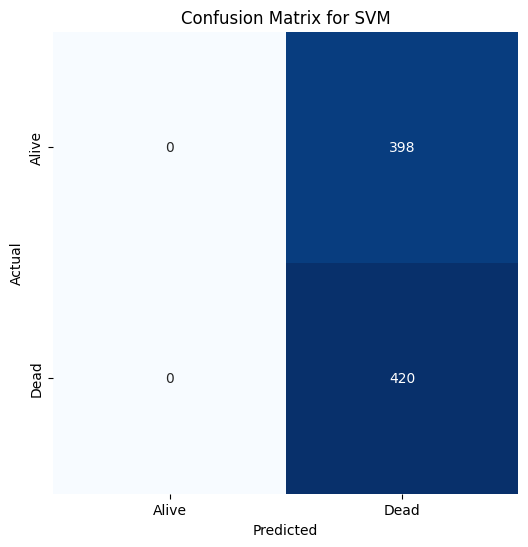

Training RF with GridSearchCV...
Results for RF:
Training Time: 455.34 seconds
Accuracy: 0.5134
F1-Score: 0.6785
ROC-AUC Score: 0.5000


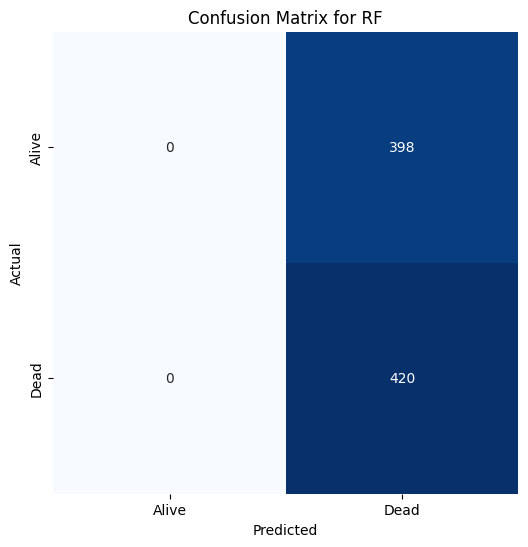

Training XGB with GridSearchCV...
Results for XGB:
Training Time: 155.42 seconds
Accuracy: 0.5134
F1-Score: 0.6785
ROC-AUC Score: 0.5000


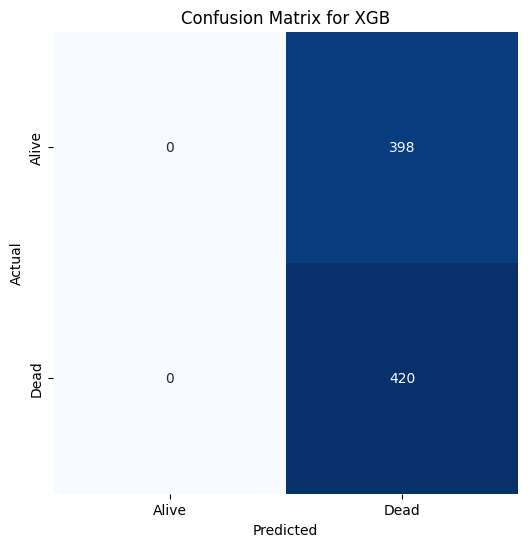

Training LGBM with GridSearchCV...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1678, number of negative: 1593
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 3271, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512993 -> initscore=0.051984
[LightGBM] [Info] Start training from score 0.051984
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGB

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


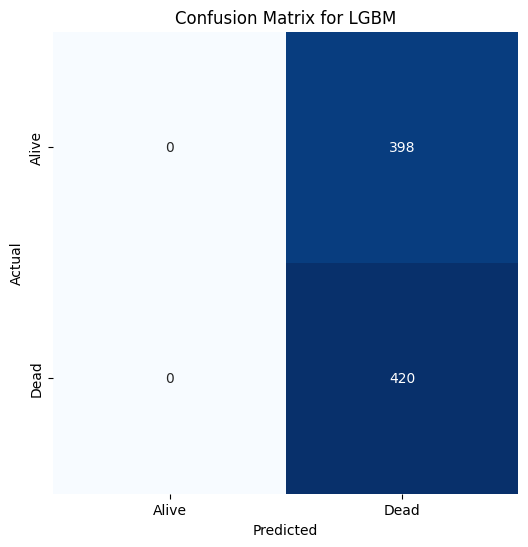

Training KNN with GridSearchCV...
Results for KNN:
Training Time: 106.34 seconds
Accuracy: 0.4866
F1-Score: 0.0000
ROC-AUC Score: 0.5000


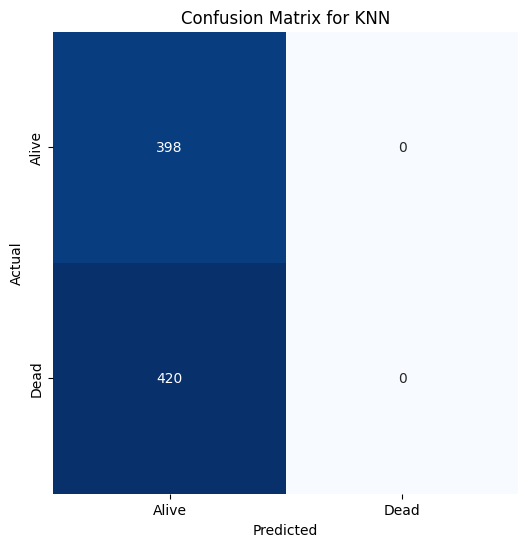

Training ADA with GridSearchCV...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Results for ADA:
Training Time: 55.07 seconds
Accuracy: 0.5134
F1-Score: 0.6785
ROC-AUC Score: 0.5000


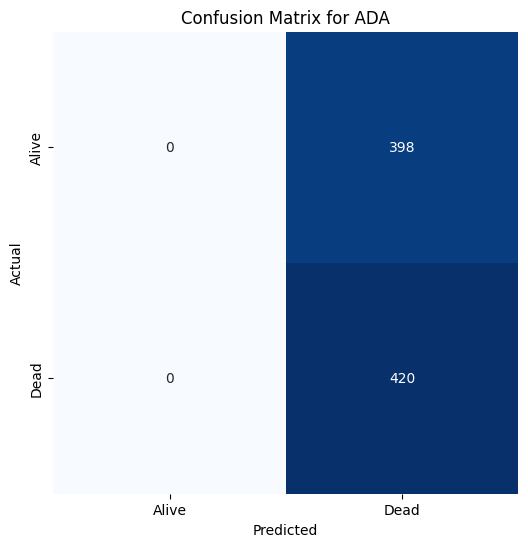


 MODEL biobert

Generating embeddings using biobert...


vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]


Generating embeddings with biobert: 100%|██████████| 4089/4089 [1:48:05<00:00,  1.59s/sample]

Embedding generation time: 6503.06 seconds
Training SVM with GridSearchCV...


Results for SVM:
Training Time: 1048.82 seconds
Accuracy: 0.6980
F1-Score: 0.7451
ROC-AUC Score: 0.7864


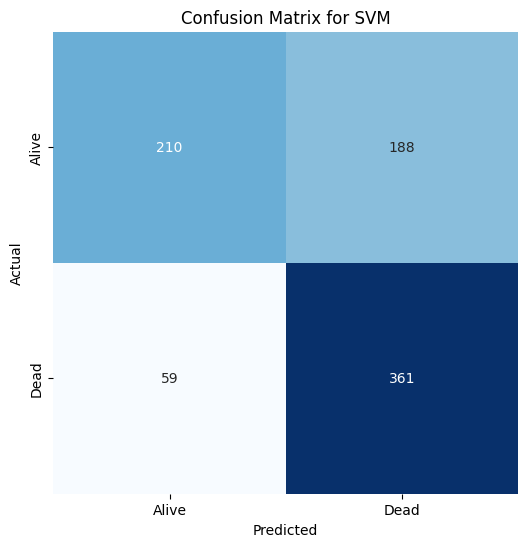

Training RF with GridSearchCV...
Results for RF:
Training Time: 1345.08 seconds
Accuracy: 0.9340
F1-Score: 0.9330
ROC-AUC Score: 0.9886


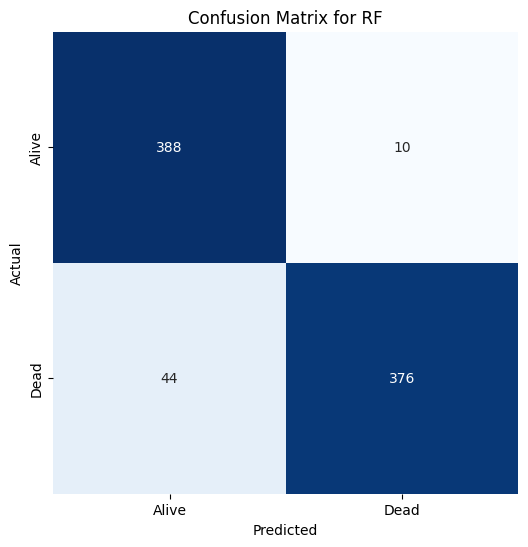

Training XGB with GridSearchCV...


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Results for XGB:
Training Time: 4691.39 seconds
Accuracy: 0.9487
F1-Score: 0.9494
ROC-AUC Score: 0.9912


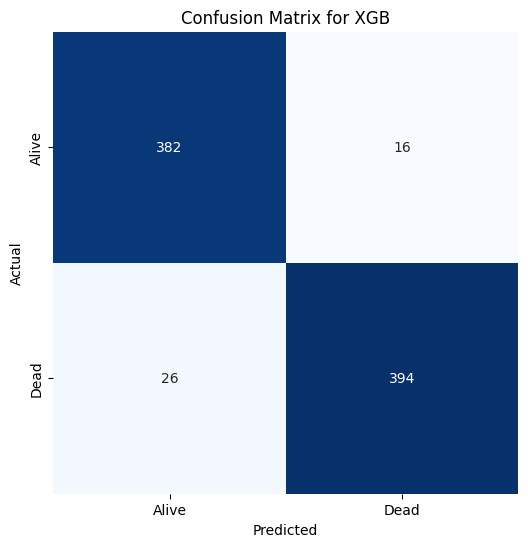

Training LGBM with GridSearchCV...


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1678, number of negative: 1593
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 194808
[LightGBM] [Info] Number of data points in the train set: 3271, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512993 -> initscore=0.051984
[LightGBM] [Info] Start training from score 0.051984
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


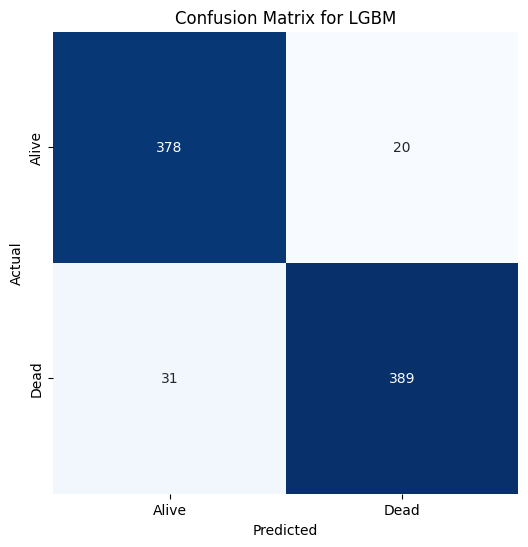

Training KNN with GridSearchCV...
Results for KNN:
Training Time: 42.32 seconds
Accuracy: 0.9242
F1-Score: 0.9251
ROC-AUC Score: 0.9675


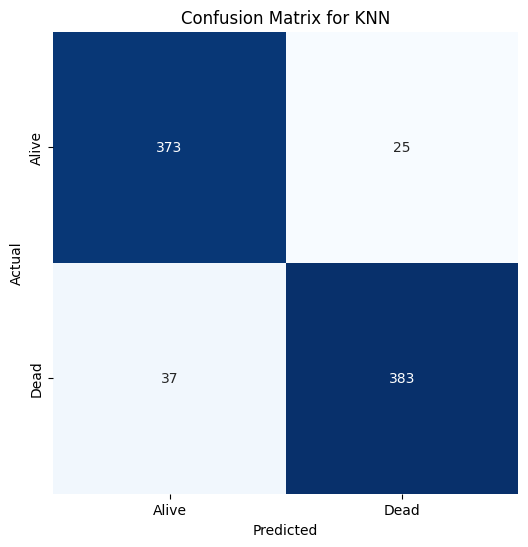

Training ADA with GridSearchCV...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Results for ADA:
Training Time: 607.51 seconds
Accuracy: 0.9144
F1-Score: 0.9165
ROC-AUC Score: 0.9710


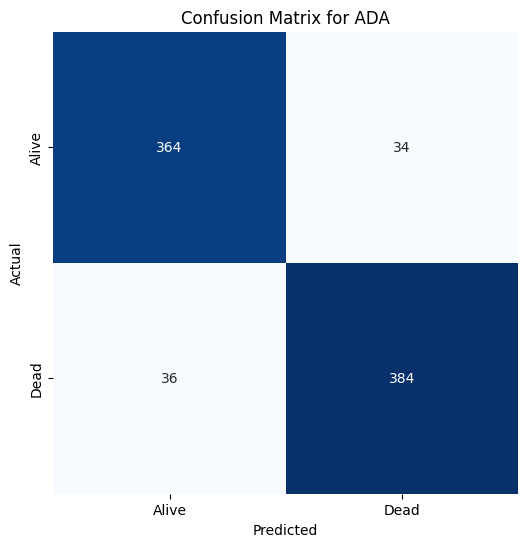


 MODEL scbert

Generating embeddings using scbert...


vocab.txt:   0%|          | 0.00/228k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

Generating embeddings with scbert:   0%|          | 0/4089 [00:00<?, ?sample/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

Generating embeddings with scbert: 100%|██████████| 4089/4089 [1:43:38<00:00,  1.52s/sample]

Embedding generation time: 6227.58 seconds
Training SVM with GridSearchCV...


Results for SVM:
Training Time: 1018.86 seconds
Accuracy: 0.6247
F1-Score: 0.7051
ROC-AUC Score: 0.7617


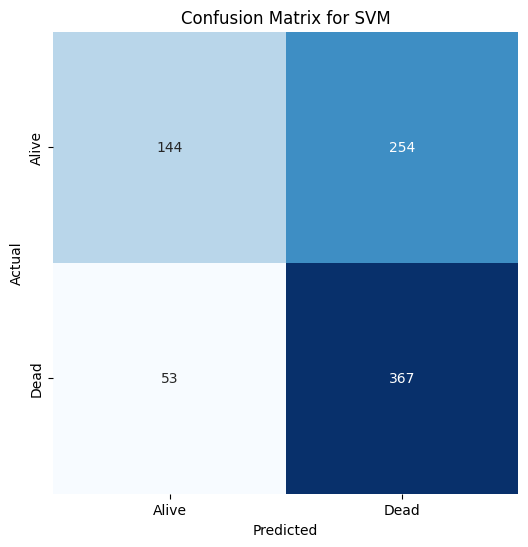

Training RF with GridSearchCV...
Results for RF:
Training Time: 1351.81 seconds
Accuracy: 0.9267
F1-Score: 0.9256
ROC-AUC Score: 0.9850


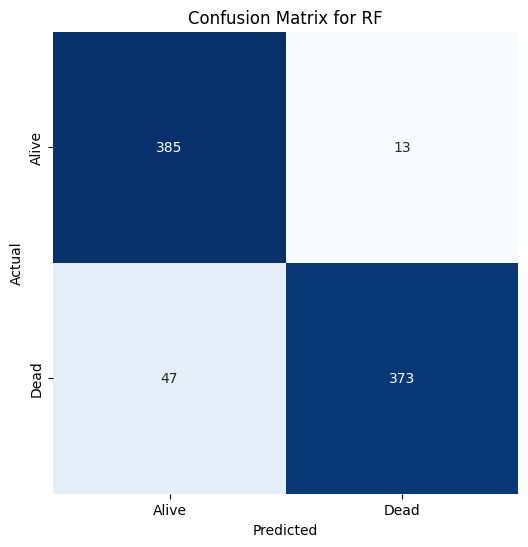

Training XGB with GridSearchCV...


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Results for XGB:
Training Time: 4636.43 seconds
Accuracy: 0.9389
F1-Score: 0.9393
ROC-AUC Score: 0.9891


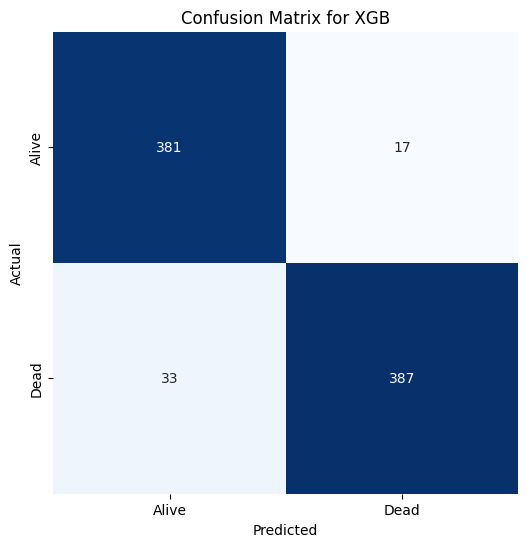

Training LGBM with GridSearchCV...


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1678, number of negative: 1593
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 194628
[LightGBM] [Info] Number of data points in the train set: 3271, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512993 -> initscore=0.051984
[LightGBM] [Info] Start training from score 0.051984
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


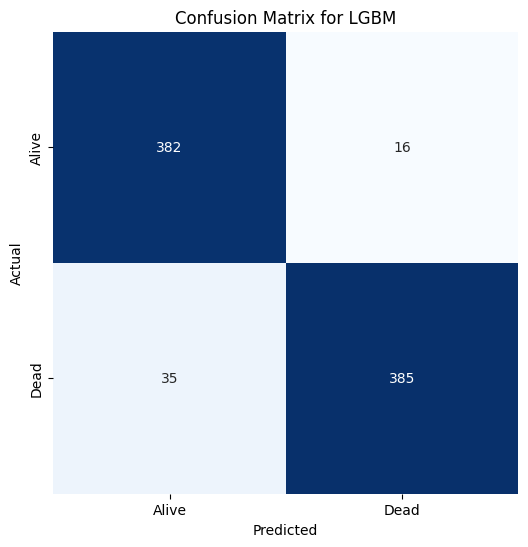

Training KNN with GridSearchCV...
Results for KNN:
Training Time: 44.93 seconds
Accuracy: 0.9108
F1-Score: 0.9119
ROC-AUC Score: 0.9584


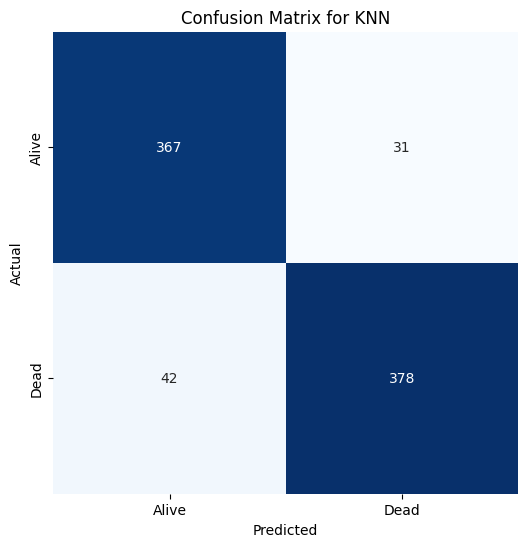

Training ADA with GridSearchCV...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Results for ADA:
Training Time: 601.33 seconds
Accuracy: 0.9095
F1-Score: 0.9104
ROC-AUC Score: 0.9679


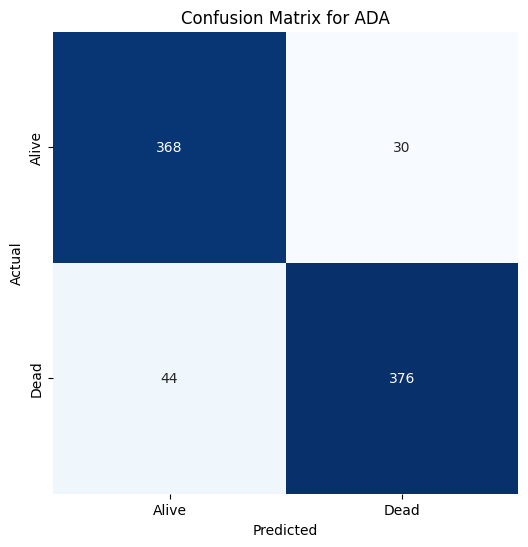


Comparison of Models:
      Model Classification  Embedding Time (s)  Training Time (s)  Accuracy  \
0    biogpt            SVM          691.897549        1089.908052  0.513447   
1    biogpt             RF          691.897549         455.343749  0.513447   
2    biogpt            XGB          691.897549         155.418533  0.513447   
3    biogpt           LGBM          691.897549          55.492137  0.513447   
4    biogpt            KNN          691.897549         106.340144  0.486553   
5    biogpt            ADA          691.897549          55.071463  0.513447   
6   biobert            SVM         6503.059878        1048.822137  0.698044   
7   biobert             RF         6503.059878        1345.081935  0.933985   
8   biobert            XGB         6503.059878        4691.387057  0.948655   
9   biobert           LGBM         6503.059878        6073.997263  0.937653   
10  biobert            KNN         6503.059878          42.319431  0.924205   
11  biobert            ADA   

In [9]:
# Step 6: Compare Models
models = ["biogpt", "biobert", "scbert"]
results = []

for model_name in models:
    print(f"\n MODEL {model_name}")
    print(f"\nGenerating embeddings using {model_name}...")
    start_time = time.time()
    embeddings = generate_embeddings(patient_texts, model_name=model_name)
    embedding_time = time.time() - start_time
    print(f"Embedding generation time: {embedding_time:.2f} seconds")

    model_results = train_and_evaluate_models(model_name, embeddings, y)

    for result in model_results:
        results.append({
            "Model": model_name,
            "Classification": result["classification"],
            "Embedding Time (s)": embedding_time,
            "Training Time (s)": result["training_time"],
            "Accuracy": result["accuracy"],
            "F1-Score": result["f1"],
            "ROC-AUC": result["roc_auc"],
        })

    #accuracy, roc_auc, training_time, f1 = train_and_evaluate(model_name, embeddings, y)

    #results.append({
    #    "Model": model_name,
    #    "Embedding Time (s)": embedding_time,
    #    "Training Time (s)": training_time,
    #    "Accuracy": accuracy,
    #    "F1-Score": f1,
    #    "ROC-AUC": roc_auc,
    #})

# Step 7: Compare Results
results_df = pd.DataFrame(results)
print("\nComparison of Models:")
print(results_df)

In [10]:
# Save to CSV
results_df.to_csv("results.csv", index=False)